In [1]:
from arc_prize.train import ARCModelState, ARCTrainParams
from arc_prize.vis import visualize_epochs
import modal
import torch
import petname
from arc_prize.model import ARCTransformerEncoderDecoderParams



In [16]:
from arc_prize.data import ARCDatasetParams, ReARCDataset, make_re_arc_data_loaders

config = ARCDatasetParams(max_grid_size=30, max_train_grids=10, color_offset=1)
dataset = ReARCDataset("data/re_arc/ff805c23.json", config)
train_loader, val_loader = make_re_arc_data_loaders(["data/re_arc/ff805c23.json"], 10, config)
len(val_loader.dataset)


250

In [2]:
model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=12,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=2,
  num_decoder_layers=2,
  num_heads=4,
  d_model=32,
  d_ff=32*2,
  dropout=0.2
)

train_params = ARCTrainParams(
  batch_size=10,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/move_diagonal", "/vol/data/flip", "/vol/data/rotate", "/vol/data/scale", "/vol/data/rotate_and_scale", "/vol/data/move_many_random"],
  # dataset_dir=["/vol/data/re_arc/ff805c23.json", "/vol/data/re_arc/e98196ab.json", "/vol/data/re_arc/007bbfb7.json", "/vol/data/re_arc/00d62c1b.json"],
  loss_class_weights={0: 0.2}
)

num_epochs = 100

model_names = []

num_runs = 3

fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_params, train_params)
  # train_on_mac(model_name, num_epochs, model_params, train_params)
  print("Model name", model_name, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




Model name mildly_able_horse fc-01J6AS5NSS9ZVB8ZNTFJ6G9XGN
Model name vastly_normal_rhino fc-01J6AS5NVZP8KK62AJNWV7CY1K
Model name oddly_mint_clam fc-01J6AS5NYKRWVR911DVHDQRYXS
['mildly_able_horse', 'vastly_normal_rhino', 'oddly_mint_clam']


In [2]:


from arc_prize.model import ARCTransformerEncoderDecoderParams
from arc_prize.train import train_on_mac


model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=12,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=1,
  num_decoder_layers=1,
  num_heads=1,
  d_model=8,
  d_ff=8*2,
  dropout=0.1
)

train_params = ARCTrainParams(
  batch_size=5,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_dir=["data/move_diagonal"]
)

num_epochs = 10

model_names = []

num_runs = 1

# fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  # fn_call = fn.spawn(model_name, num_epochs, model_params, train_params)
  train_on_mac(model_name, num_epochs, model_params, train_params)
  # print("Model name", model_name, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




Starting new model hardly_causal_marten
Using 0 GPUs in parallel
Starting training run with dataset of 500 training items and 100 evaluation items


/Users/pfh/work/arc-prize/.venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10:
Train Loss: 1.7048, Train Accuracy: 0.4782
Val Loss: 1.1689, Val Accuracy: 0.6041
New best val loss 1.1689209997653962
Saved checkpoint models/hardly_causal_marten.pth
Epoch 2/10:
Train Loss: 1.1707, Train Accuracy: 0.6135
Val Loss: 1.0456, Val Accuracy: 0.6575
New best val loss 1.0456310749053954
Saved checkpoint models/hardly_causal_marten.pth
Epoch 3/10:
Train Loss: 1.0335, Train Accuracy: 0.6983
Val Loss: 0.8626, Val Accuracy: 0.7894
New best val loss 0.8626233667135239
Saved checkpoint models/hardly_causal_marten.pth
Epoch 4/10:
Train Loss: 0.8387, Train Accuracy: 0.8091
Val Loss: 0.6920, Val Accuracy: 0.8582
New best val loss 0.692007702589035
Saved checkpoint models/hardly_causal_marten.pth
Epoch 5/10:
Train Loss: 0.7494, Train Accuracy: 0.8428
Val Loss: 0.6768, Val Accuracy: 0.8582
New best val loss 0.6768313348293304
Saved checkpoint models/hardly_causal_marten.pth
Epoch 6/10:
Train Loss: 0.7386, Train Accuracy: 0.8429
Val Loss: 0.6682, Val Accuracy: 0.8582
New bes

In [10]:
num_epochs = 100

model_names = ["overly_hip_egret"]

fn = modal.Function.lookup("arc-prize", "train")
for model_name in model_names:
  fn_call = fn.spawn(model_name, num_epochs, None, None)
  print("Model name", model_name, fn_call.object_id)
  


Model name overly_hip_egret fc-01J5XF38DH2XV1CDFR8TA6S1KC


barely_sound_viper 100 EpochState(train_loss=0.8741661328077316, train_accuracy=0.8006187057495118, val_loss=0.9175602349368008, val_accuracy=0.793888908624649, lr=0.00025, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=0.7200944396958286, param_norm=113.57825285344724) ARCTransformerEncoderDecoderParams(grid_dim=12, num_train_pairs=4, num_colors=10, num_encoder_layers=2, num_decoder_layers=2, num_heads=4, d_model=32, d_ff=64, dropout=0.2)
lively_key_goblin 91 EpochState(train_loss=0.700158314650709, train_accuracy=0.8338560810956088, val_loss=0.7671028091148897, val_accuracy=0.8212626473470168, lr=0.000125, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=1.06962015271625, param_norm=111.15922347880898) ARCTransformerEncoderDecoderParams(grid_dim=12, num_train_pairs=4, num_colors=10, num_encoder_layers=2, num_decoder_layers=2, num_heads=4, d_model=32, d_ff=64, dropout=0.2)
wildly_fancy_glider 100 EpochState(train_loss=0.7249430478161032, tra

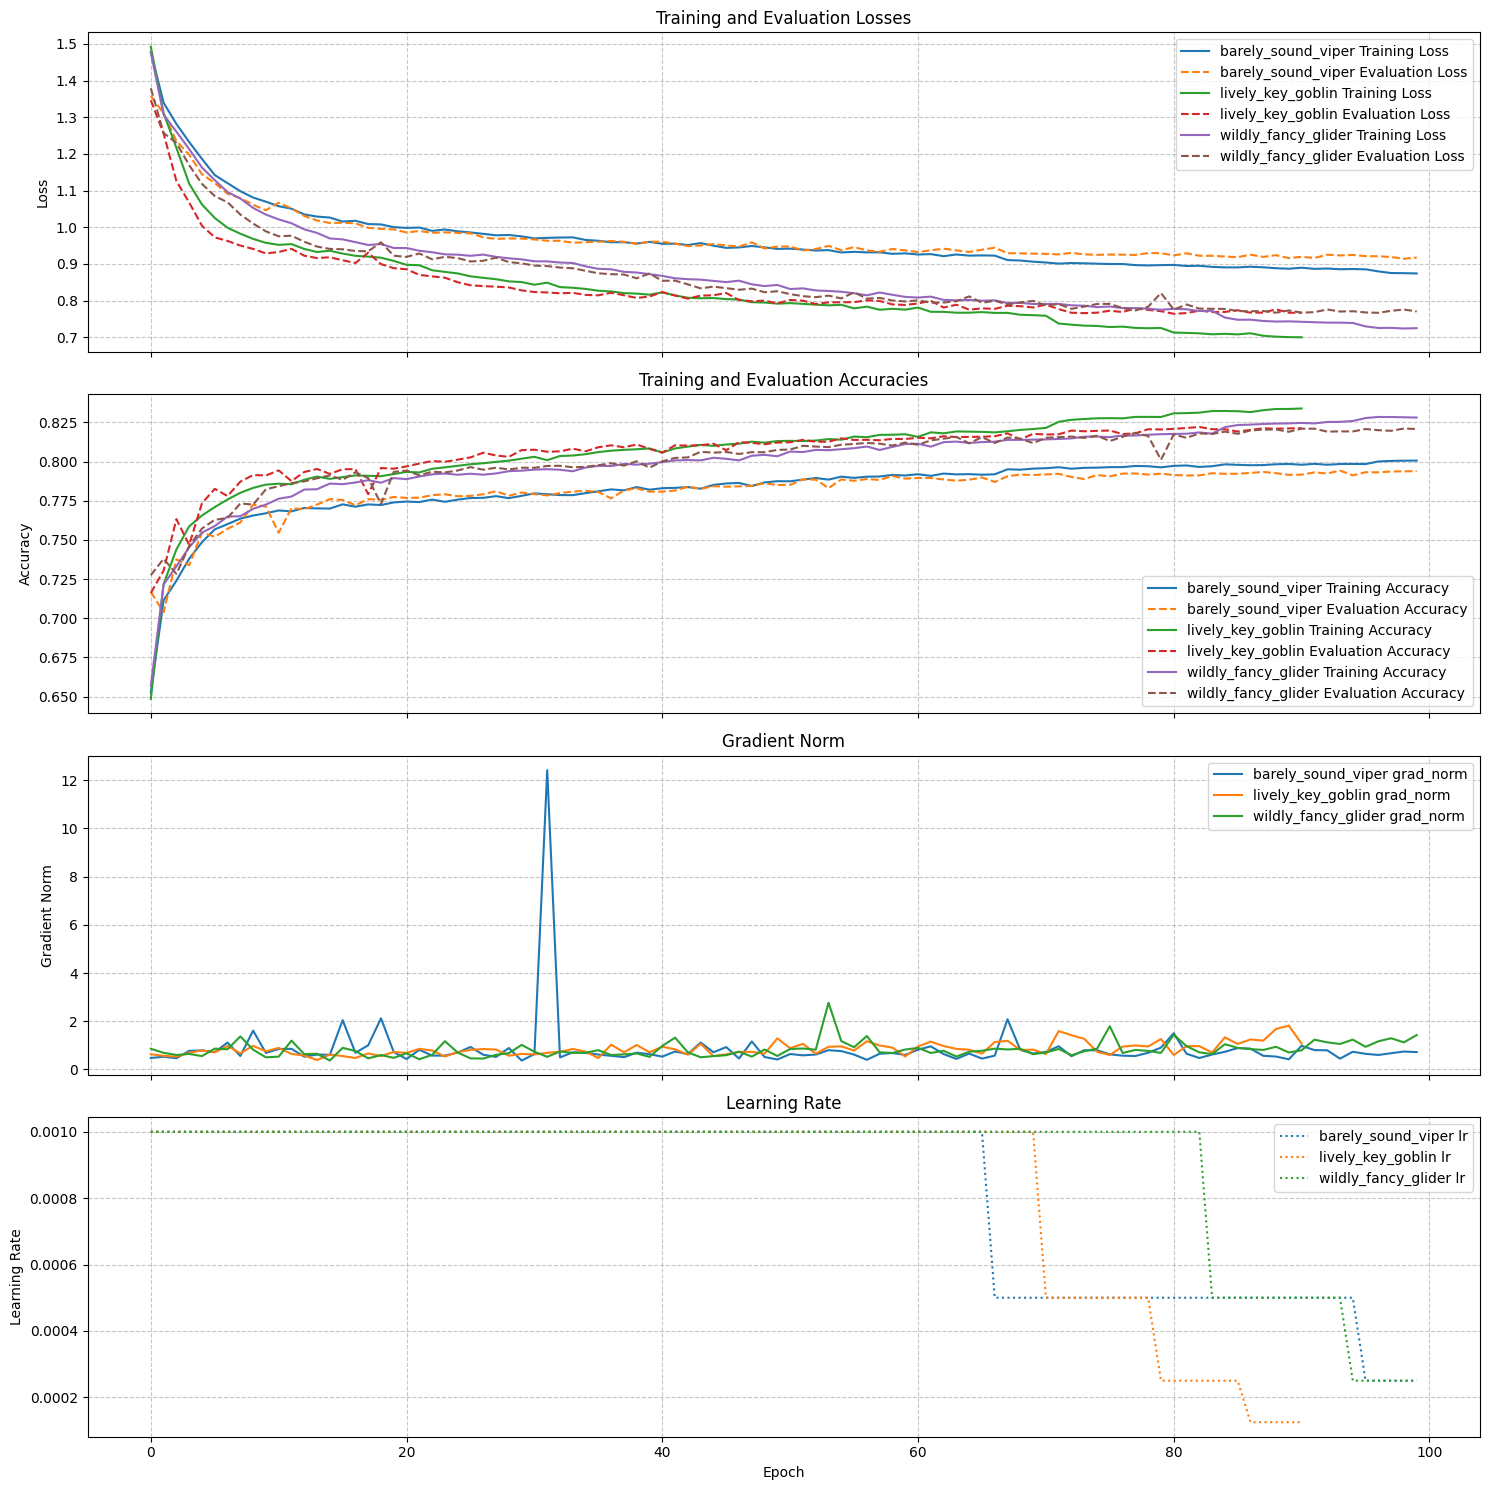

In [7]:
def visualize_group(model_names: list[str]):
  epochs = {}
  get_model = modal.Function.lookup("arc-prize", "get_model")
  for name in model_names:
    checkpoint = ARCModelState(**get_model.remote(name))
    print(name, len(checkpoint.epochs), checkpoint.epochs[-1], checkpoint.model_params)
    epochs[name] = checkpoint.epochs


    # print(len(checkpoint.encoder_attn_weights))
    # for b, batch in enumerate(checkpoint.encoder_attn_weights):
    #   for i, layer in enumerate(batch):
    #     visualize_all_heads(layer, title=f"Batch {b}, layer {i}")
    

  visualize_epochs(epochs)

  


groups = [
  # ['kindly_huge_jennet', 'lovely_tidy_lab', 'solely_living_leech'], # BEST
  # ['weekly_enough_moose', 'gently_known_beagle', 'nicely_robust_rhino'], # 20x20 too slow
  # ['wildly_firm_husky', 'surely_brief_bug', 'fully_better_dodo'], # Amazing
  # ['wildly_steady_iguana', 'yearly_smart_donkey', 'mainly_polite_bison'], # Includes scale dataset
  # ['partly_vocal_piglet', 'neatly_needed_liger', 'firmly_game_weevil'], # Scale and diagonal
  # ['wholly_tops_heron', 'solely_eager_foal', 'deeply_one_skink'], # Tons of data
  # ['unduly_glad_swift', 'purely_steady_hornet', 'humbly_civil_donkey'], # Basic data
  # ["early_civil_beetle"],
  # ["really_fancy_kitten", "mildly_humble_tahr"],
  # ['solely_brief_shad', 'fairly_amazed_hyena', 'vastly_amazed_bobcat'],
  ['barely_sound_viper', 'lively_key_goblin', 'wildly_fancy_glider'], # patch size 3
  ['mildly_able_horse', 'vastly_normal_rhino', 'oddly_mint_clam'], # patch size 2
]

# print([group for sublist in groups for group in sublist])
for group in groups:
  visualize_group(group)

In [5]:
from arc_prize.vis import visualize_tensors, visualize_all_heads


eval_model = modal.Function.lookup("arc-prize", "evaluate_model")
output = eval_model.remote("lively_key_goblin", ["/vol/data/move_diagonal"])
# output = eval_model.remote("overly_hip_egret", ["/vol/data/re_arc/00d62c1b.json"], True, 1)


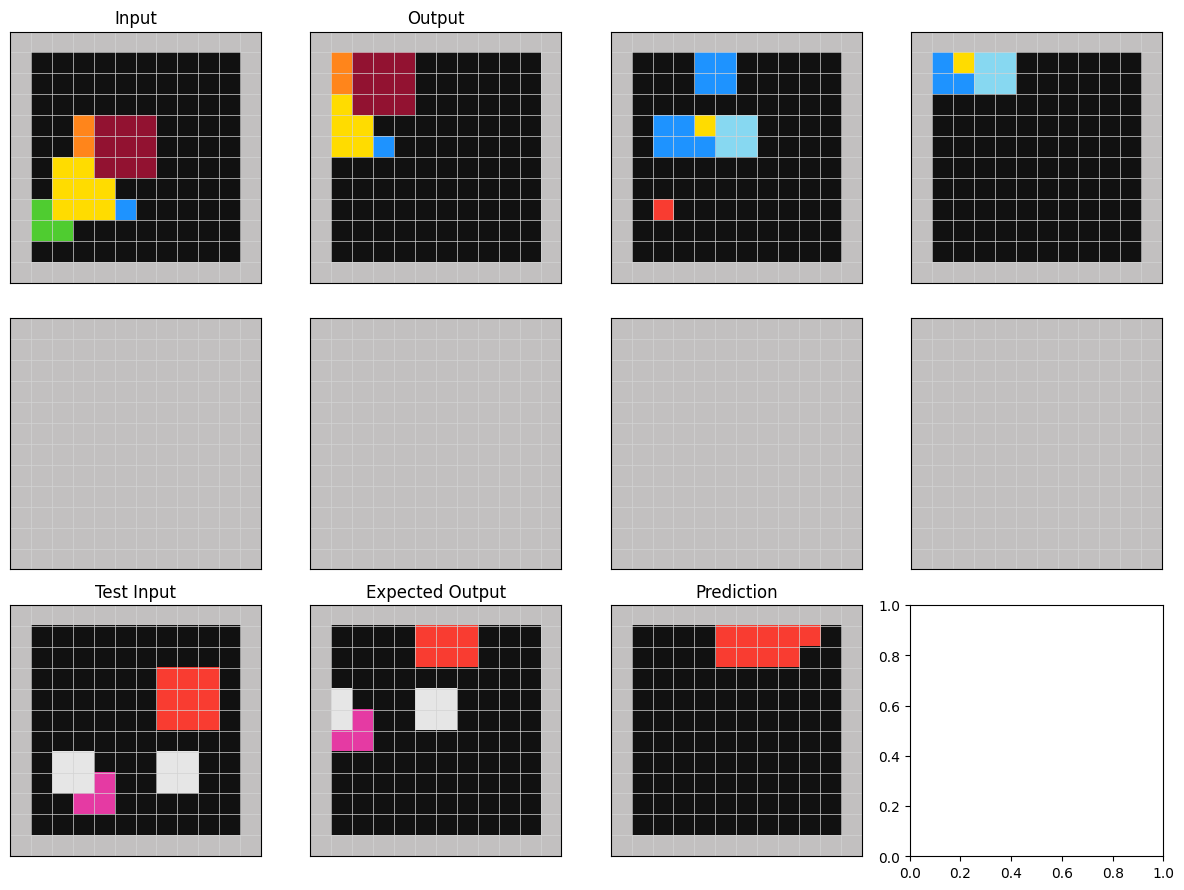

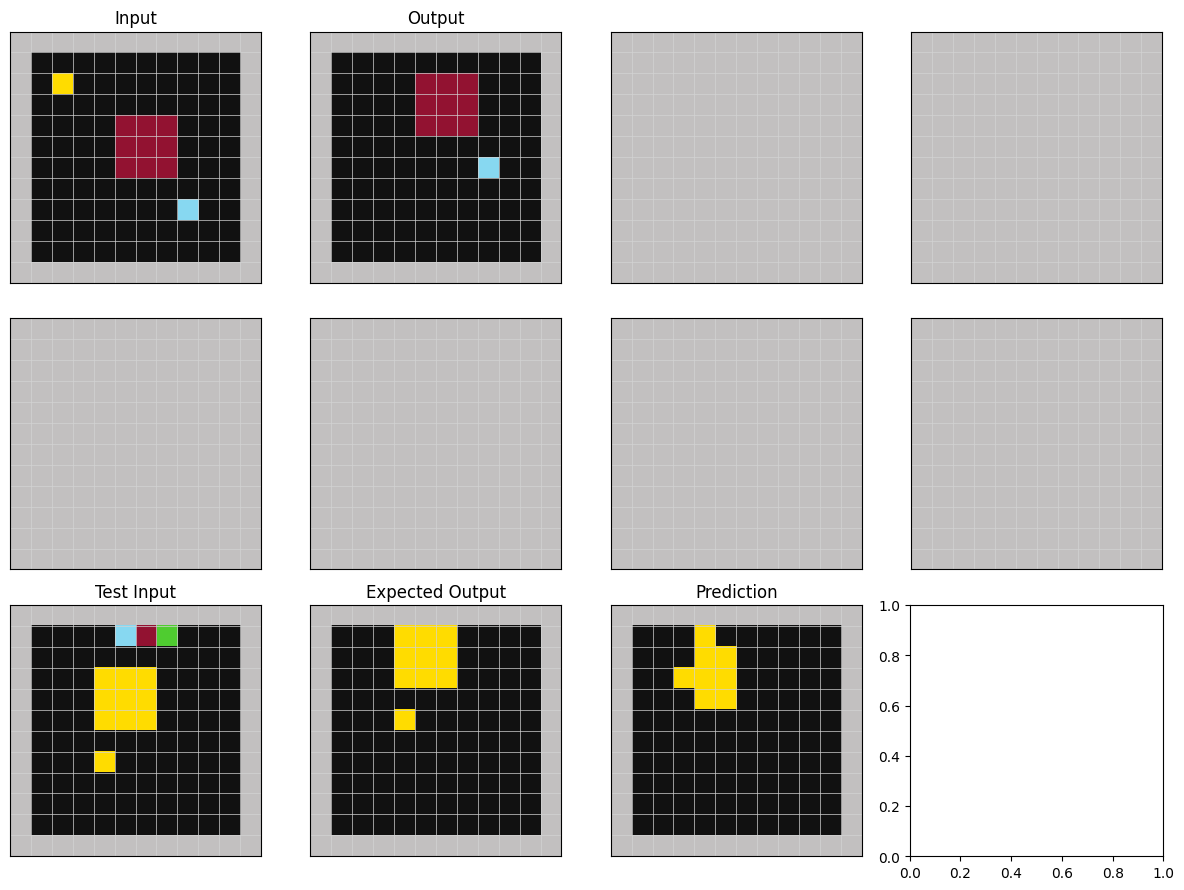

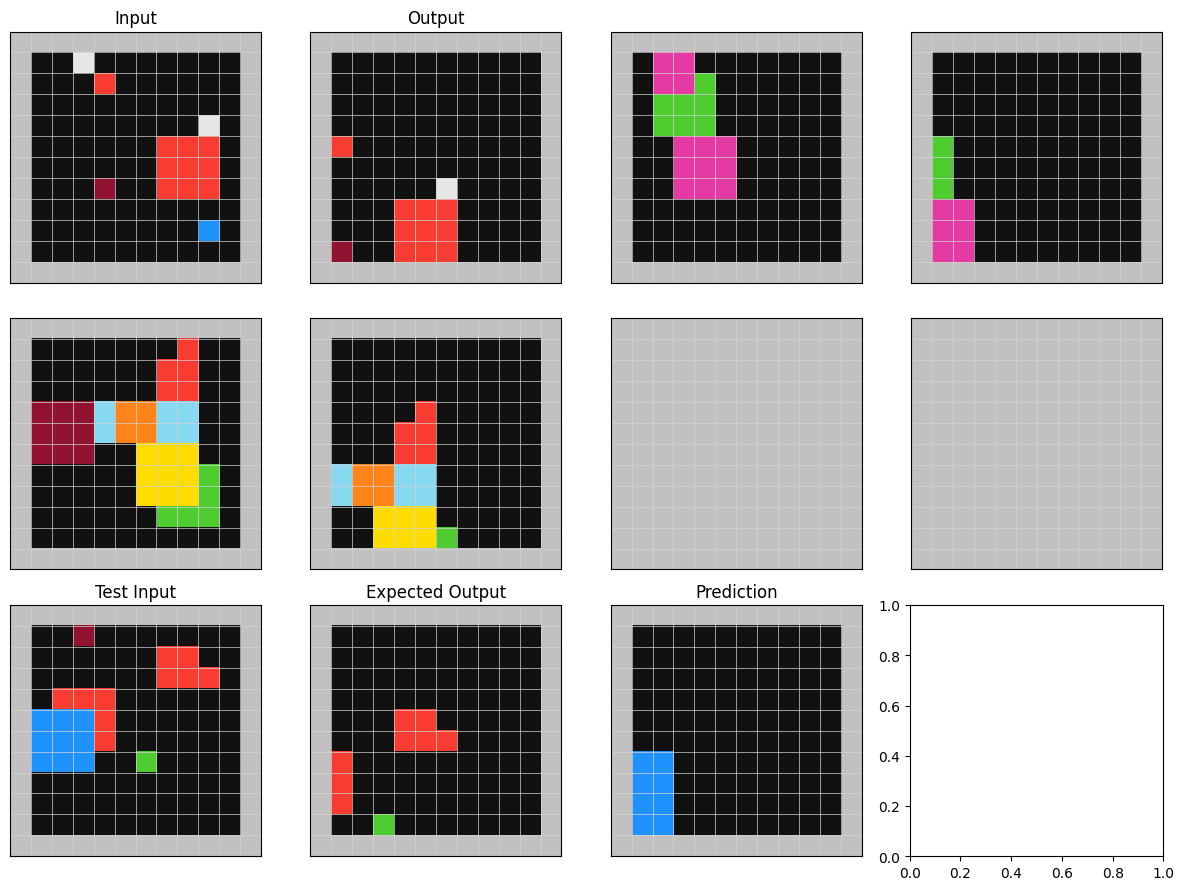

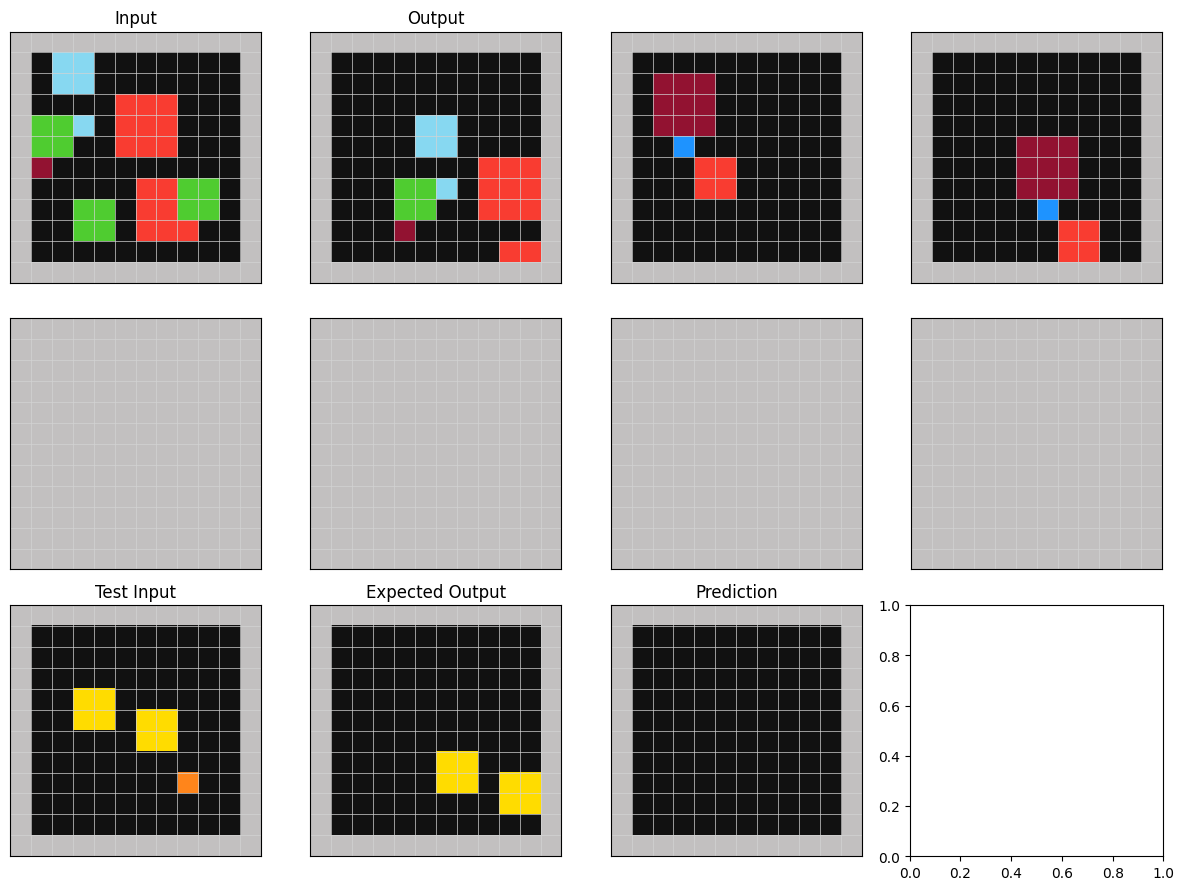

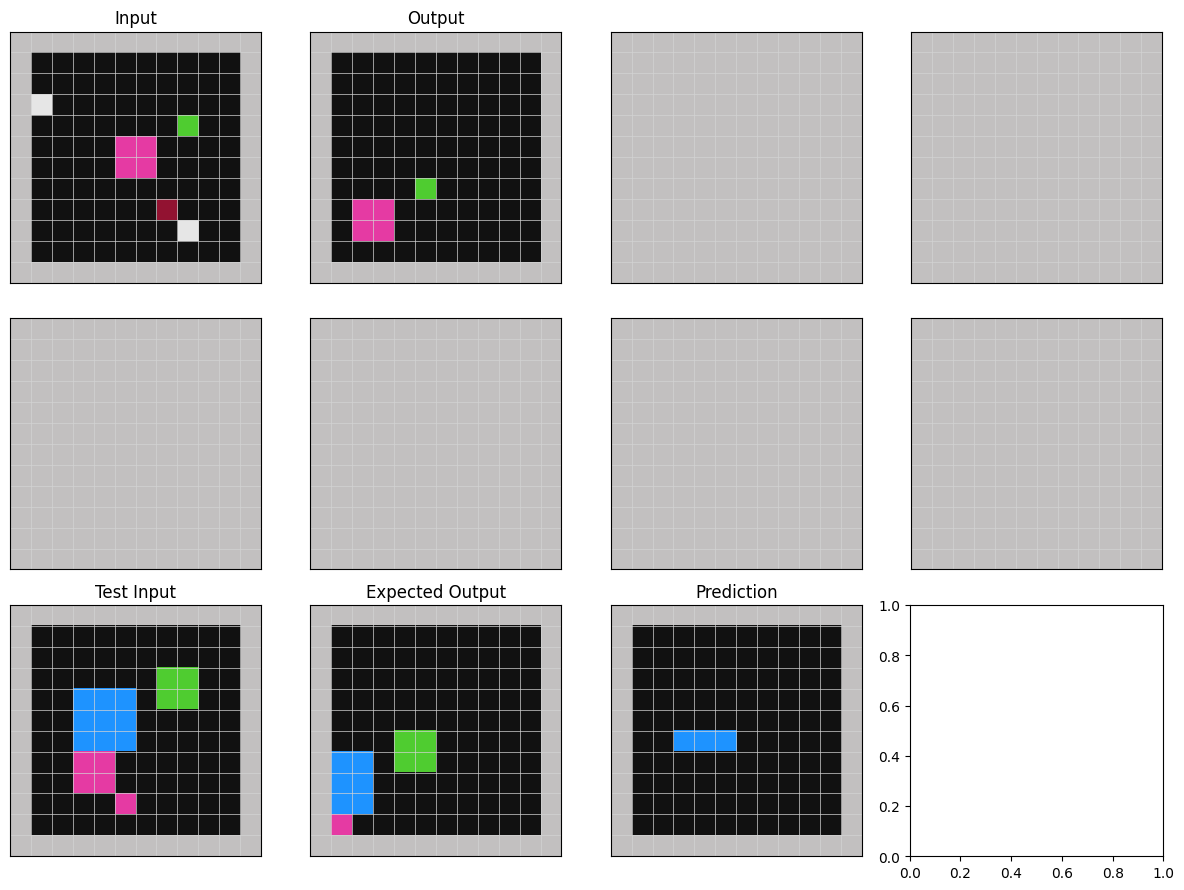

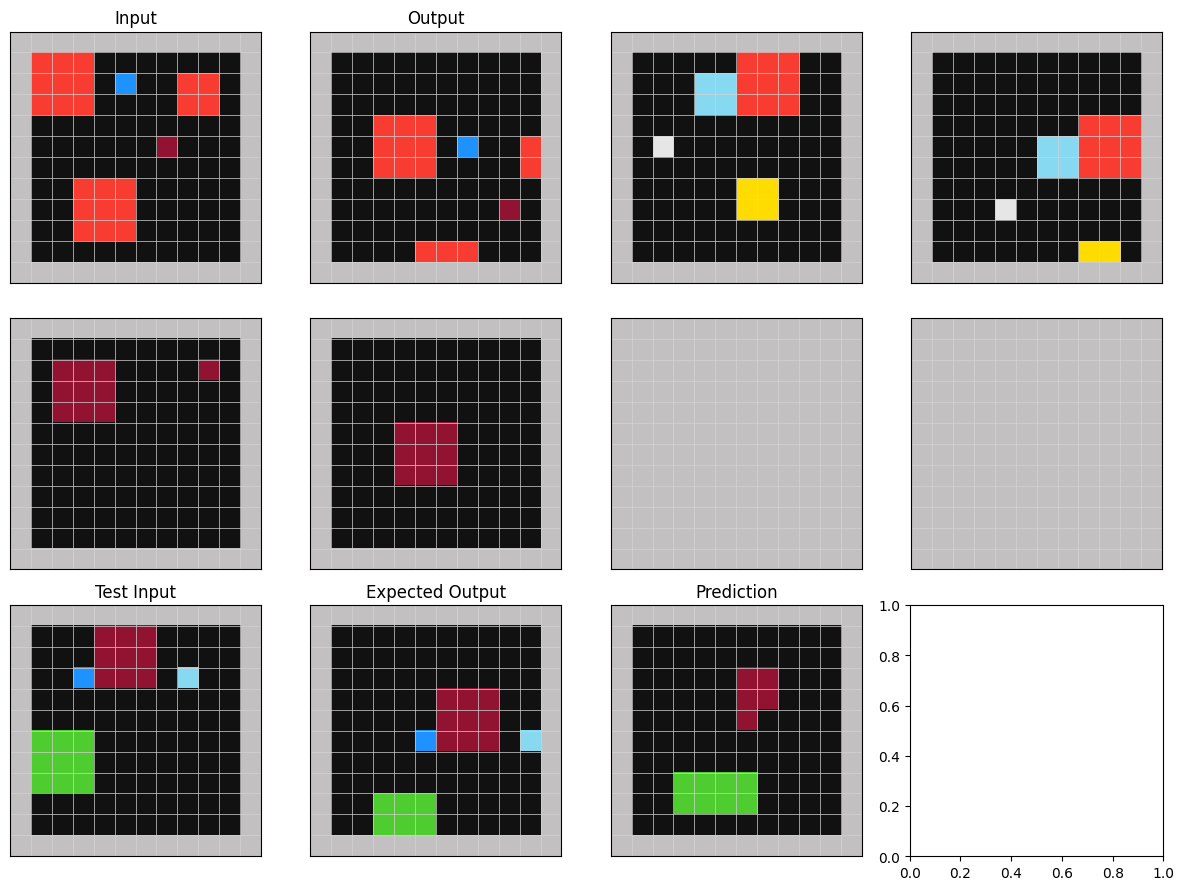

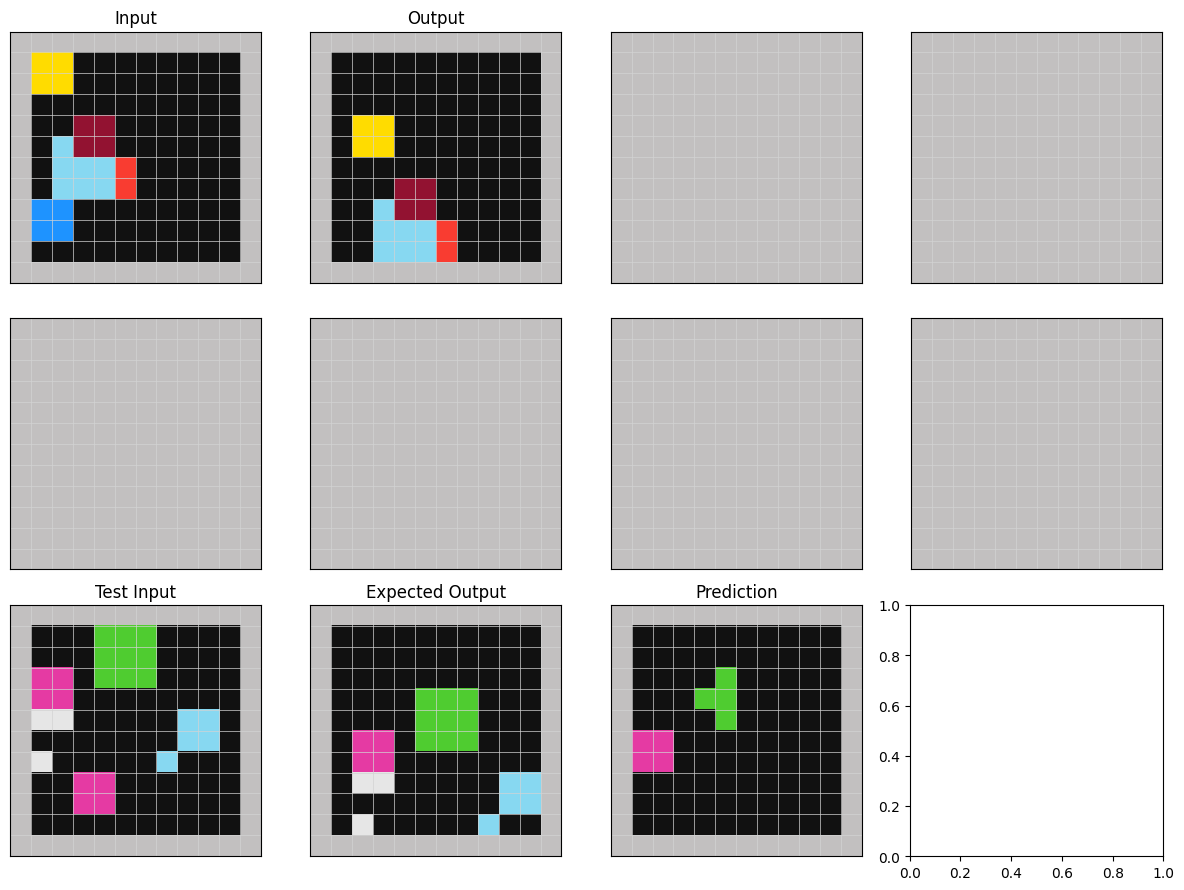

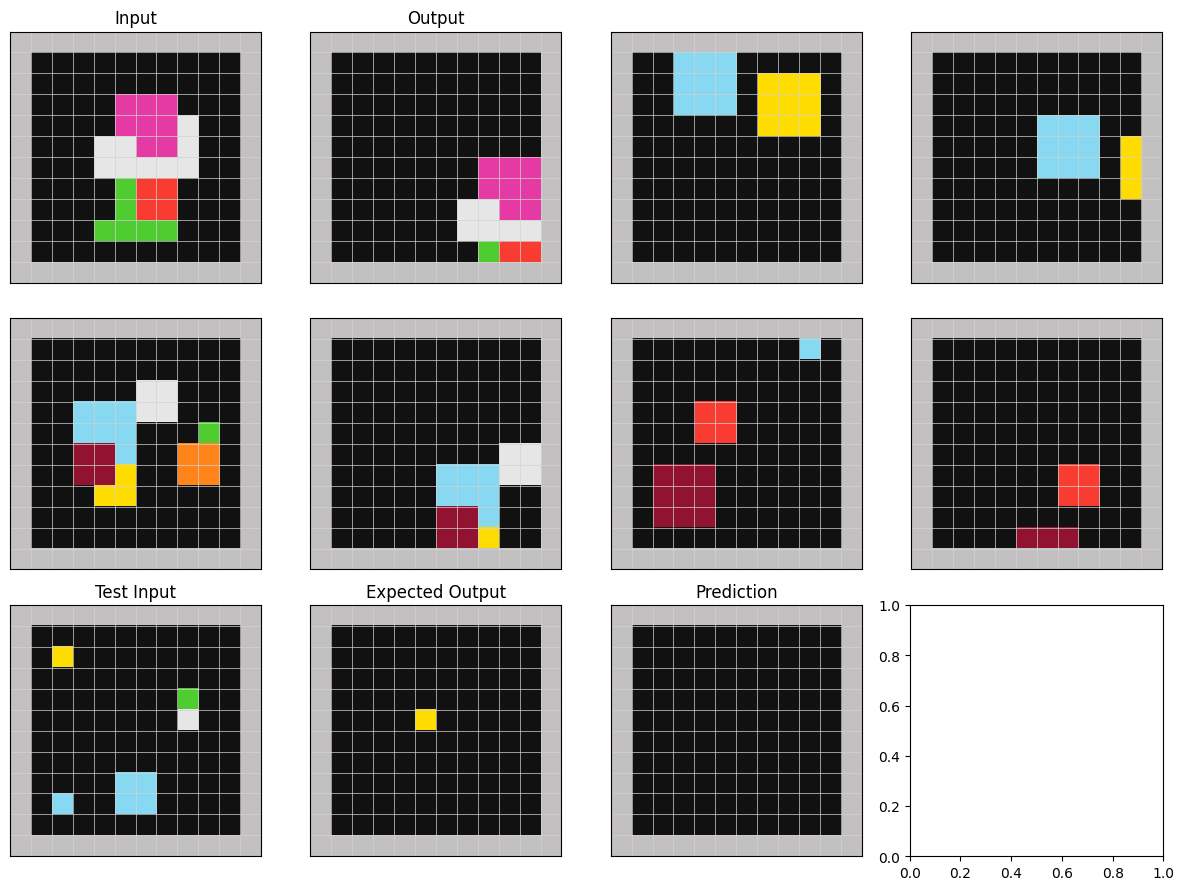

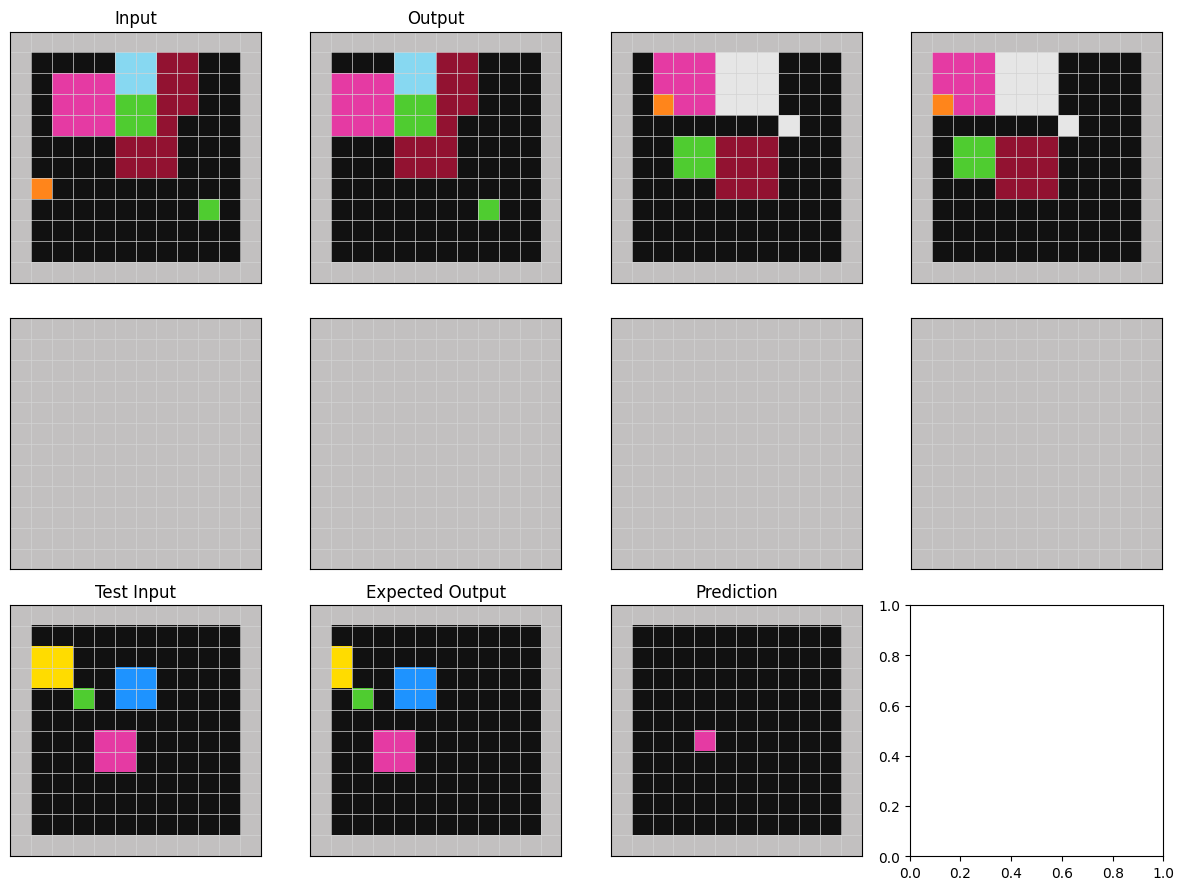

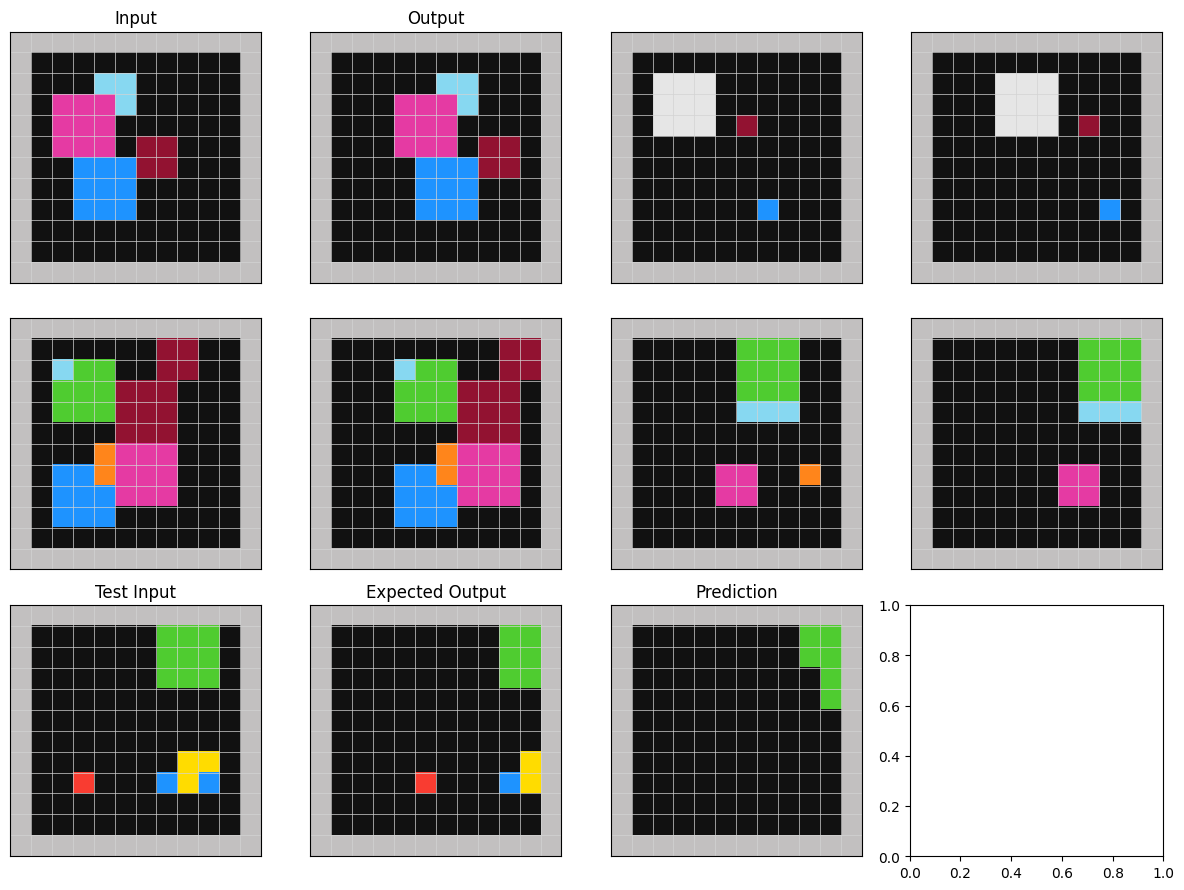

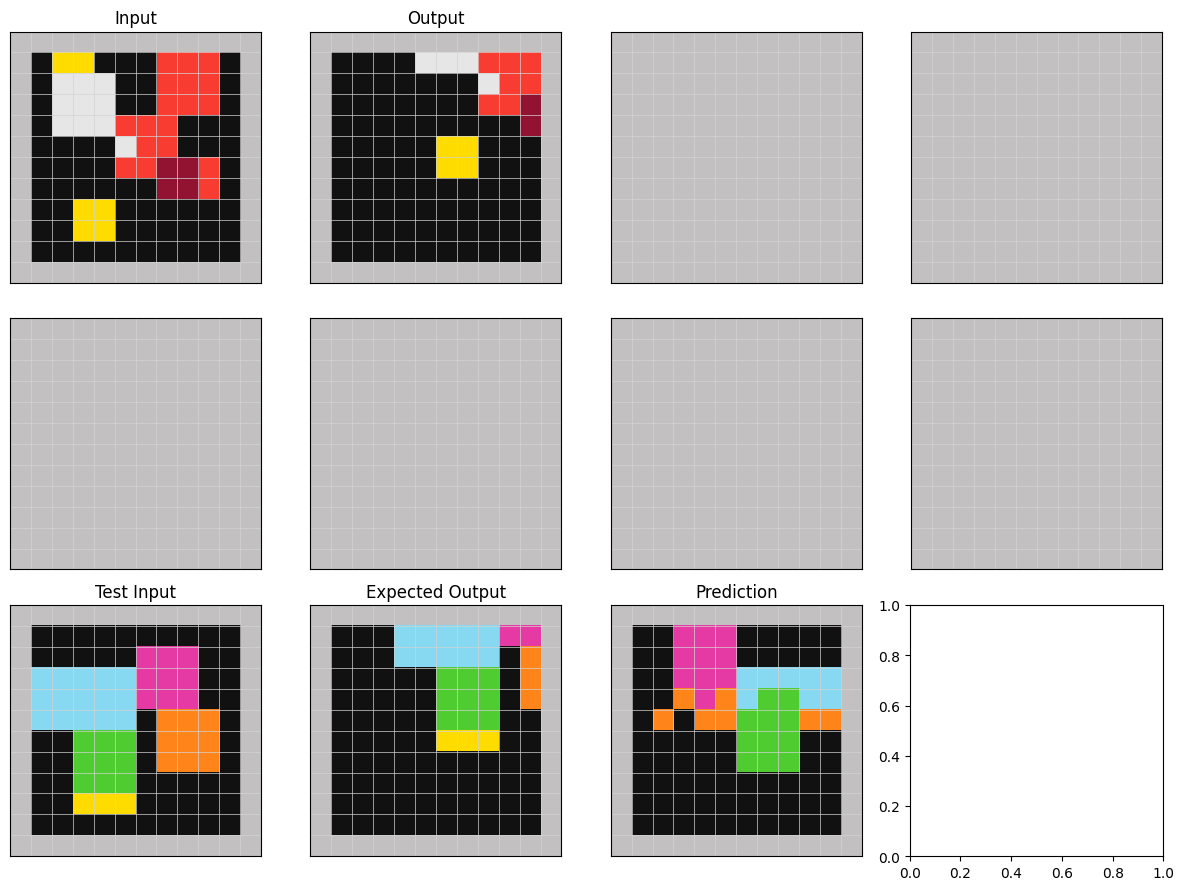

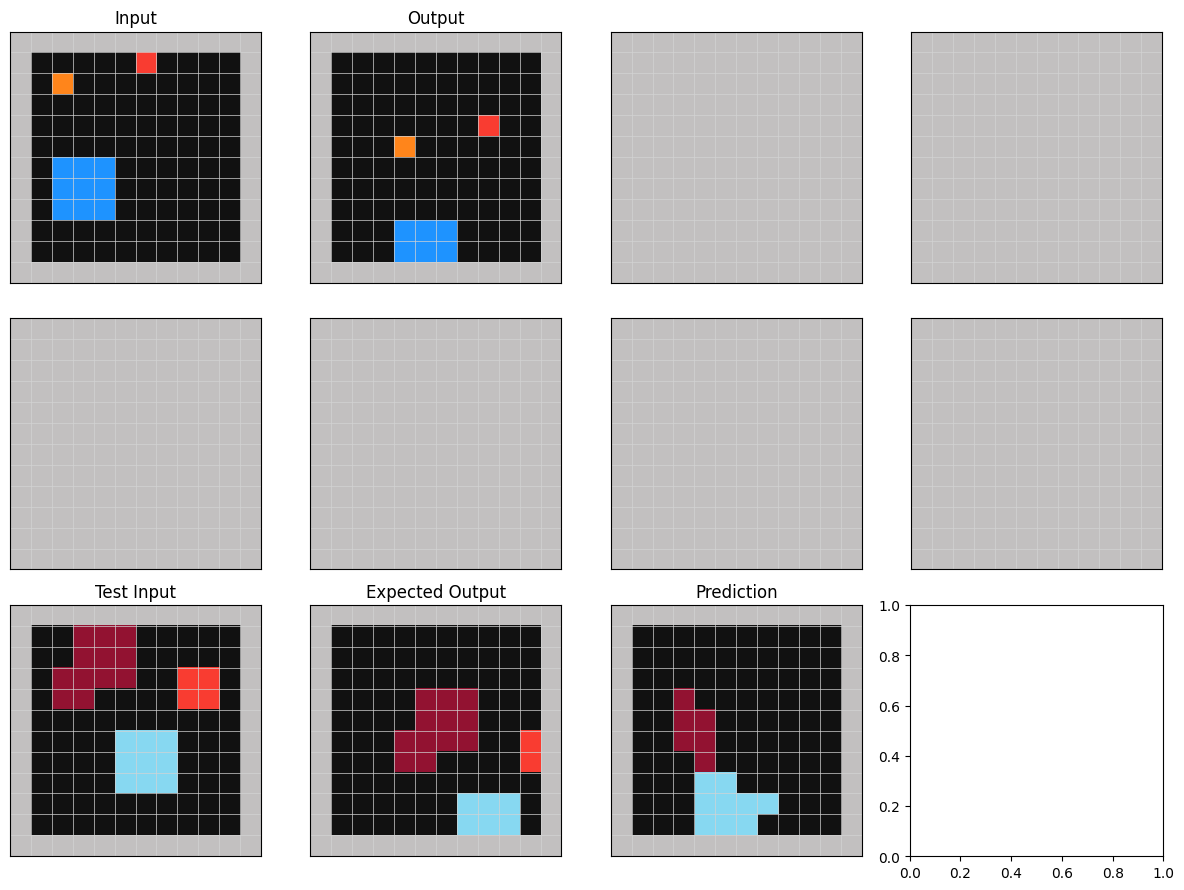

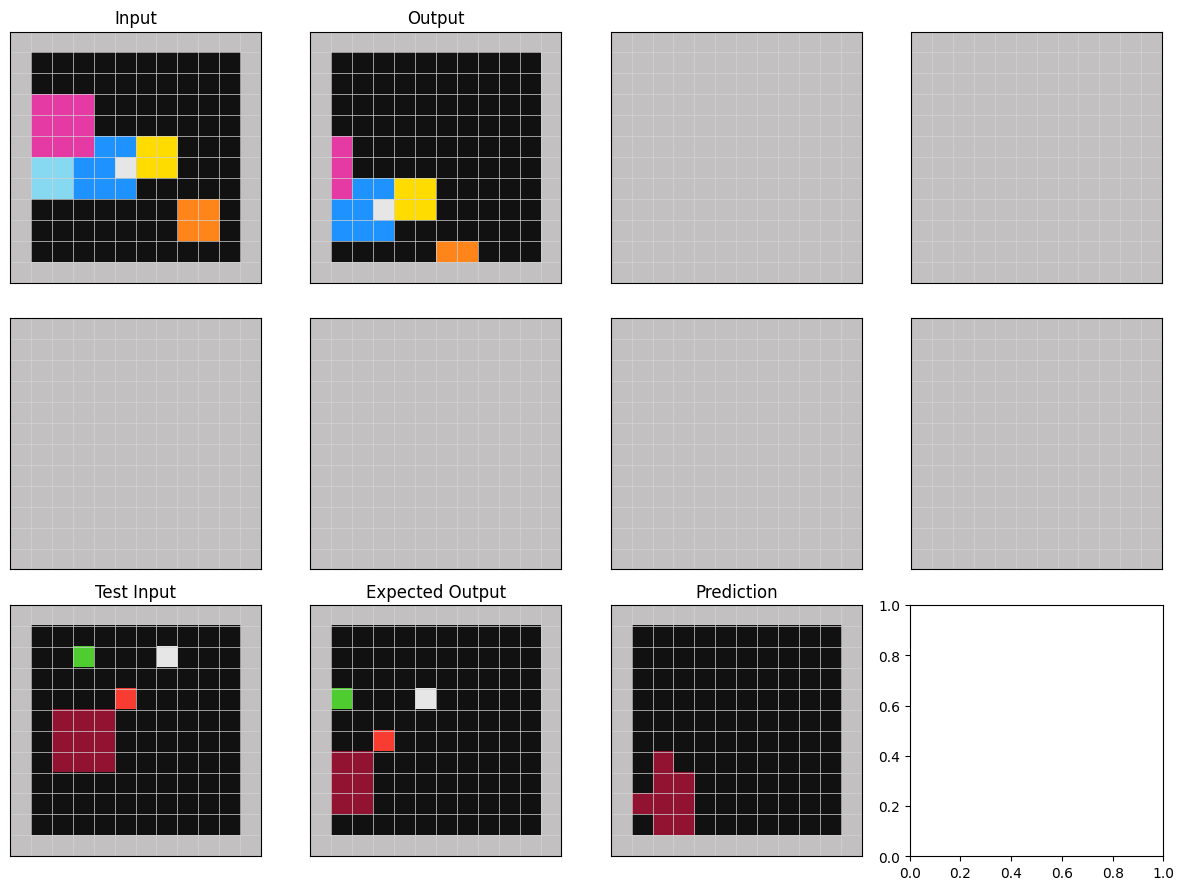

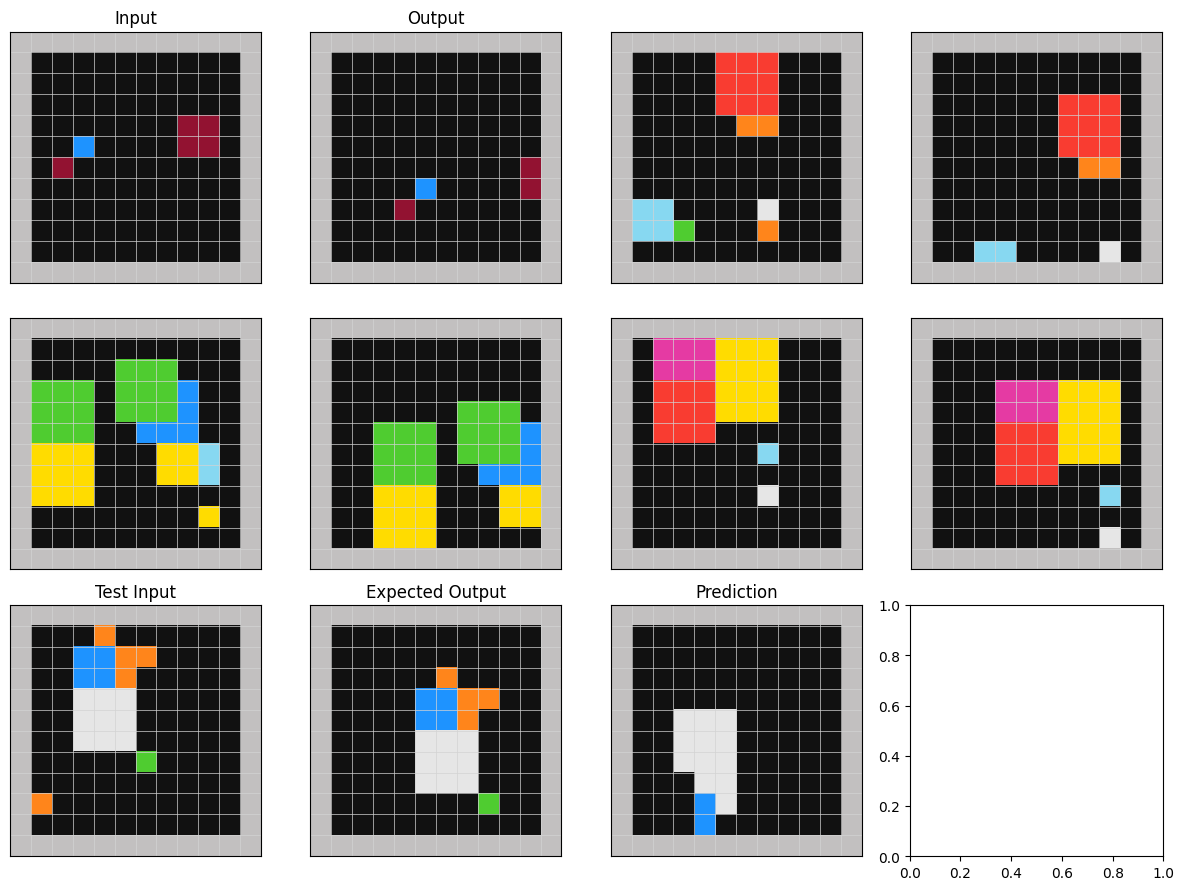

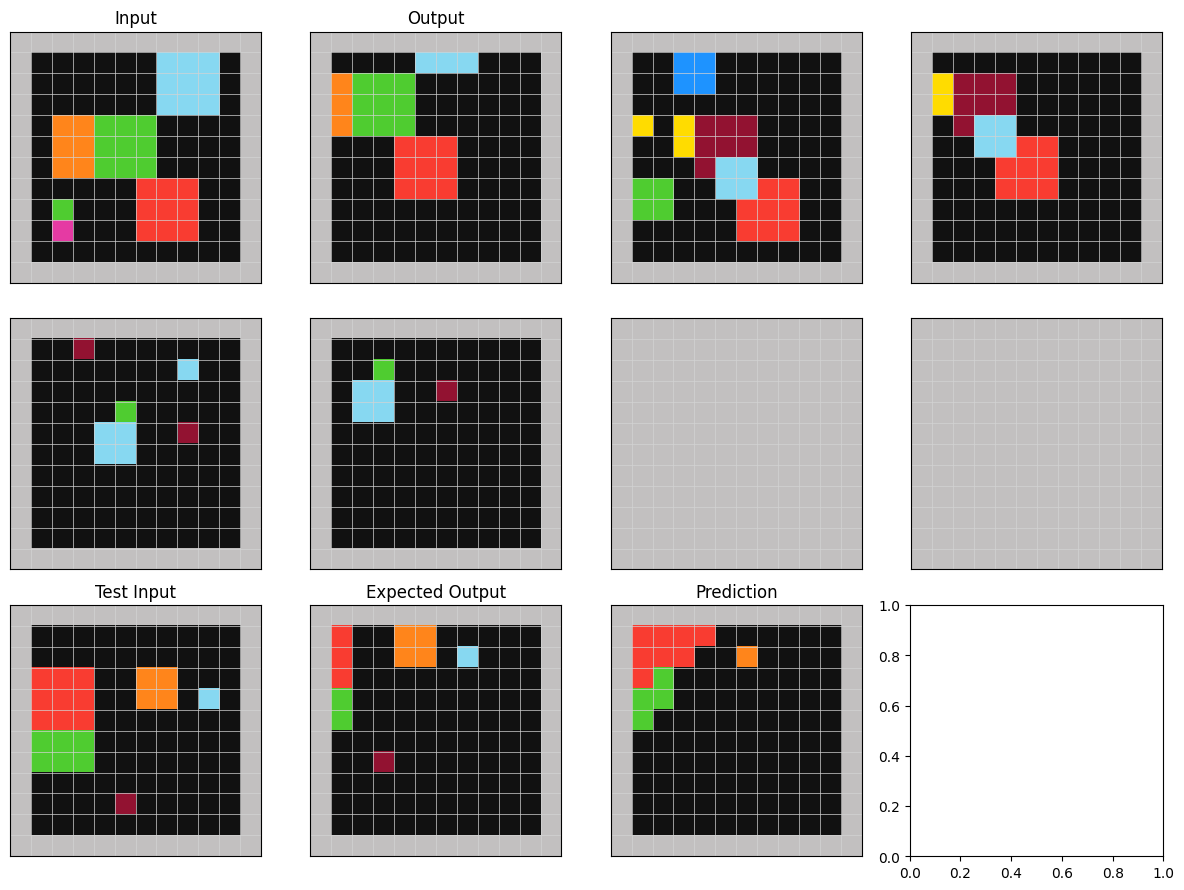

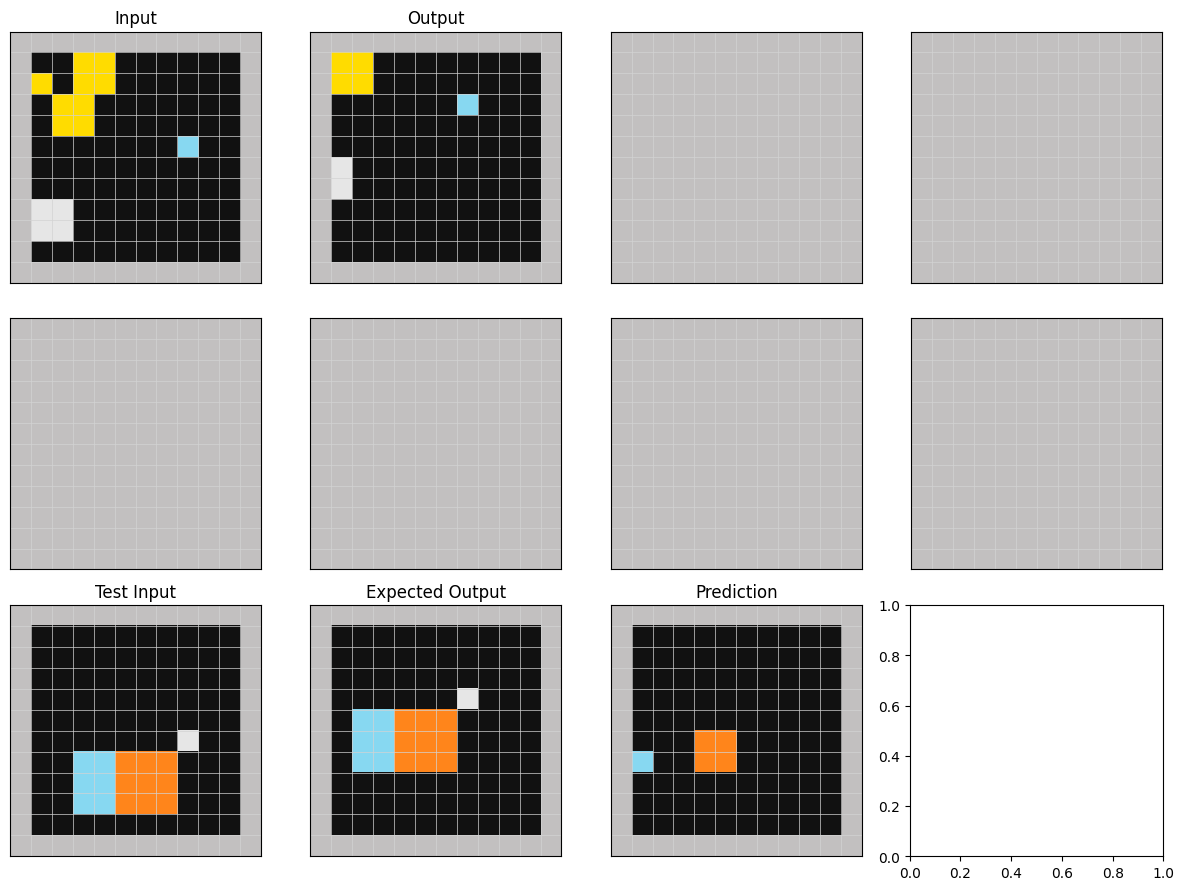

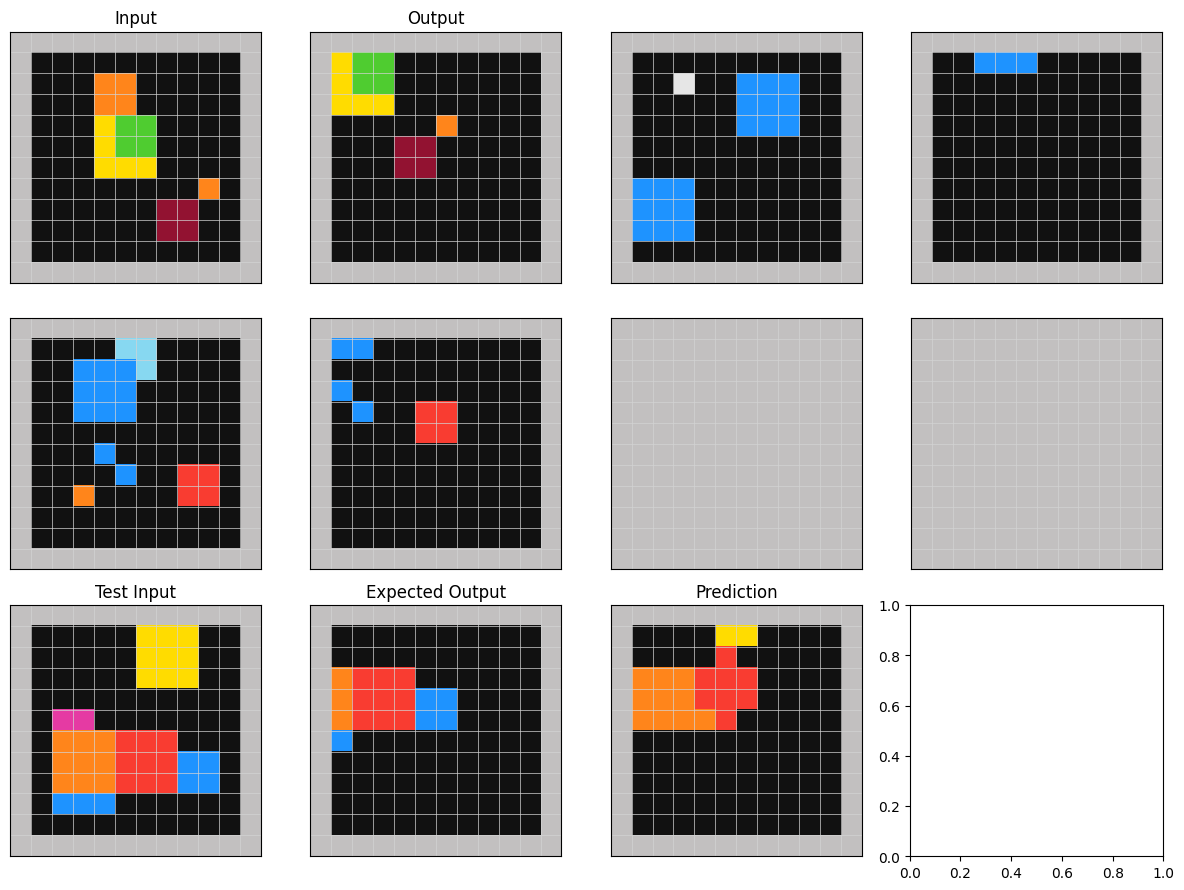

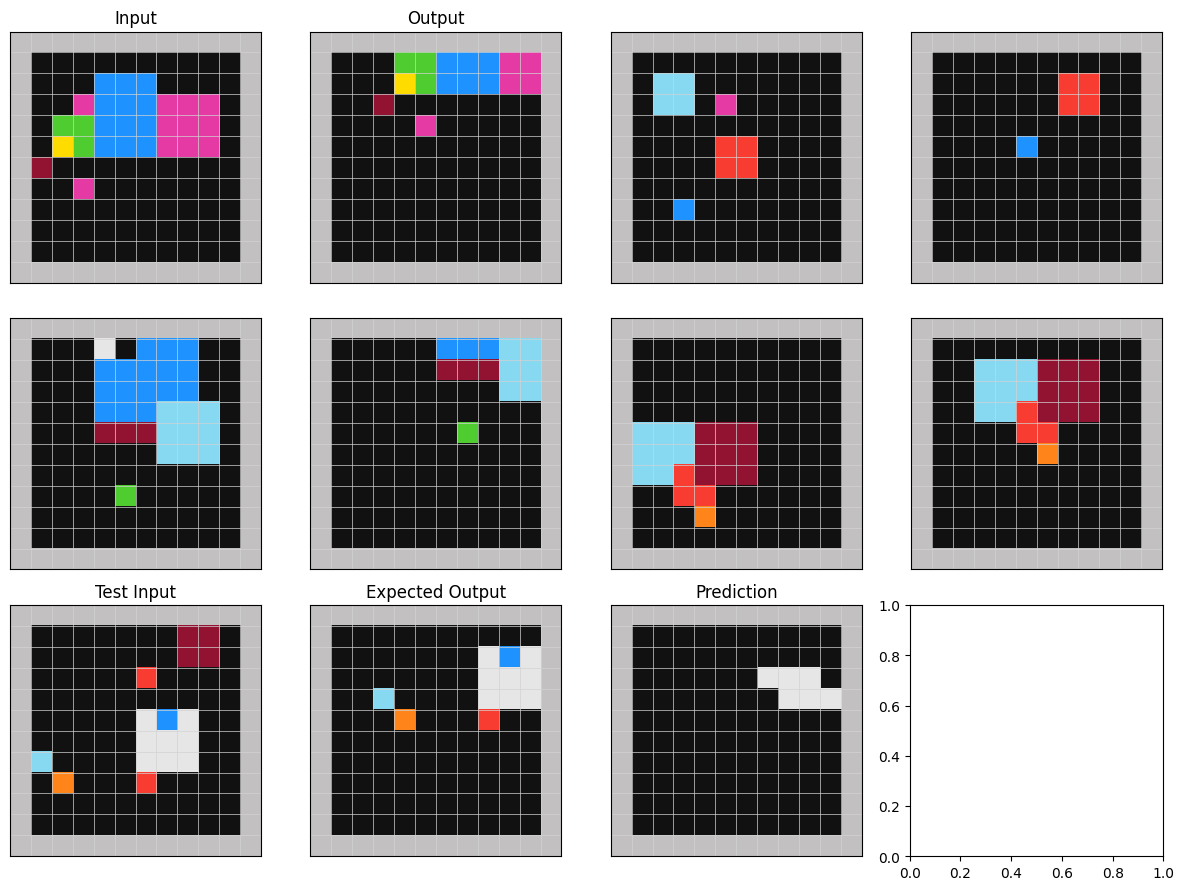

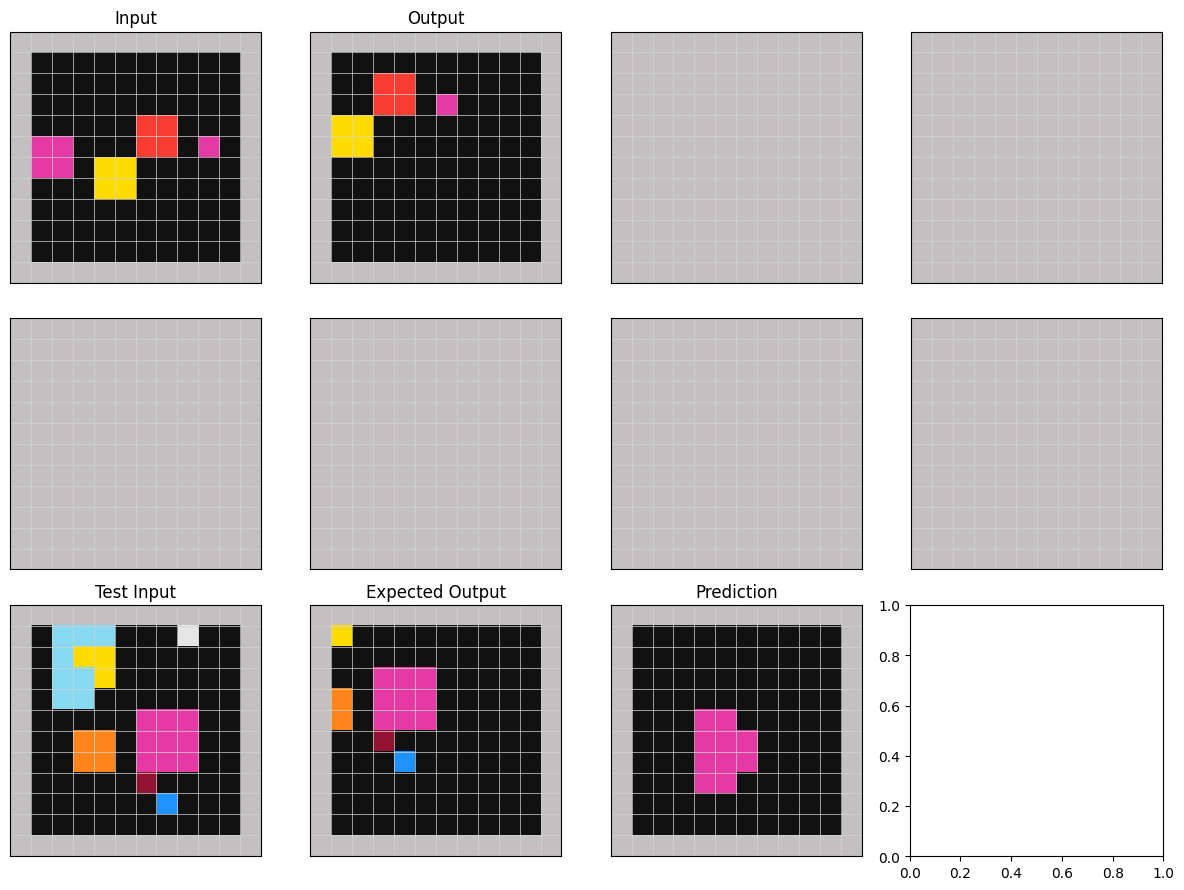

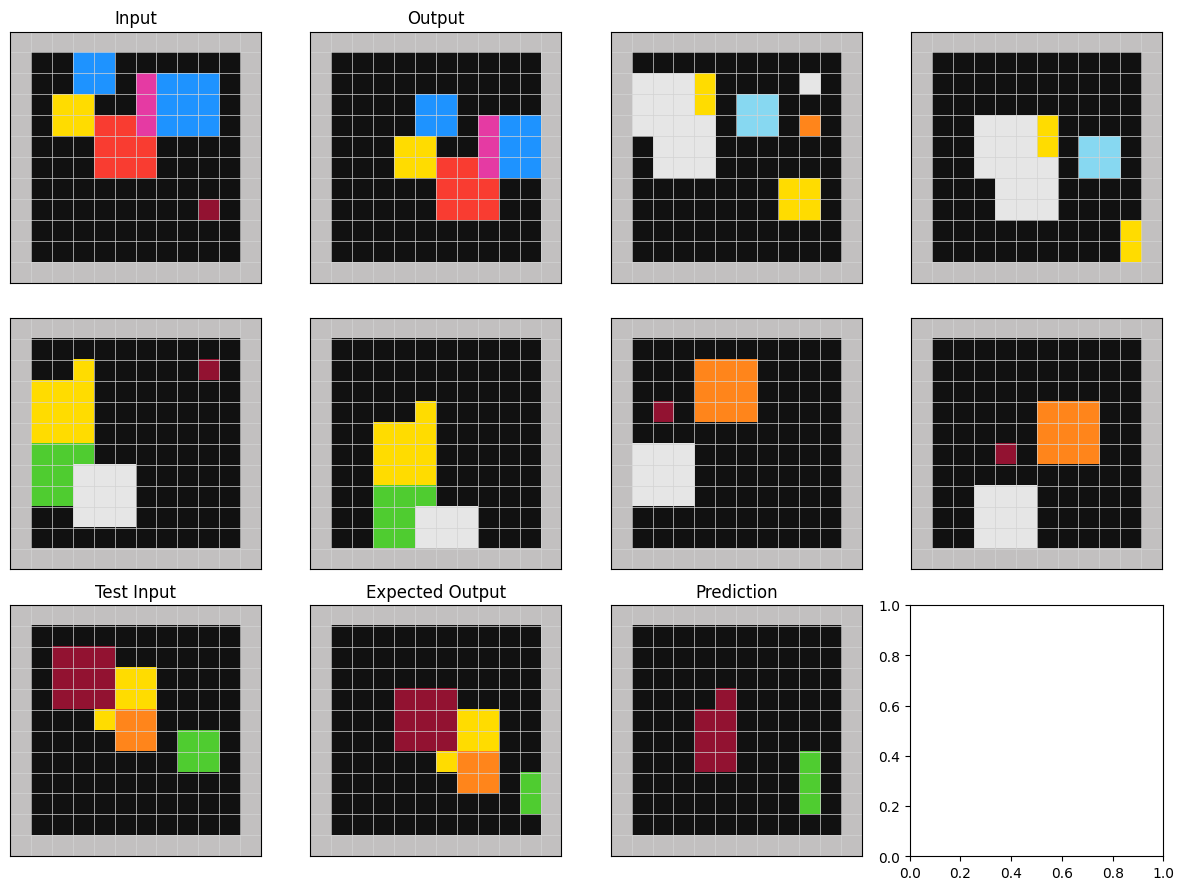

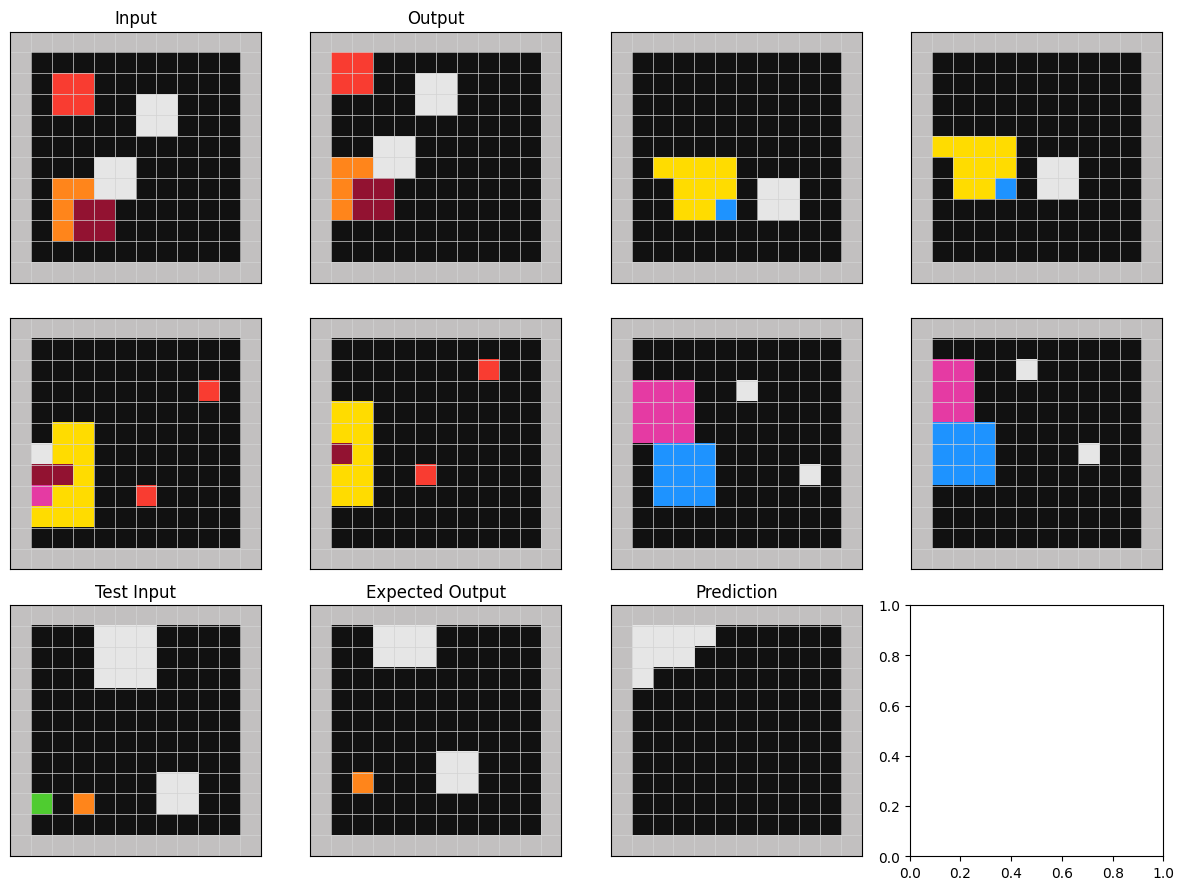

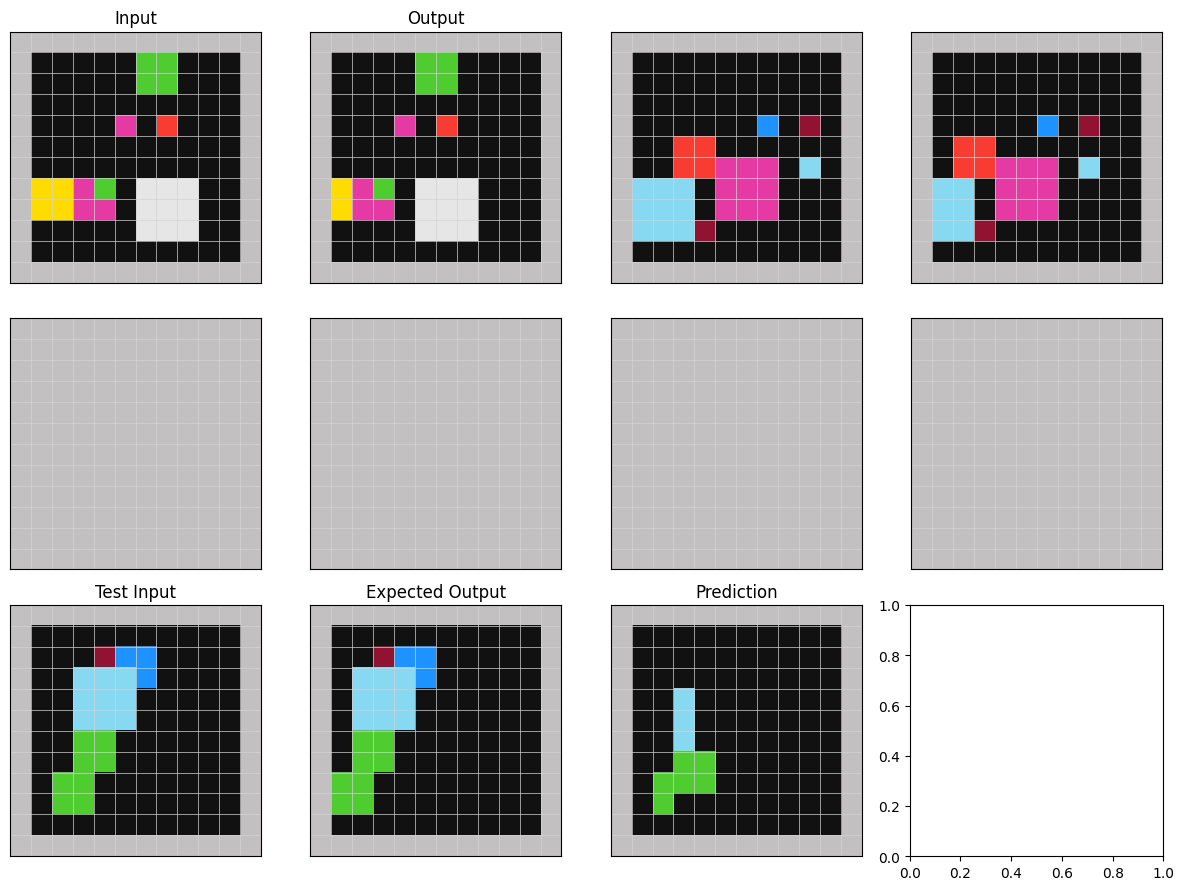

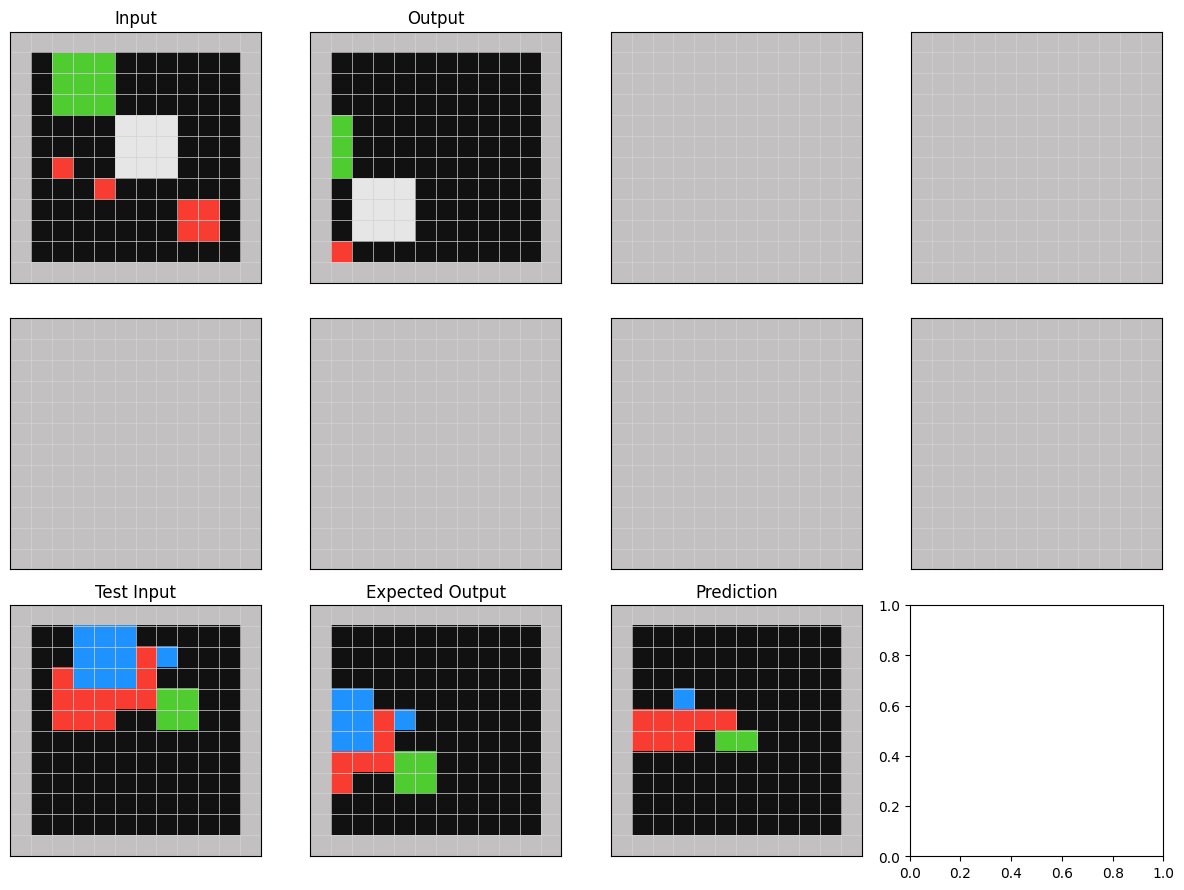

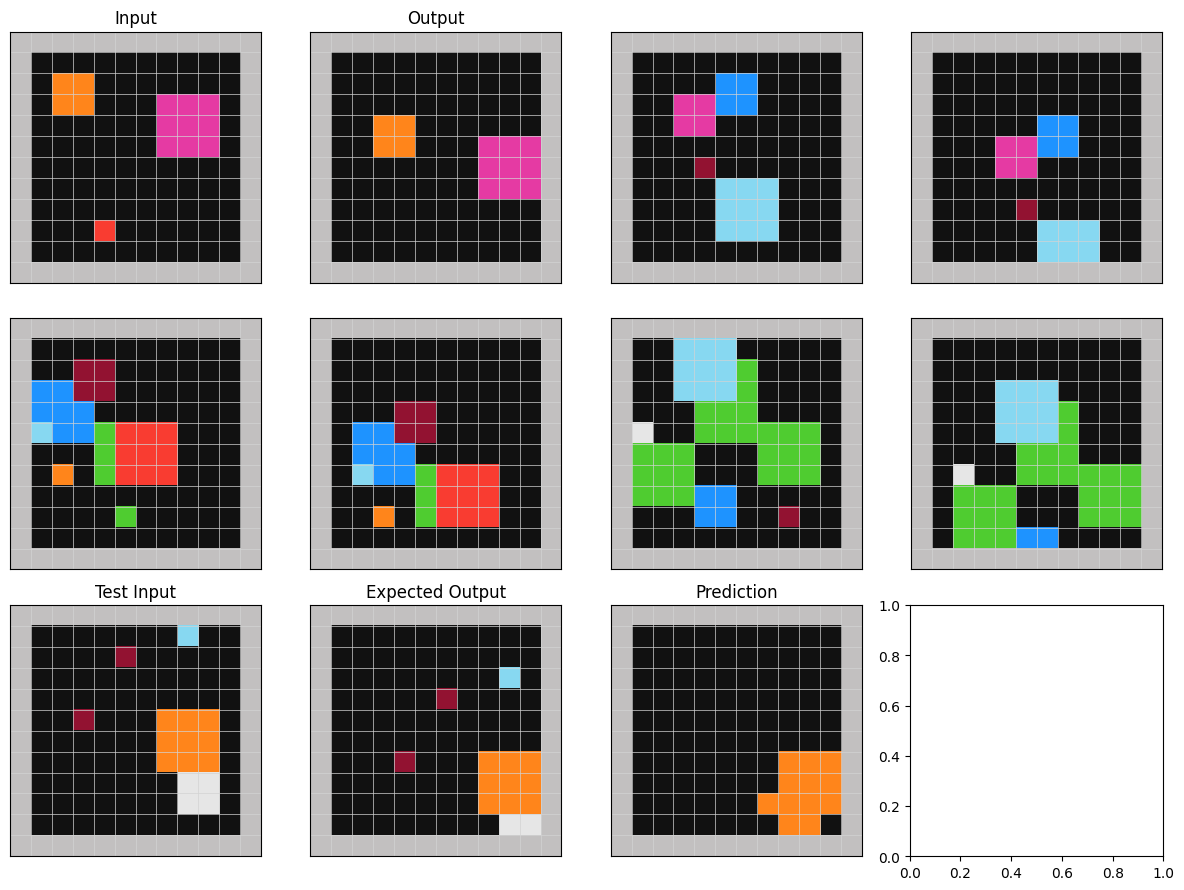

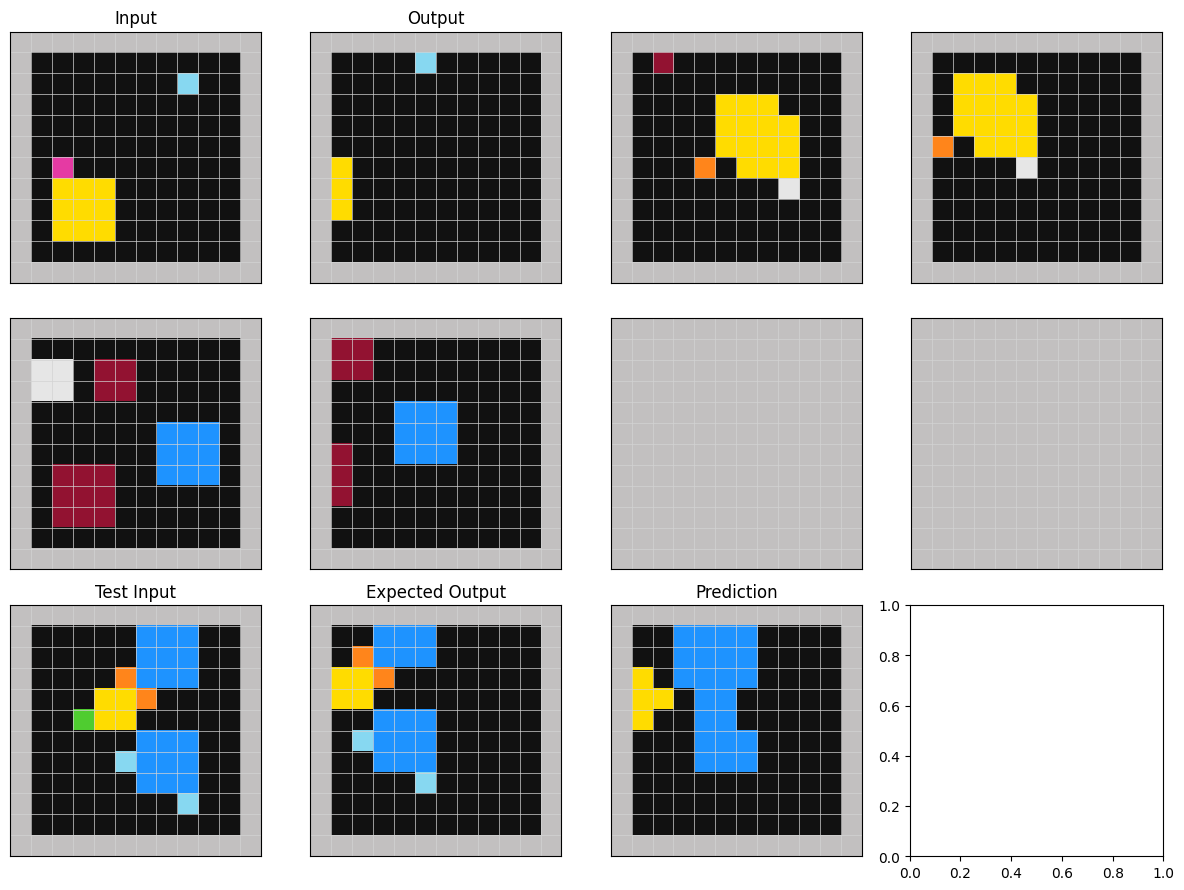

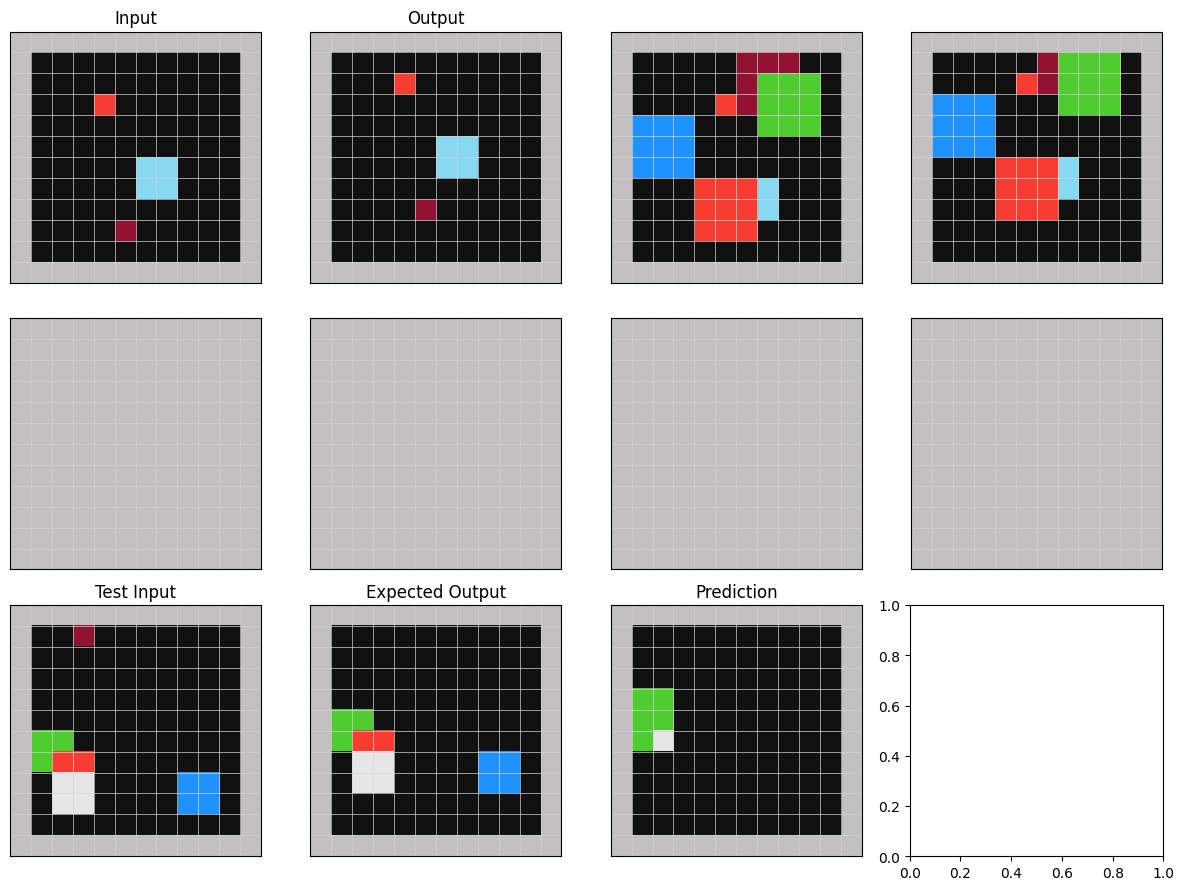

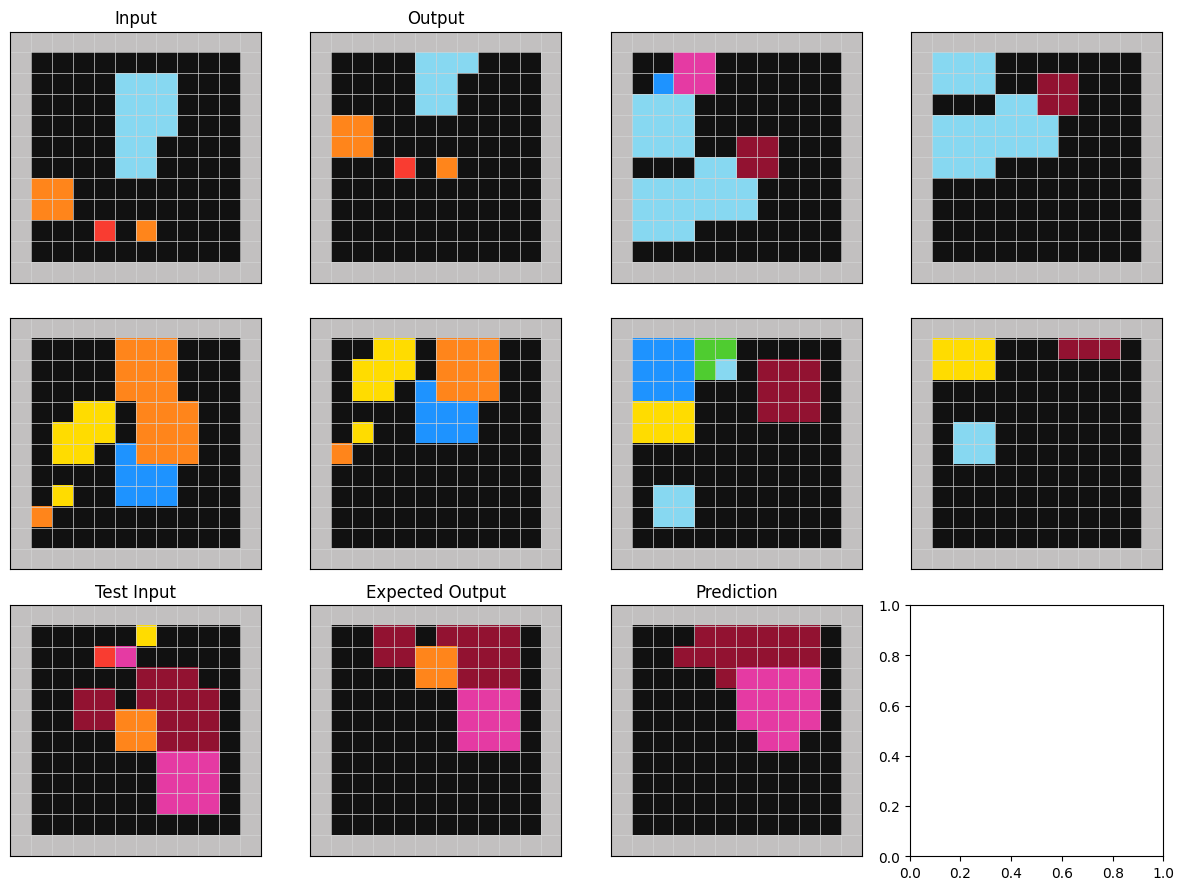

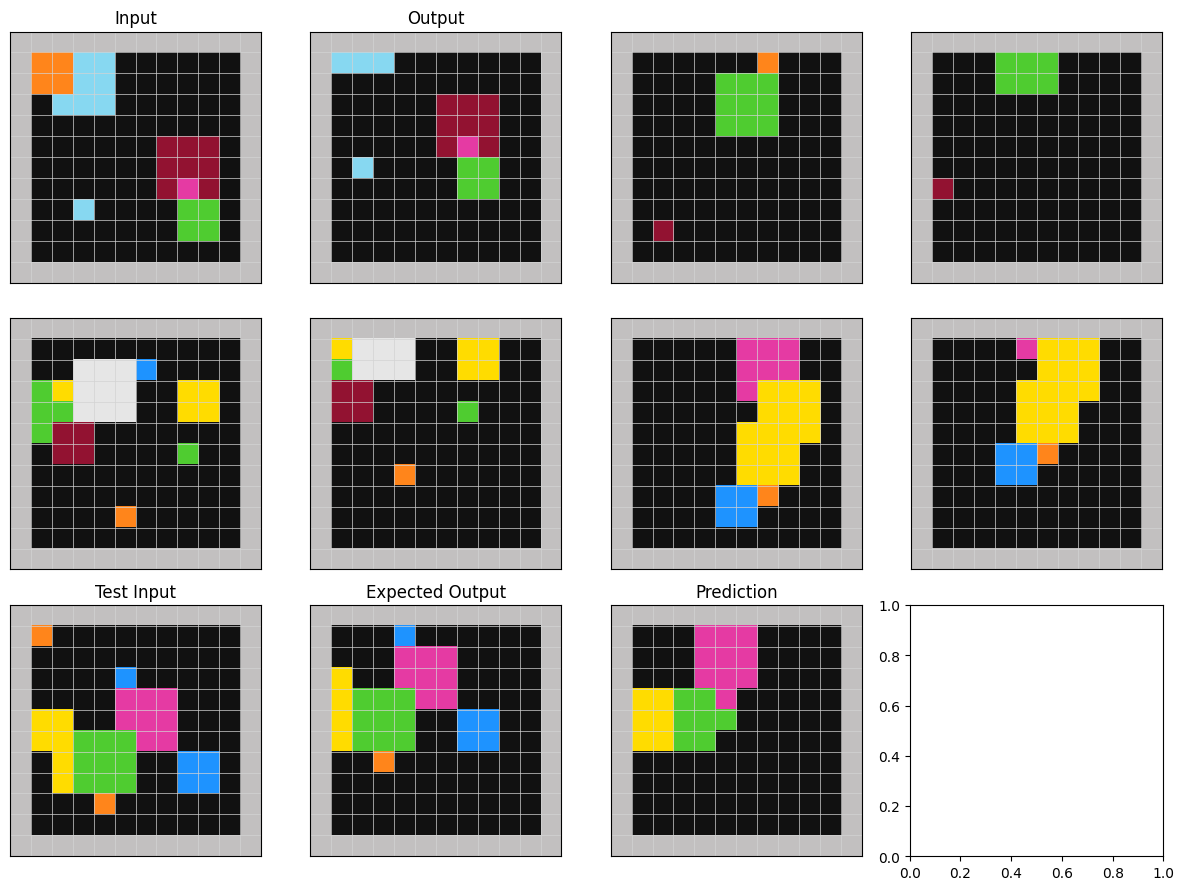

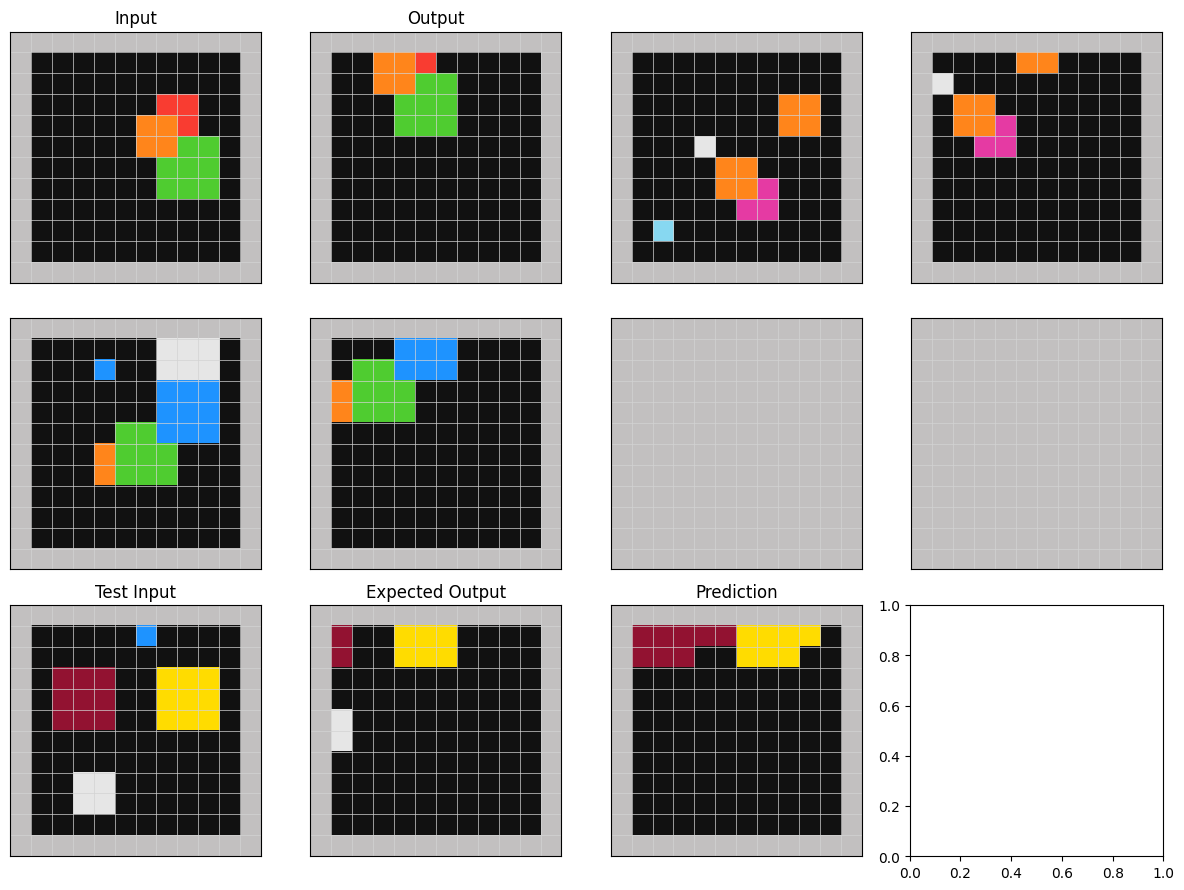

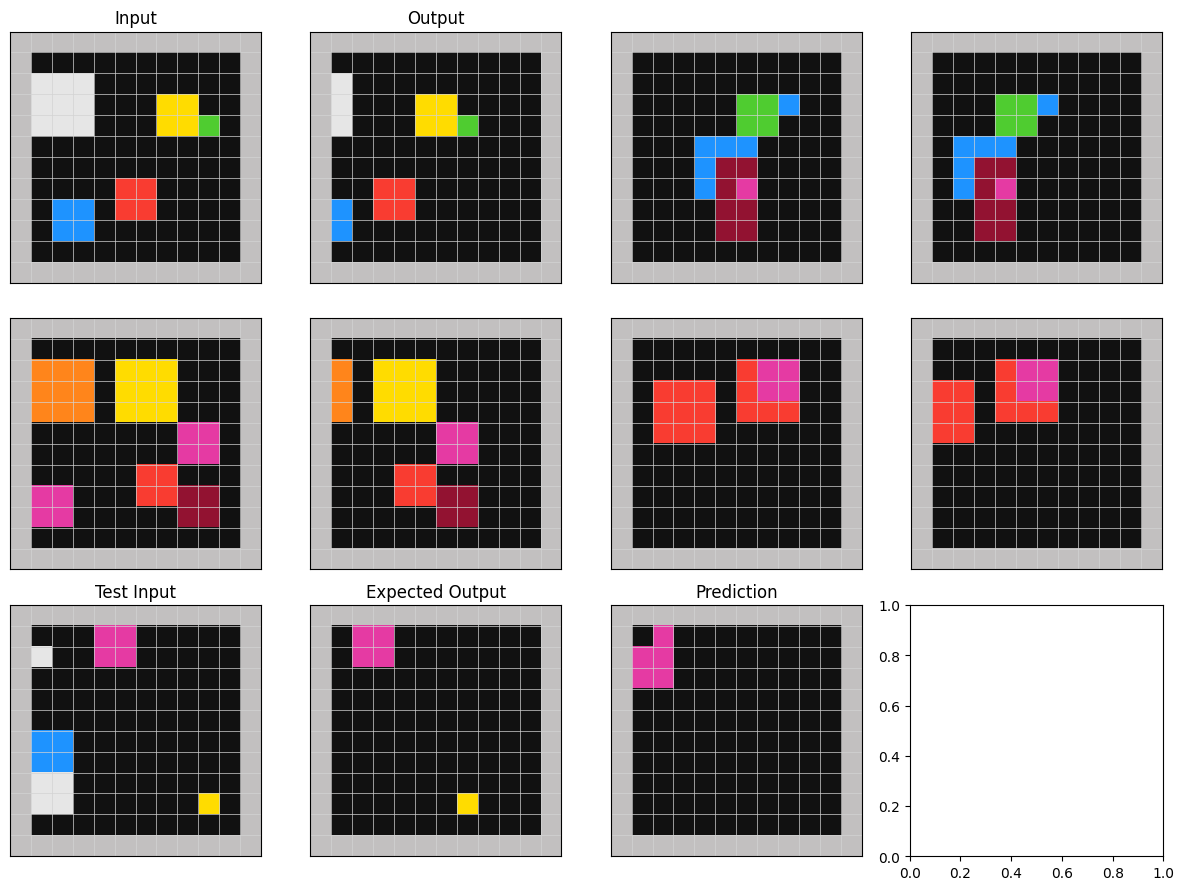

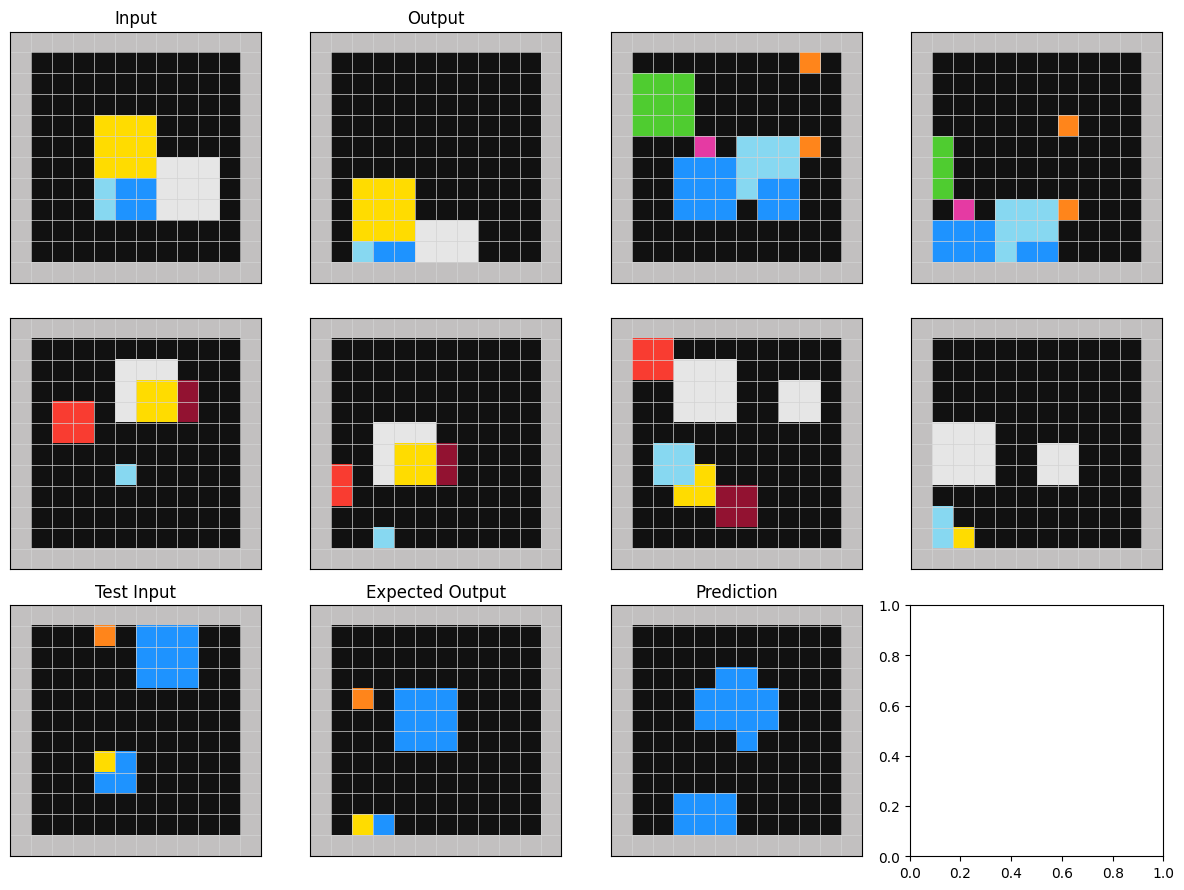

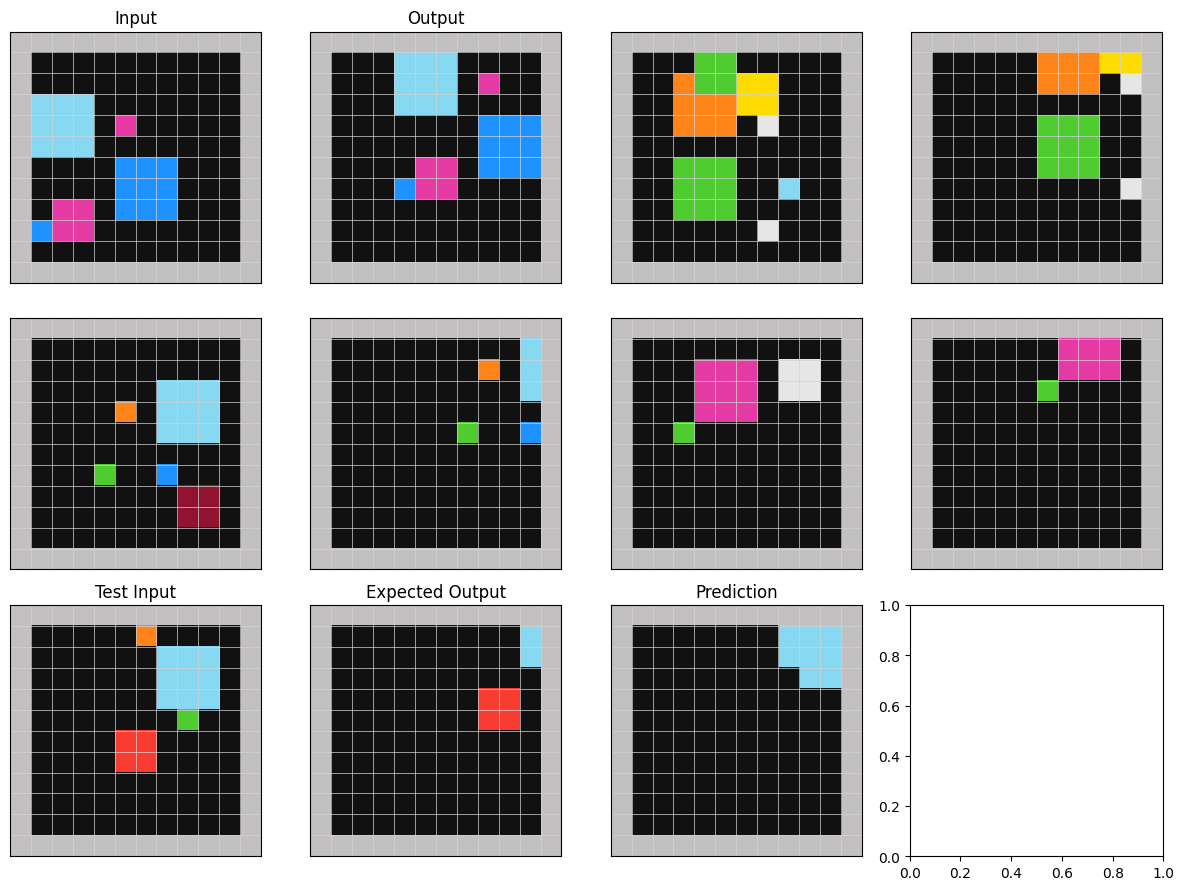

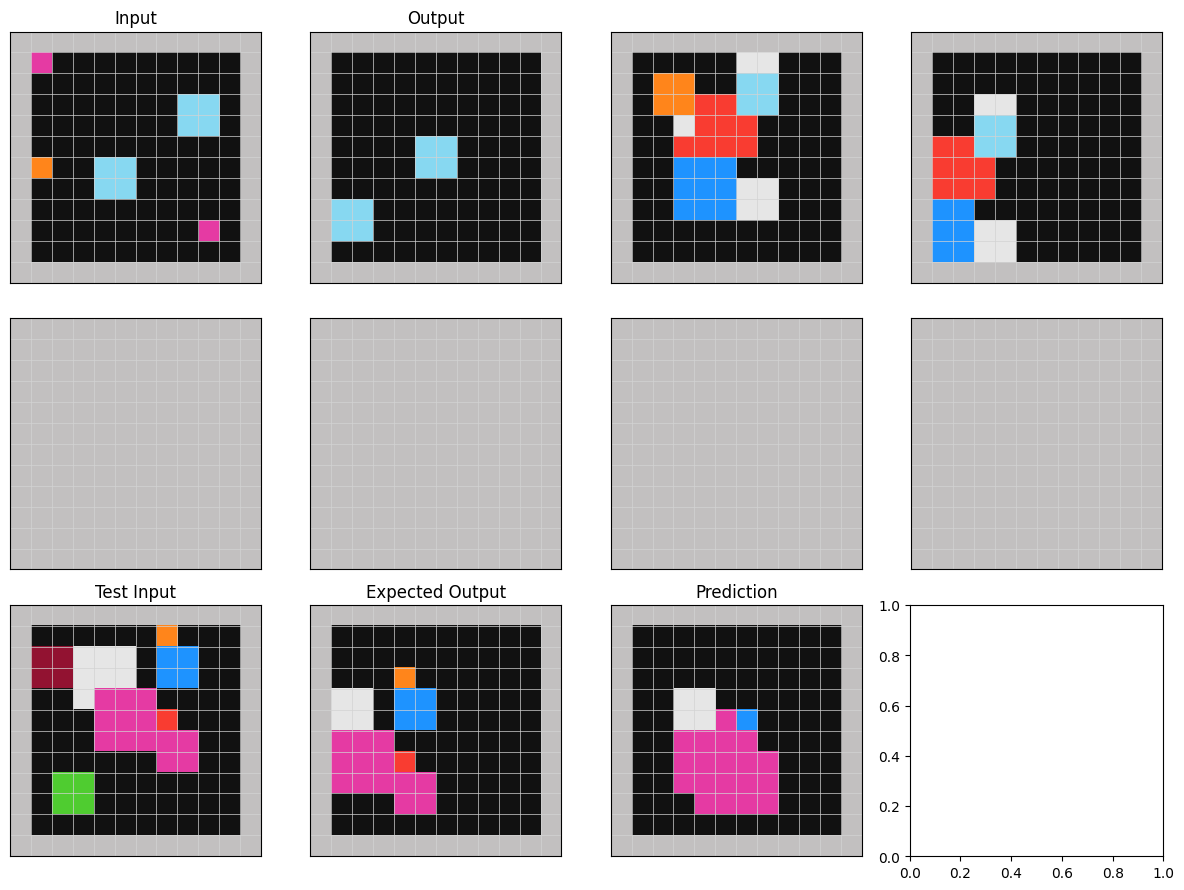

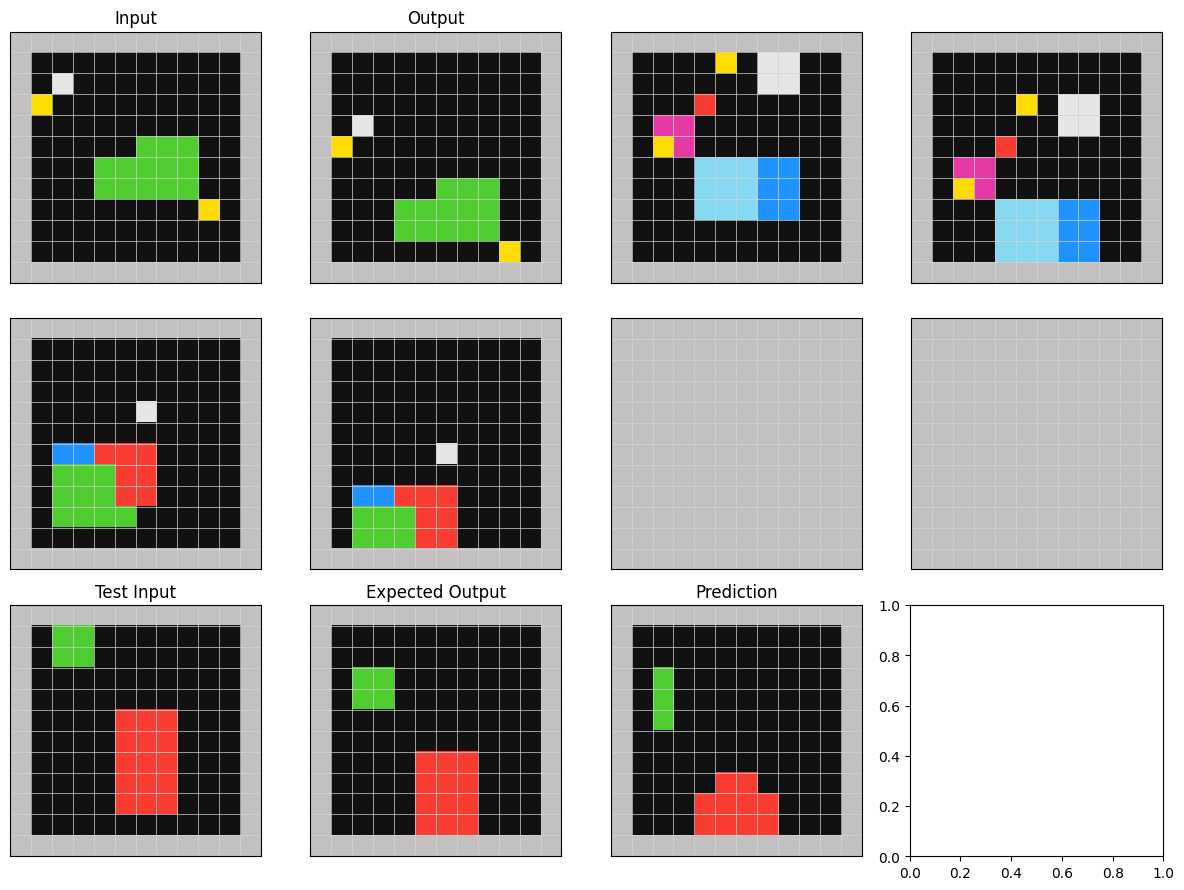

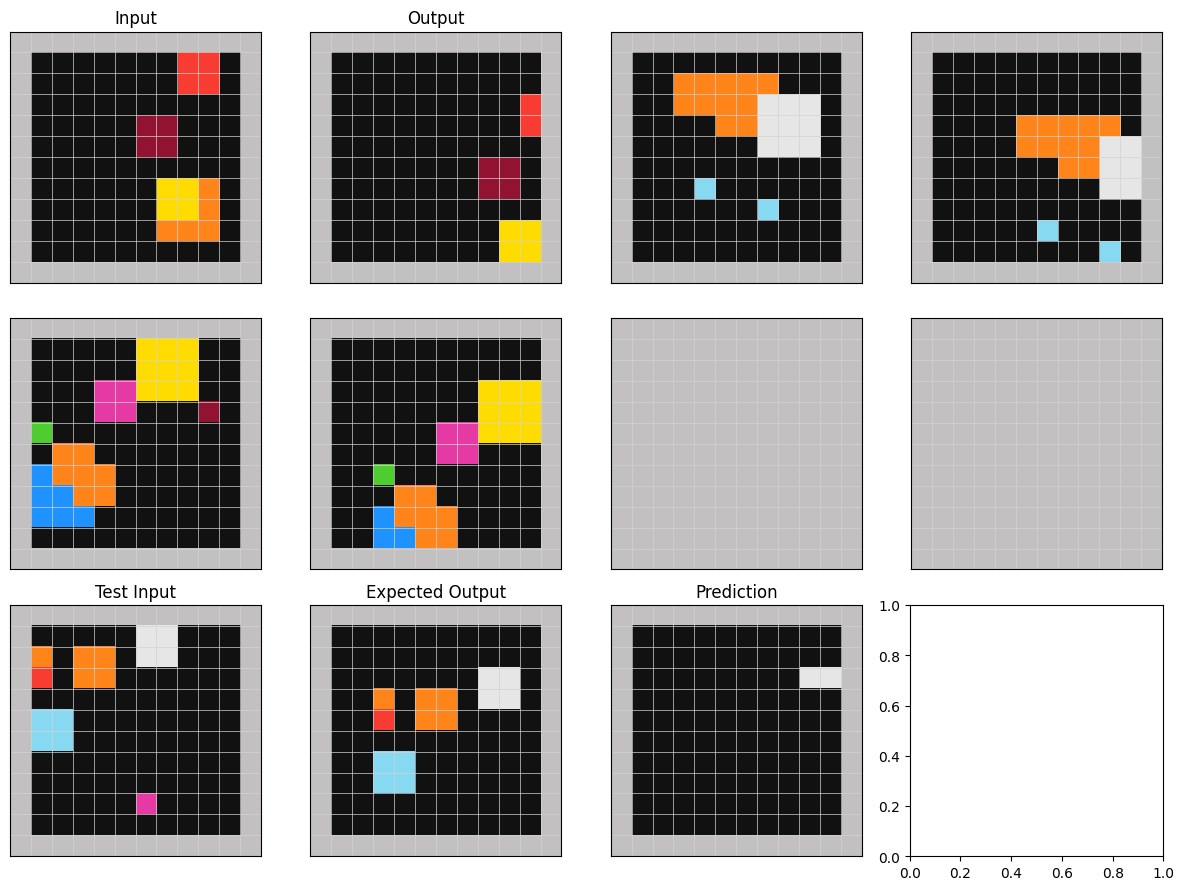

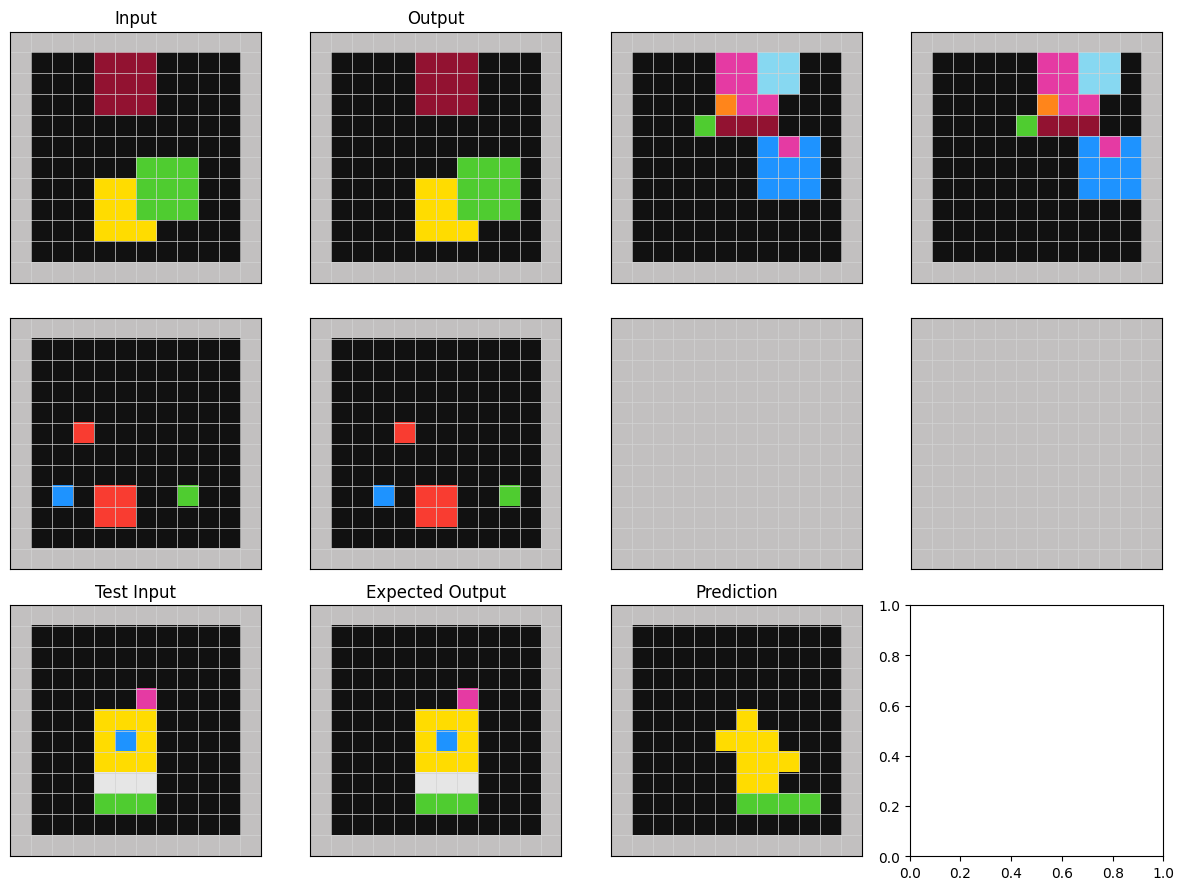

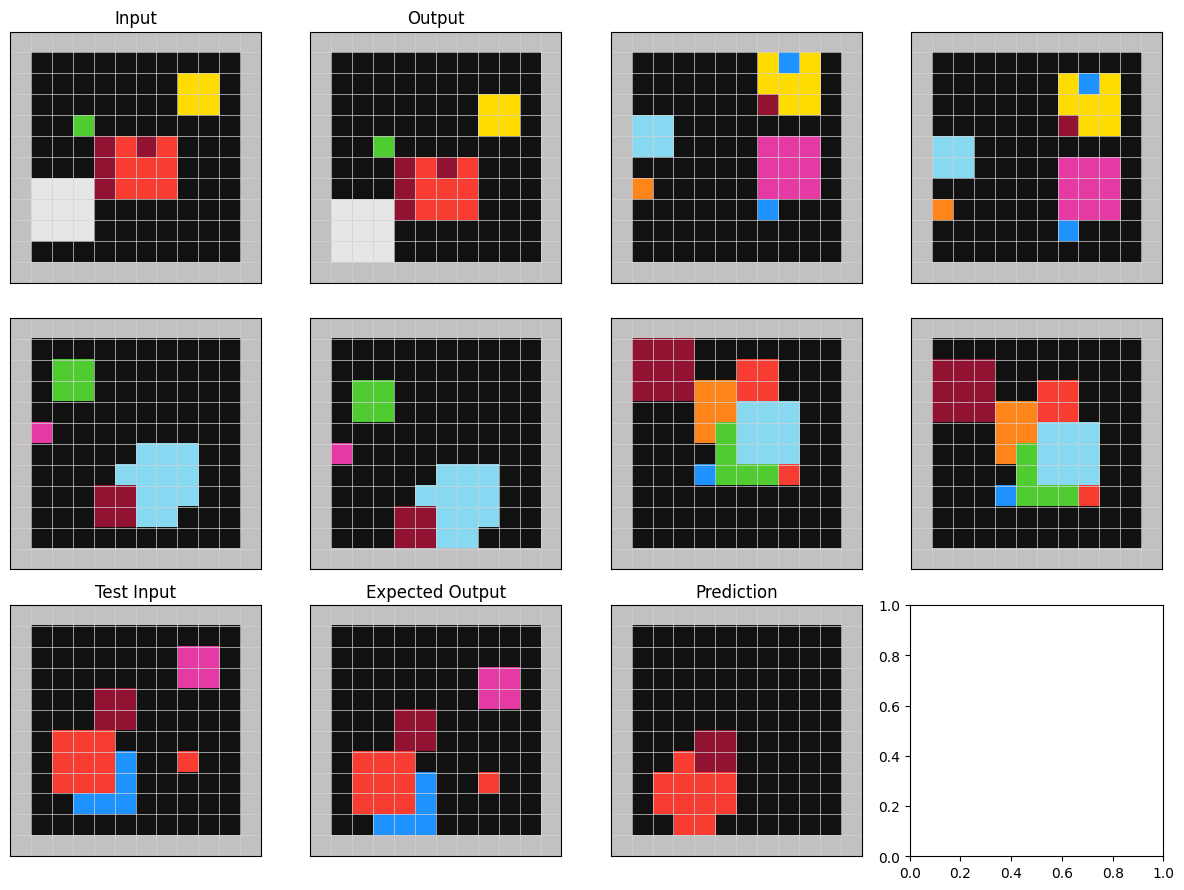

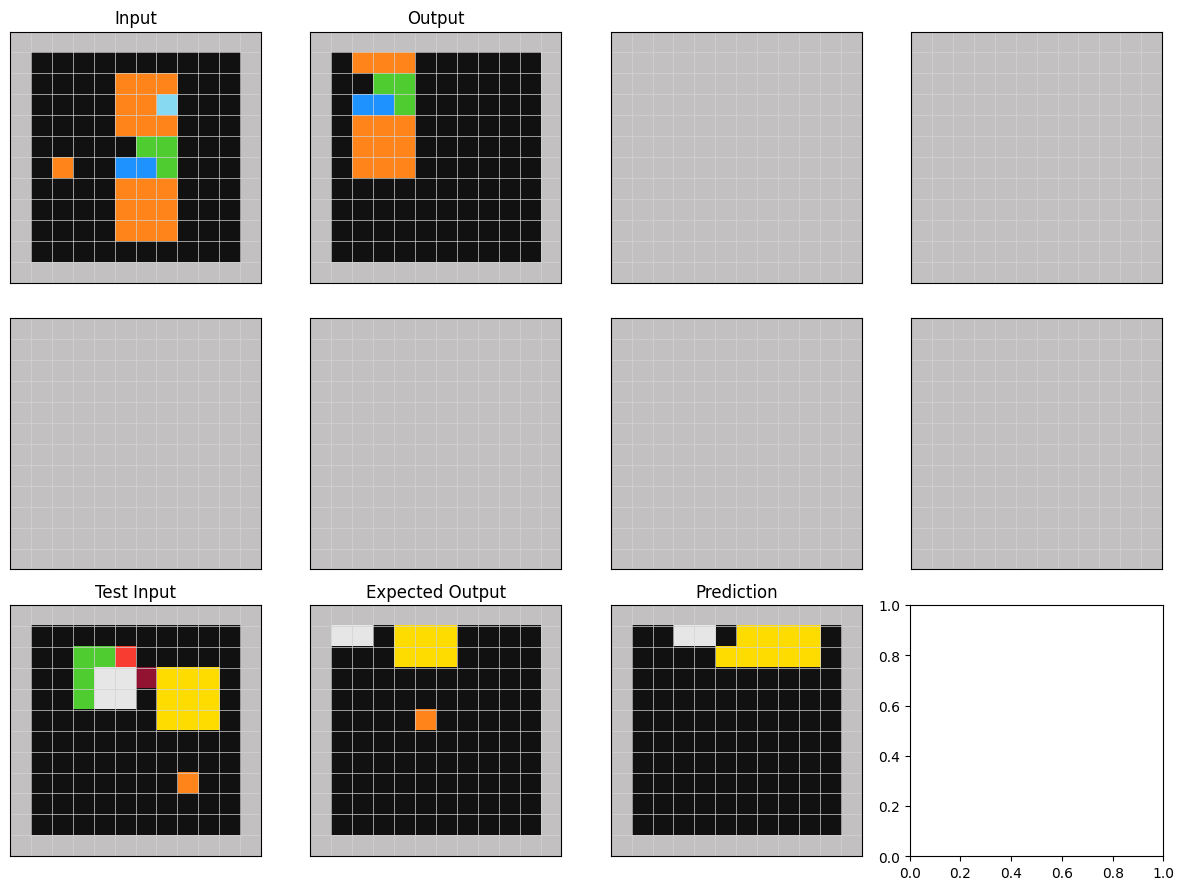

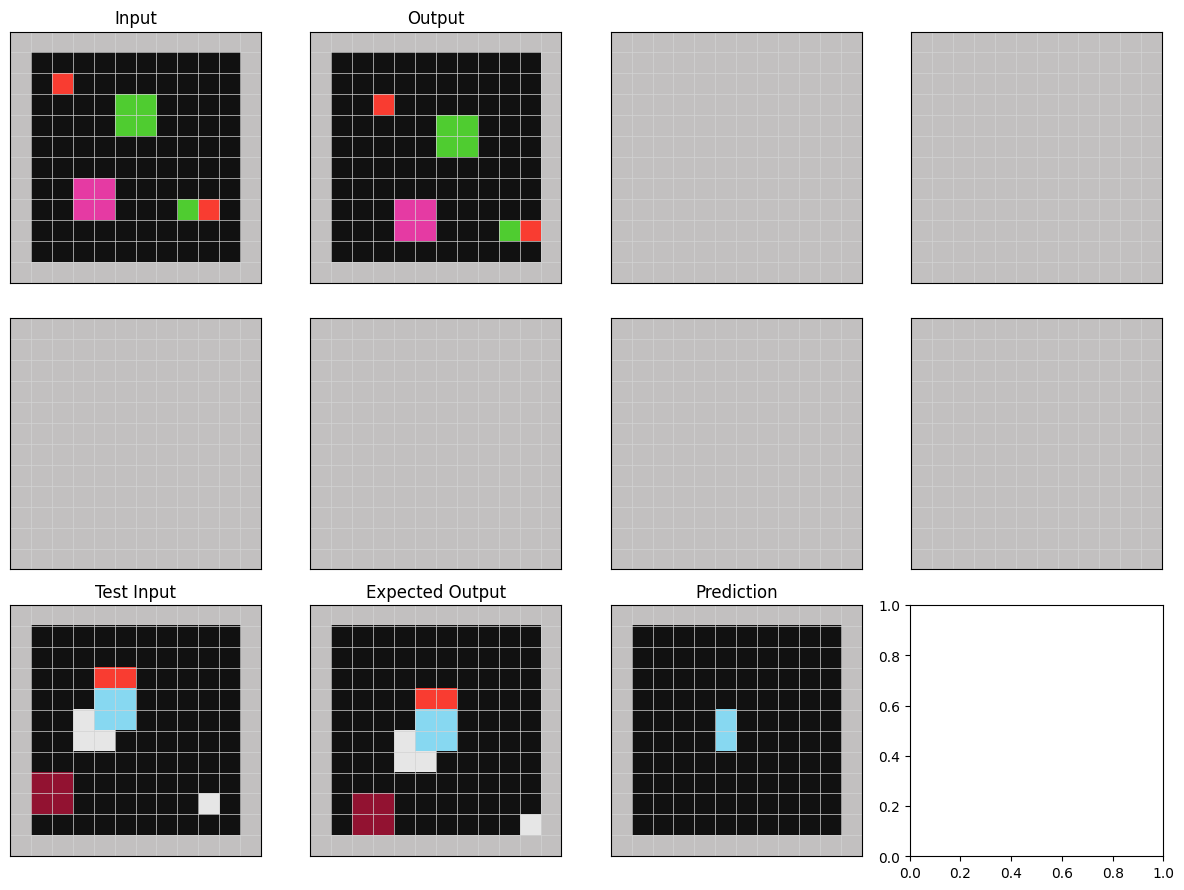

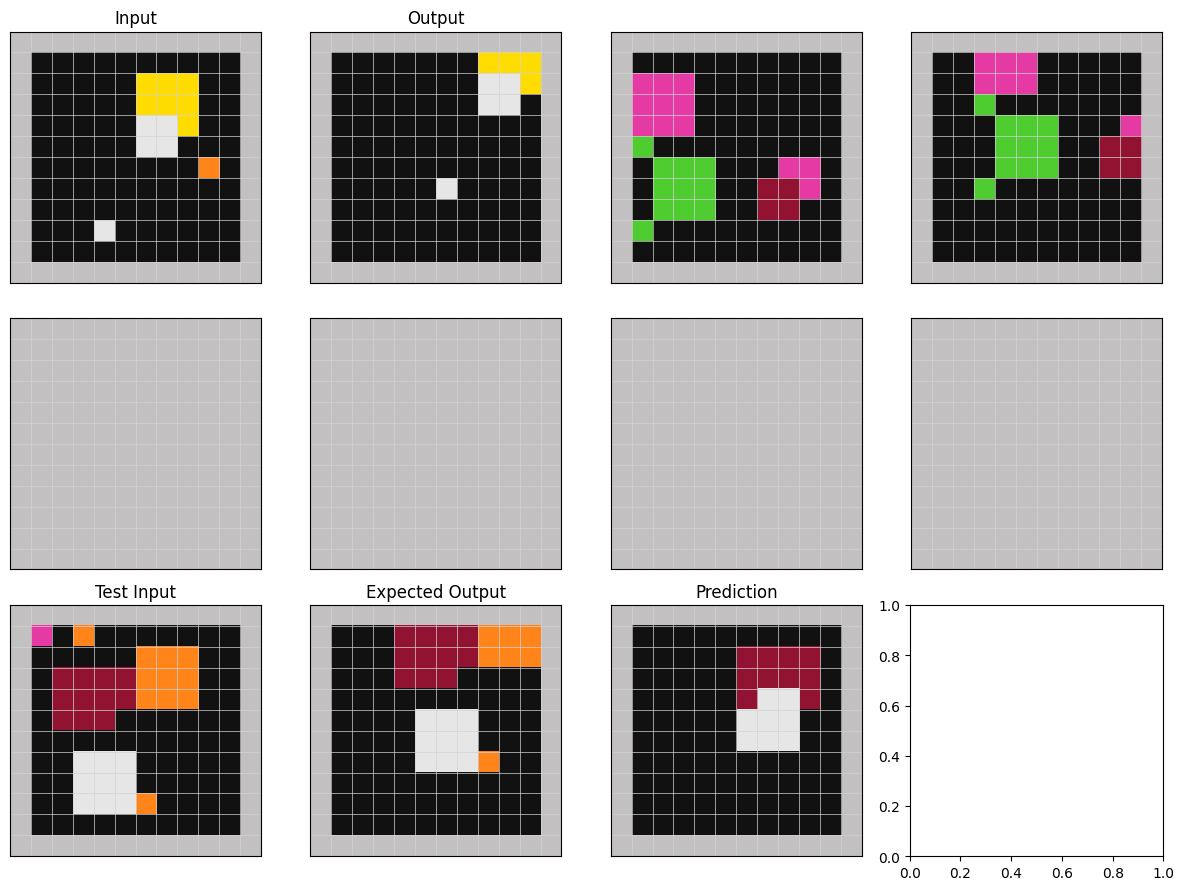

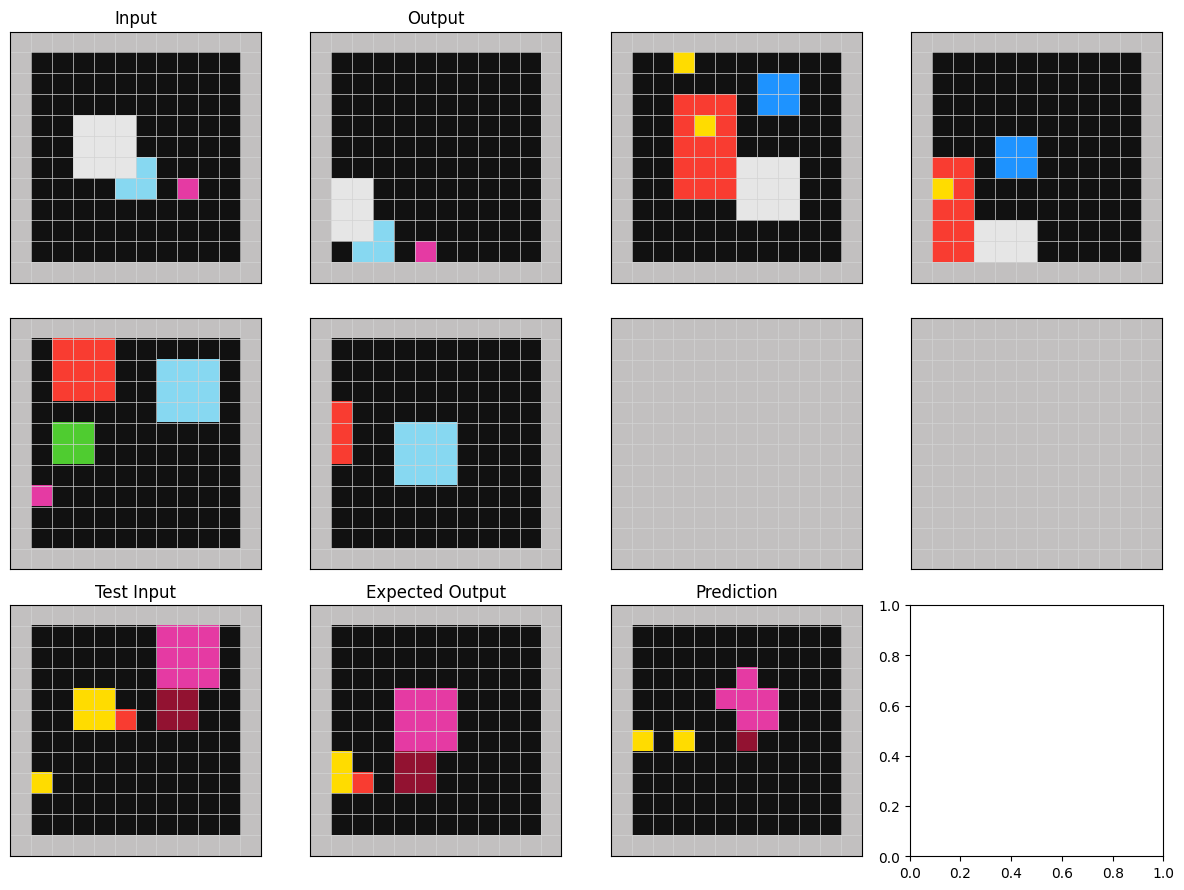

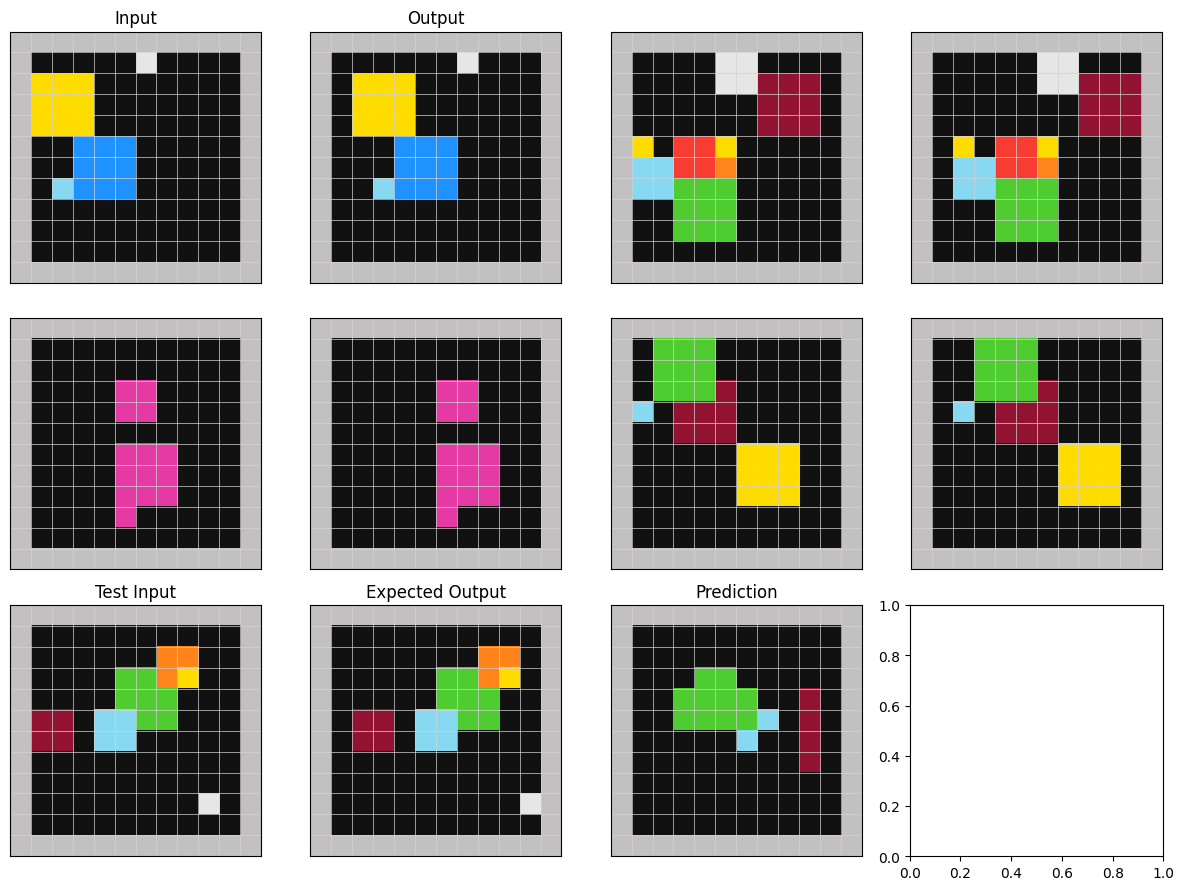

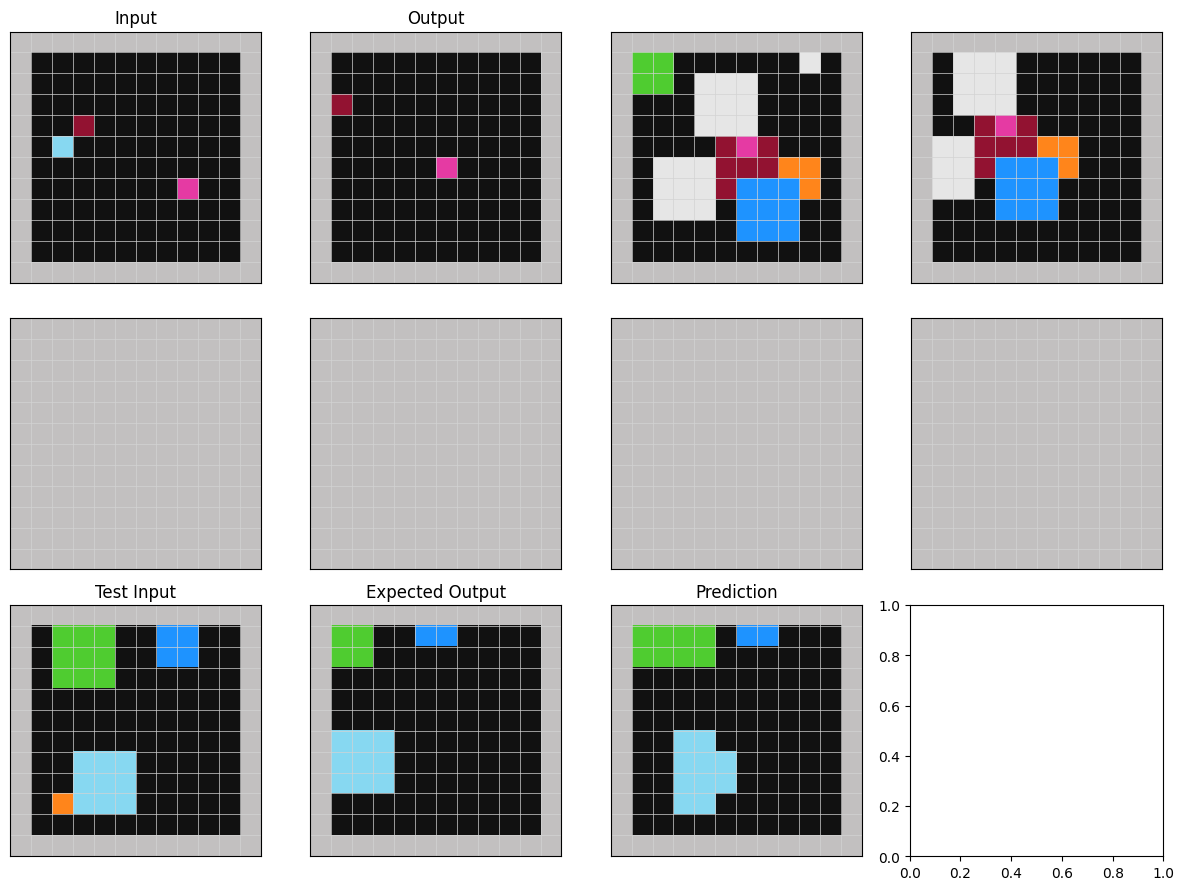

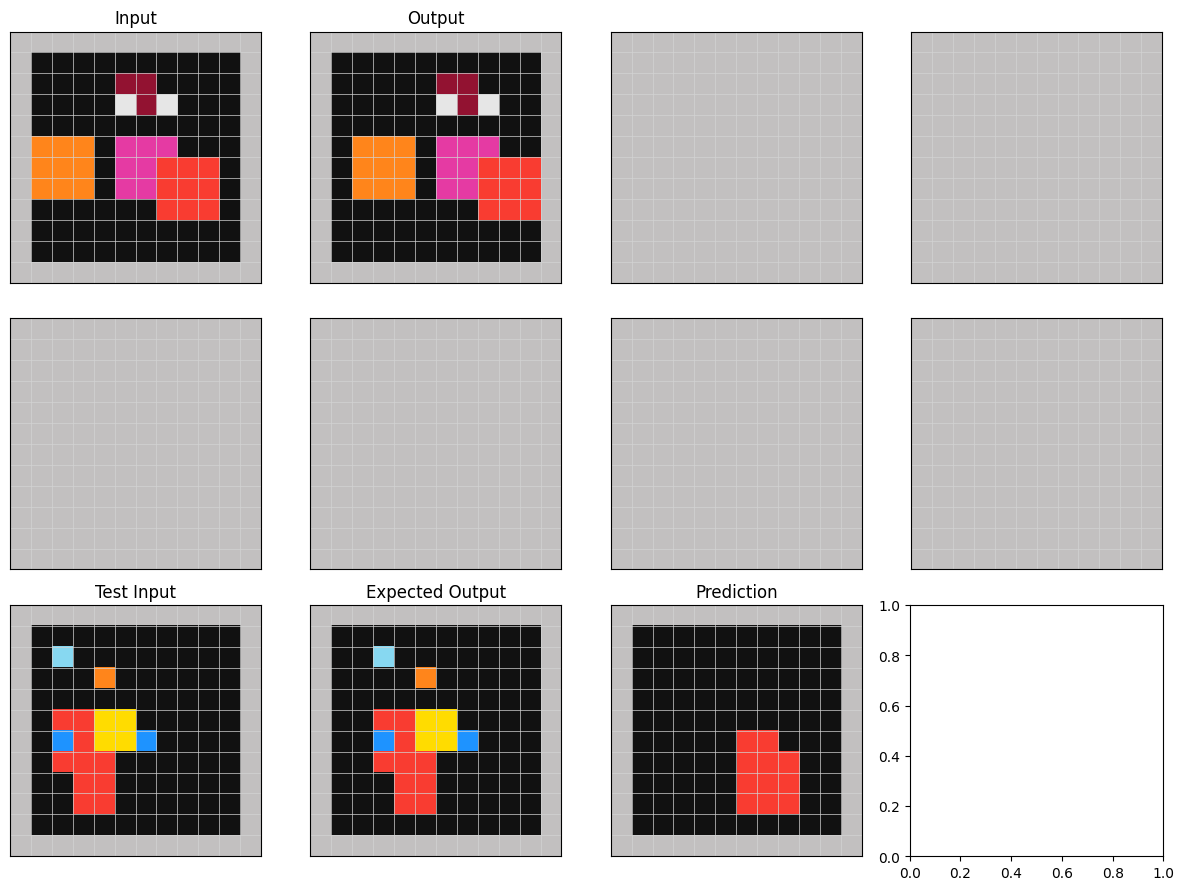

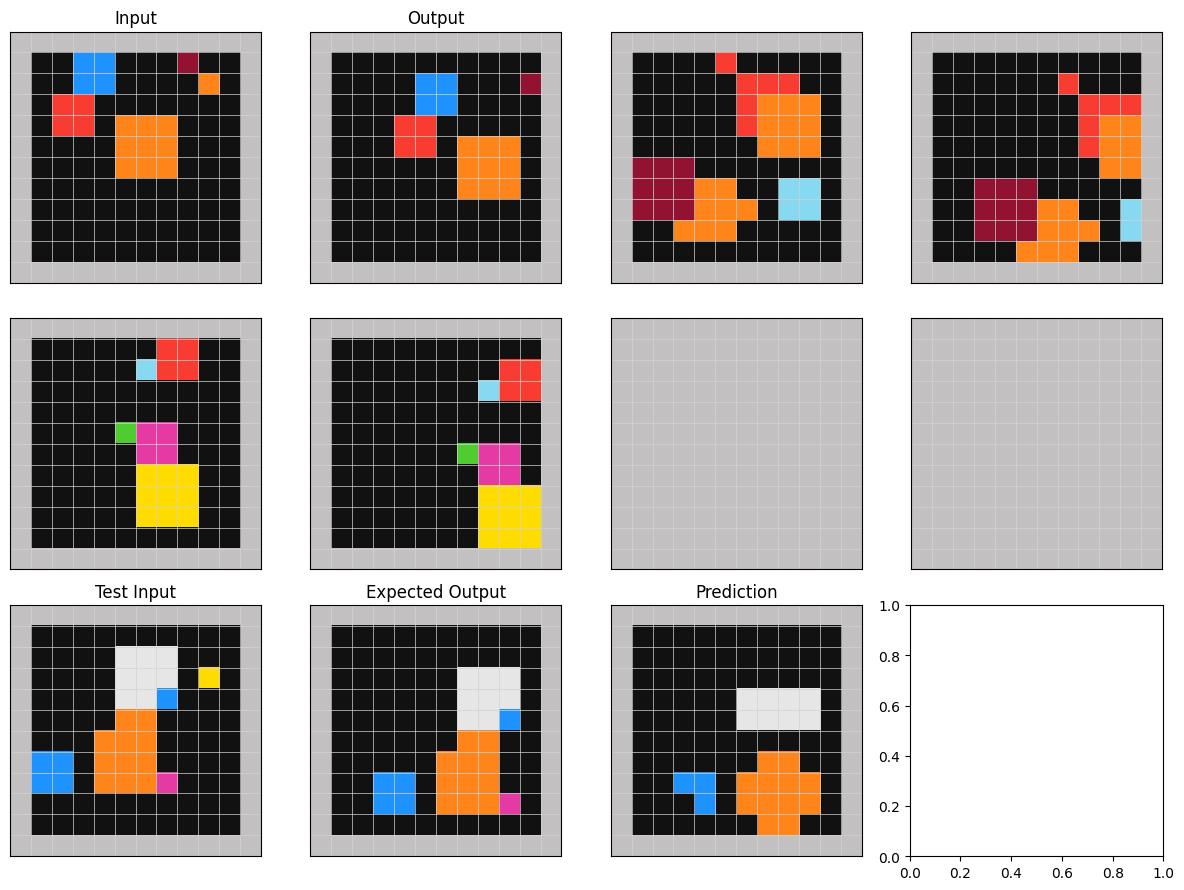

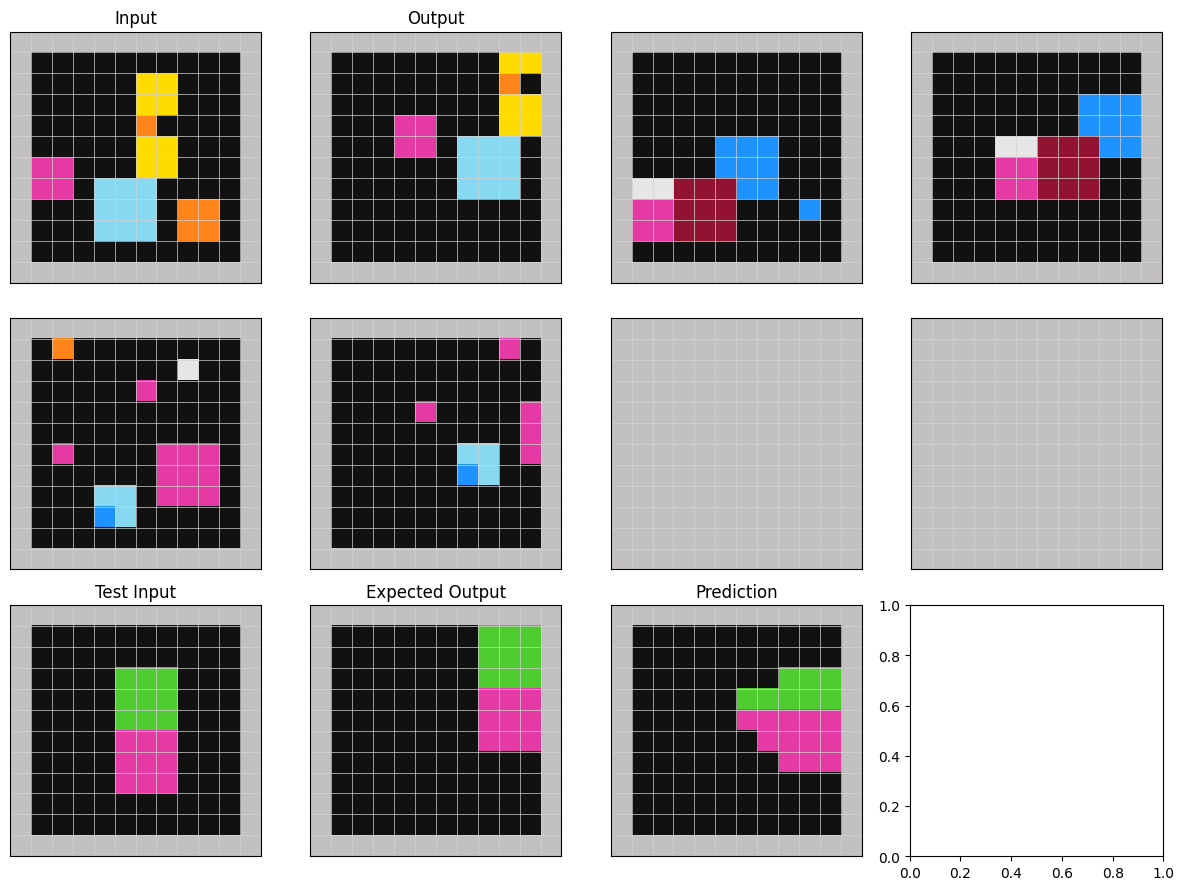

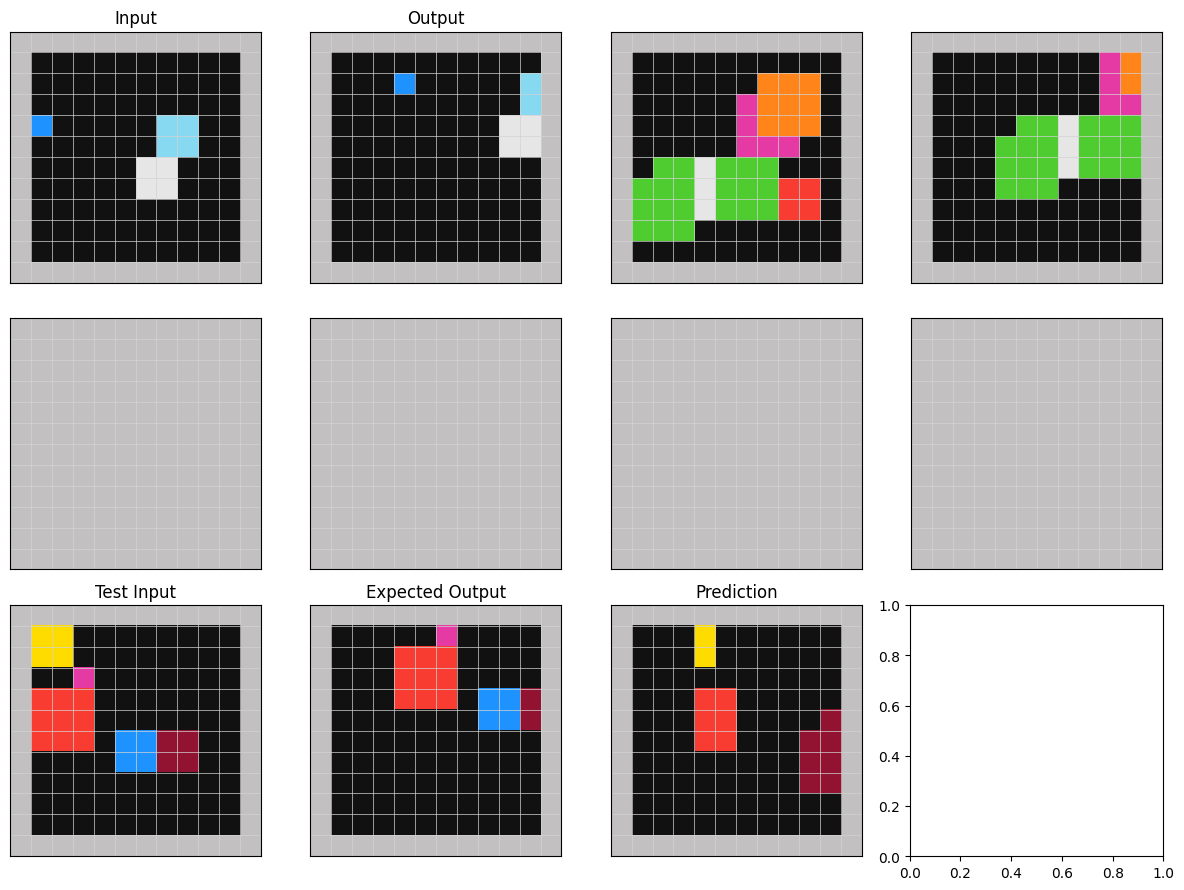

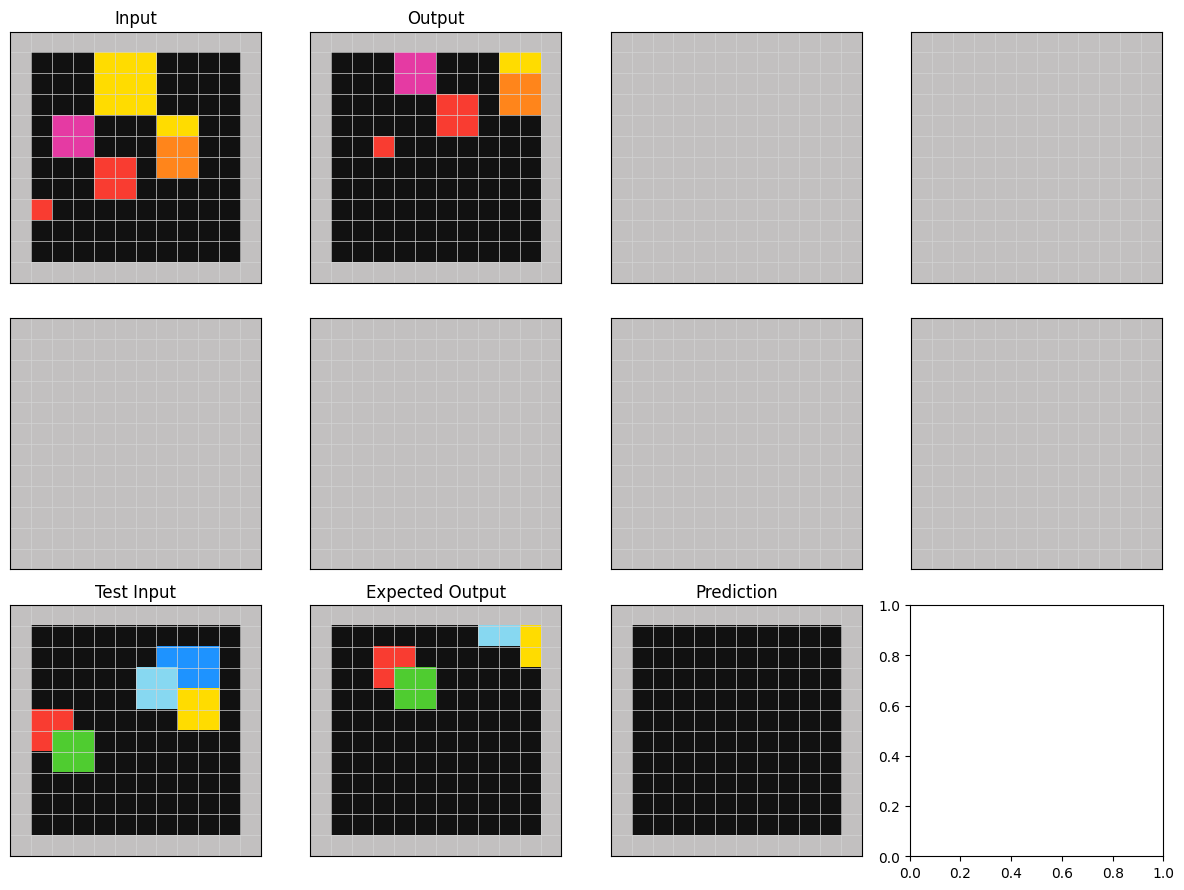

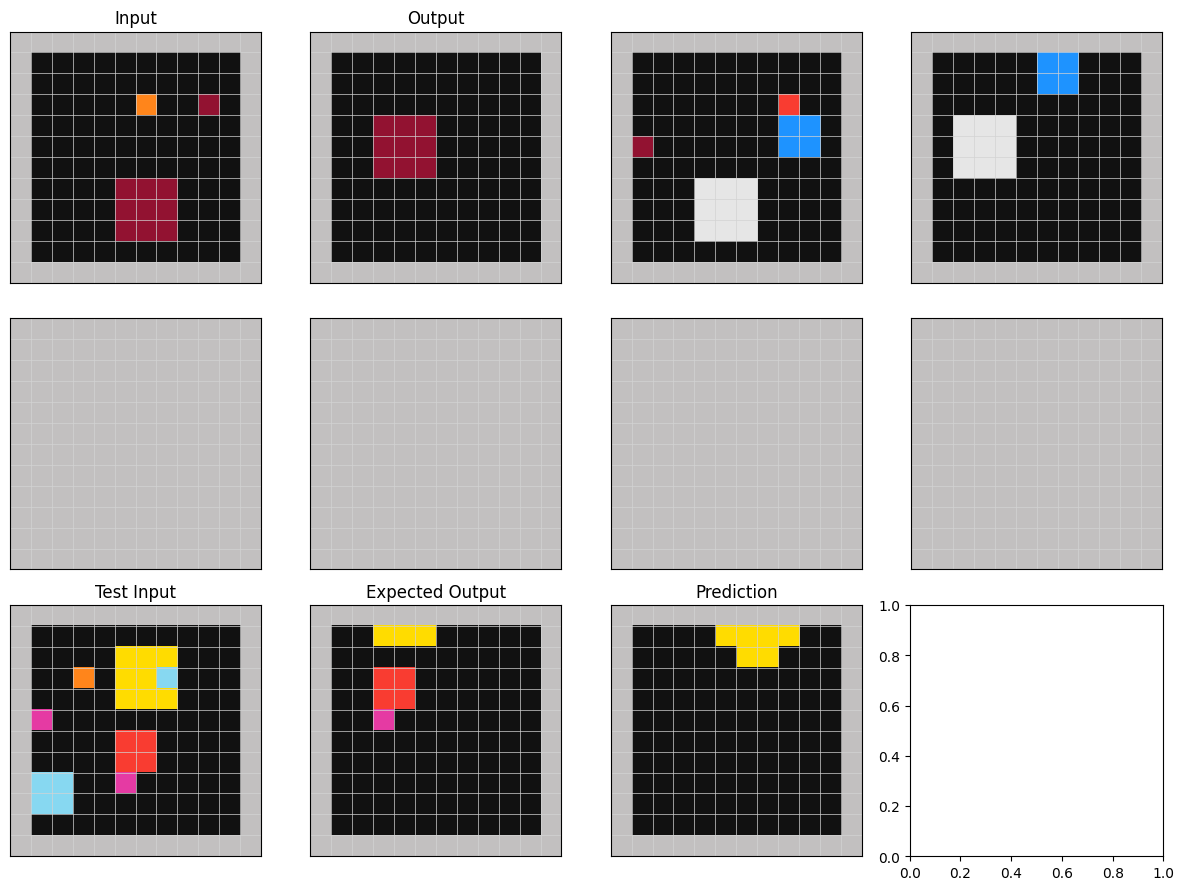

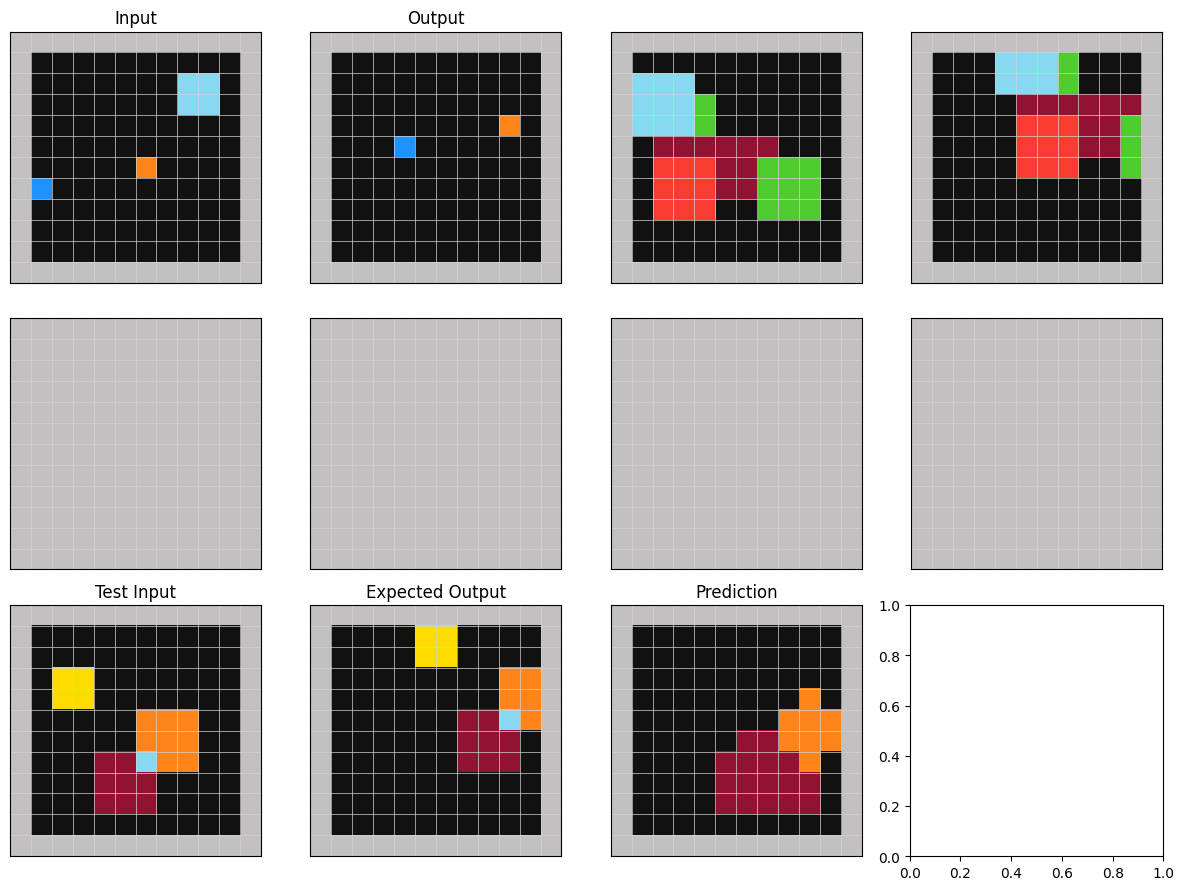

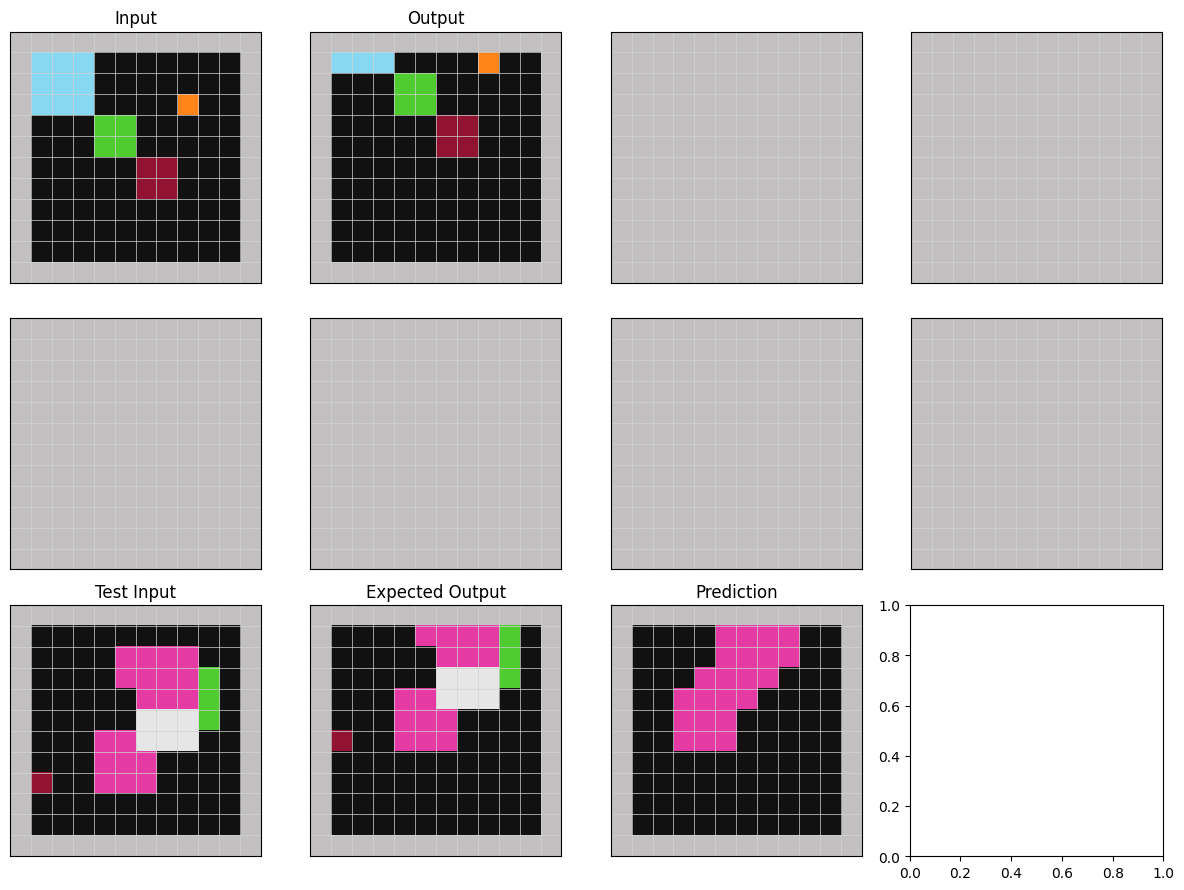

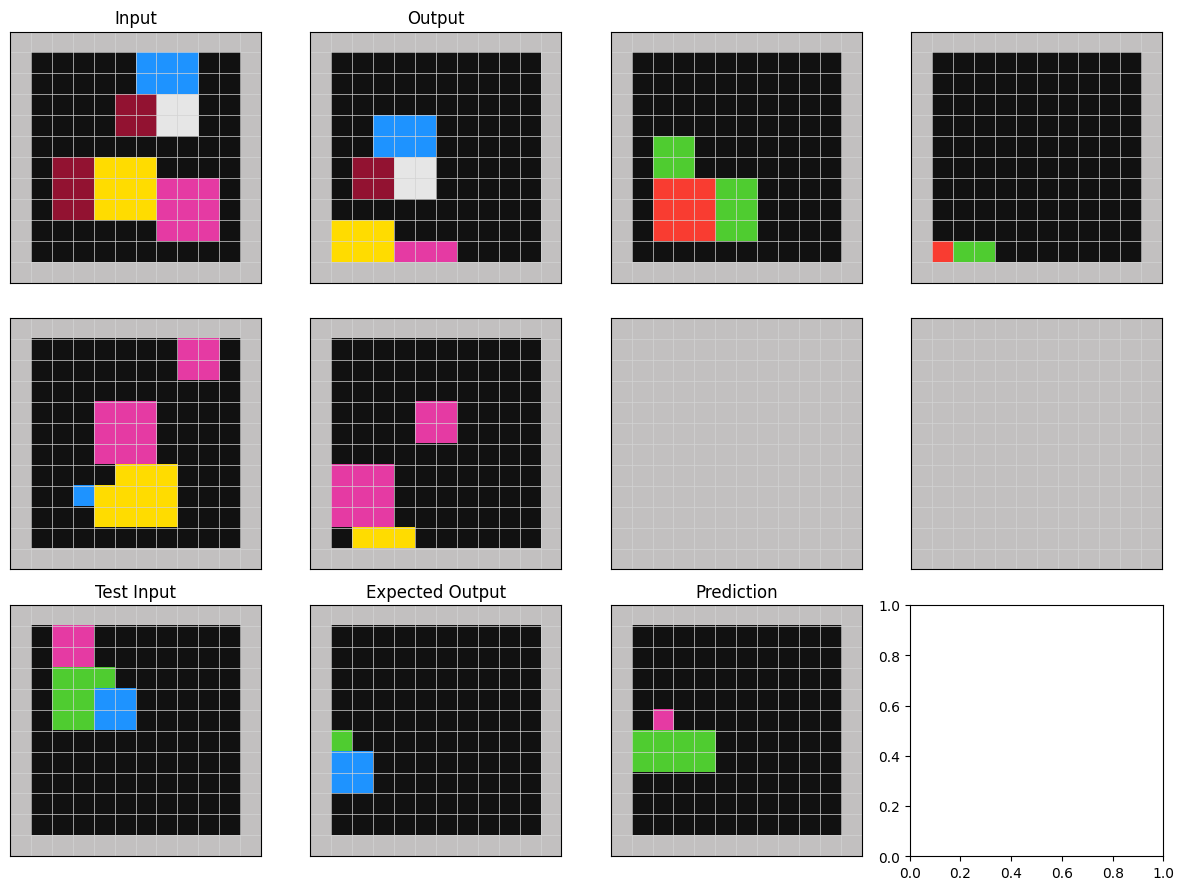

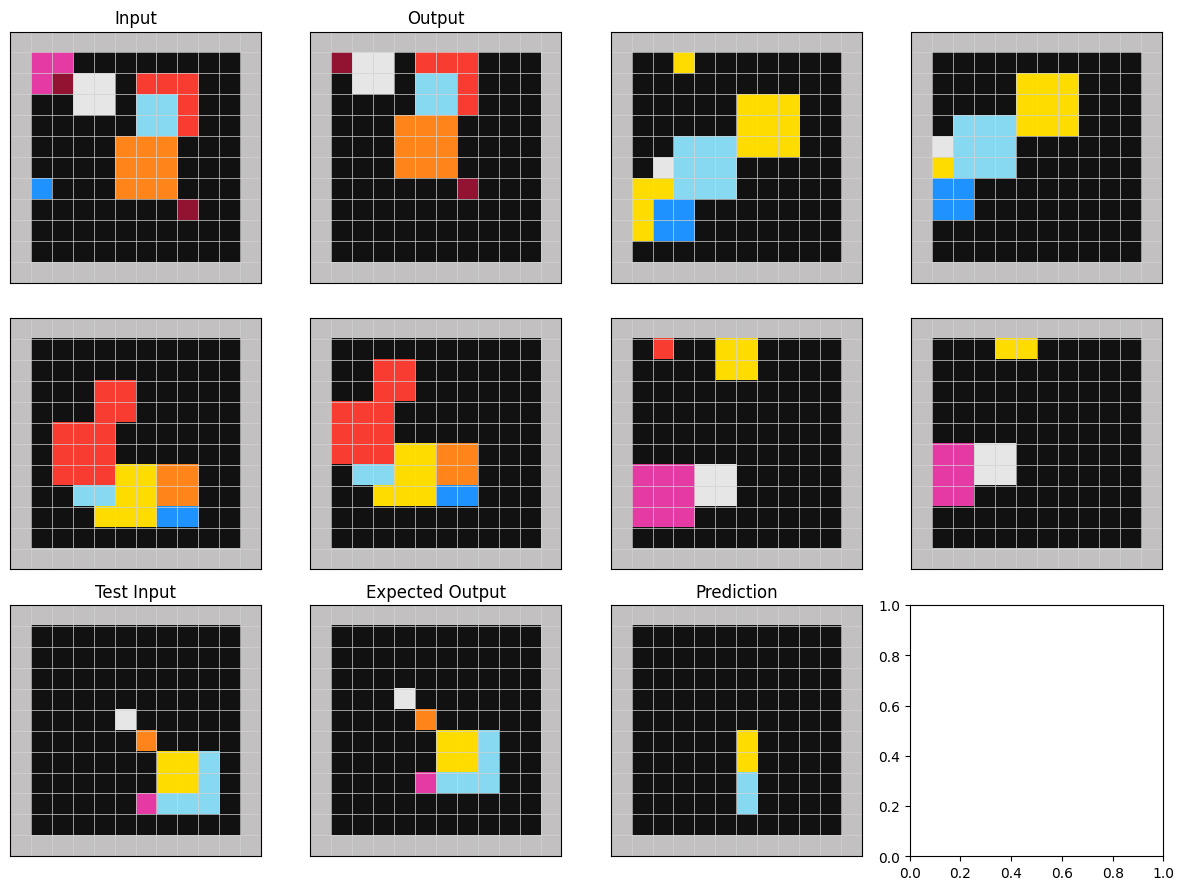

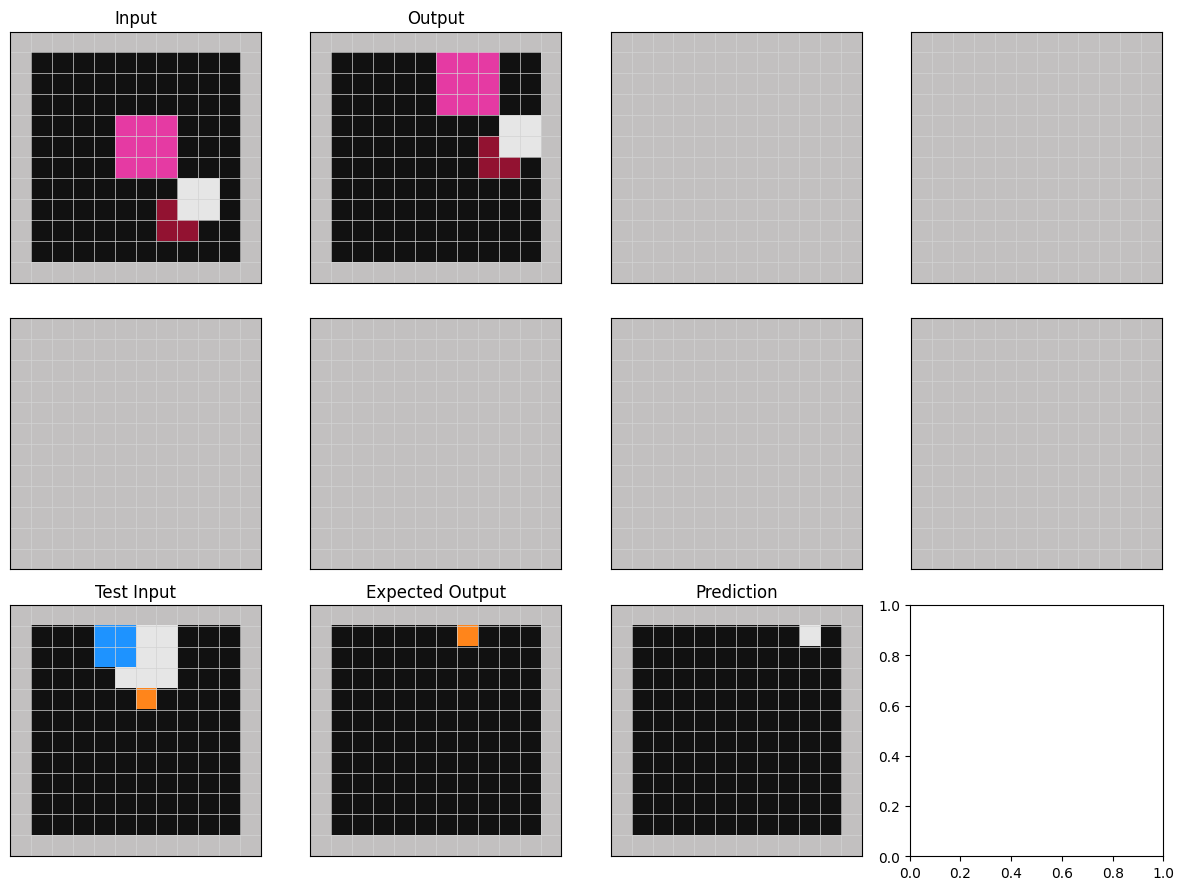

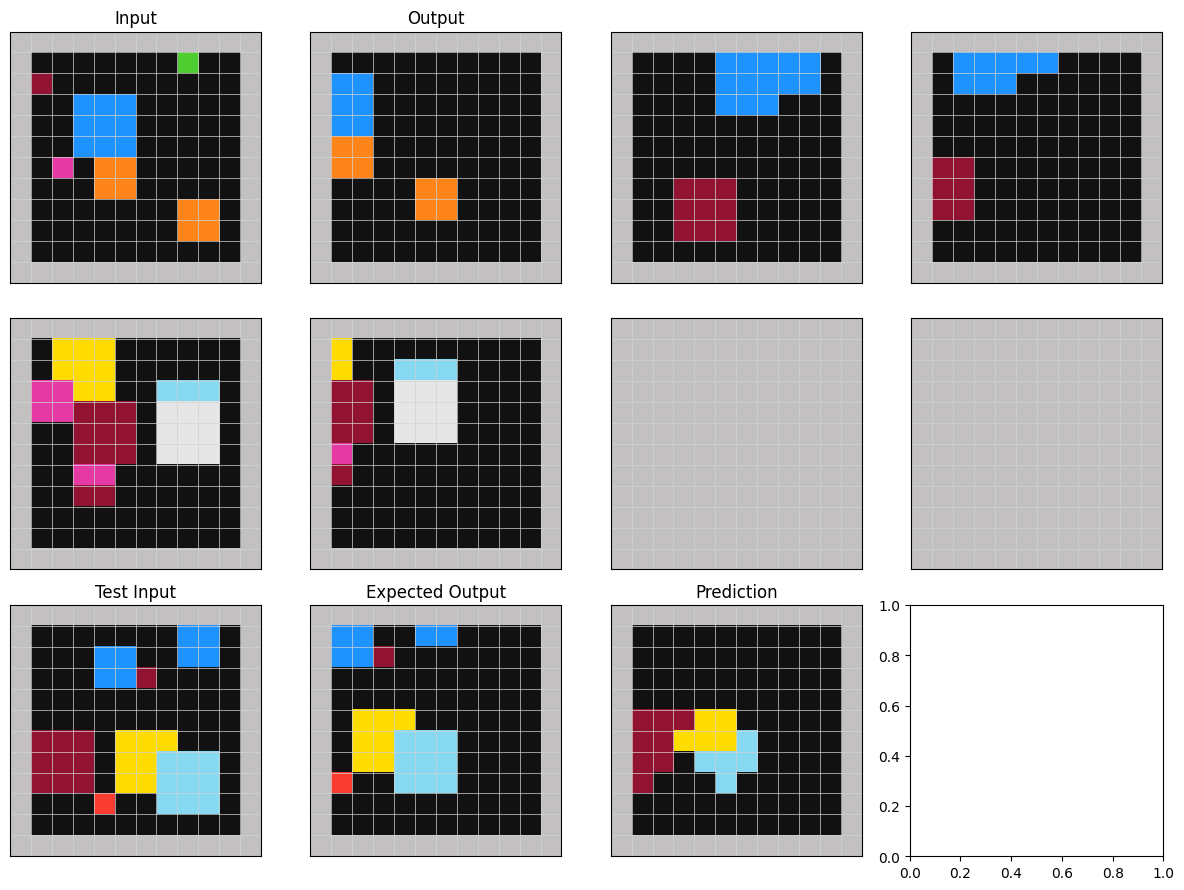

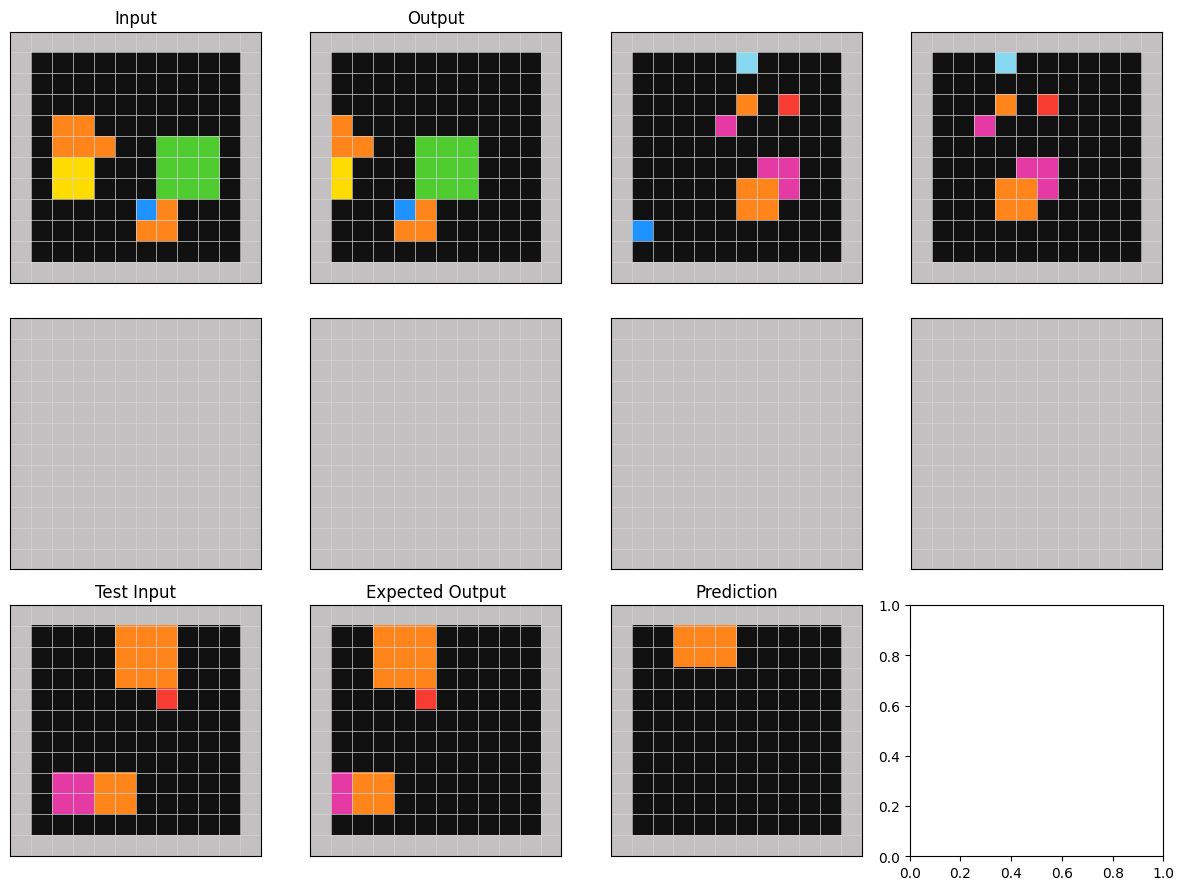

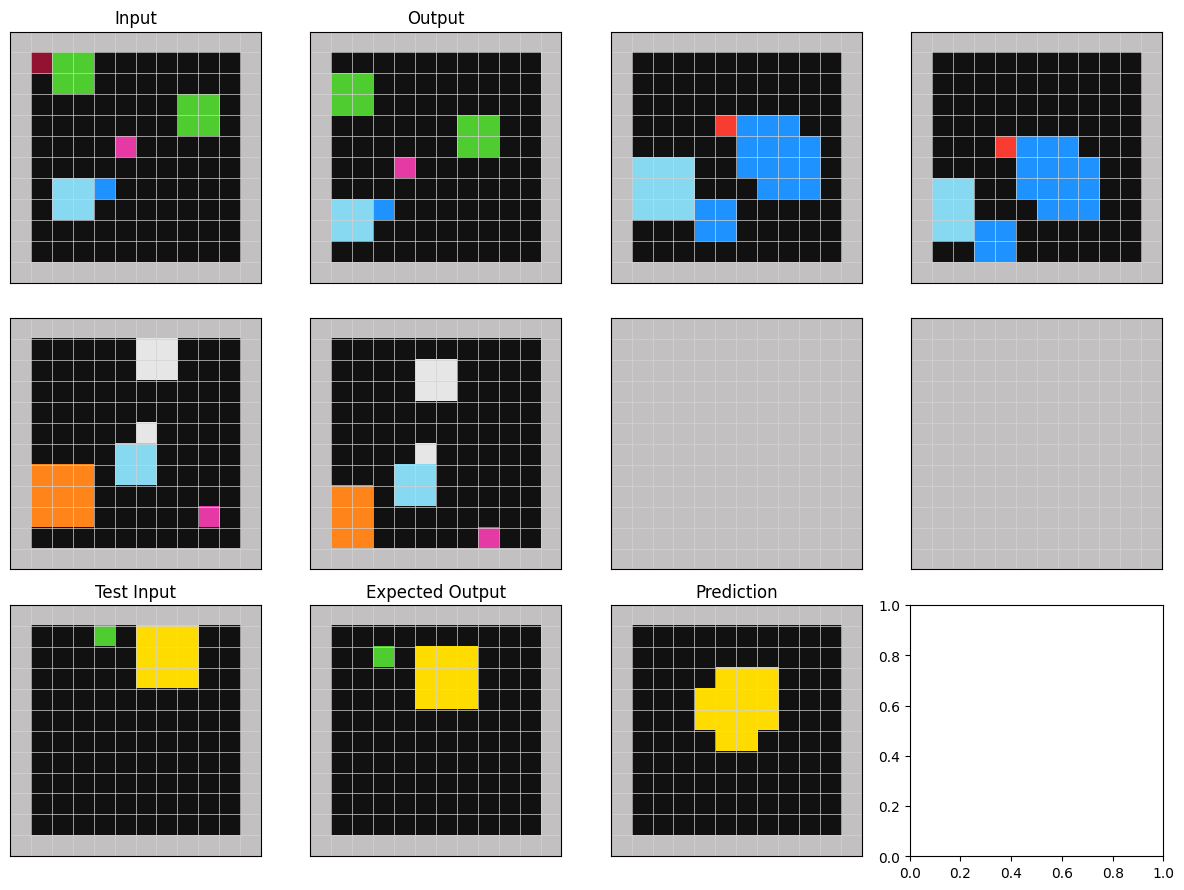

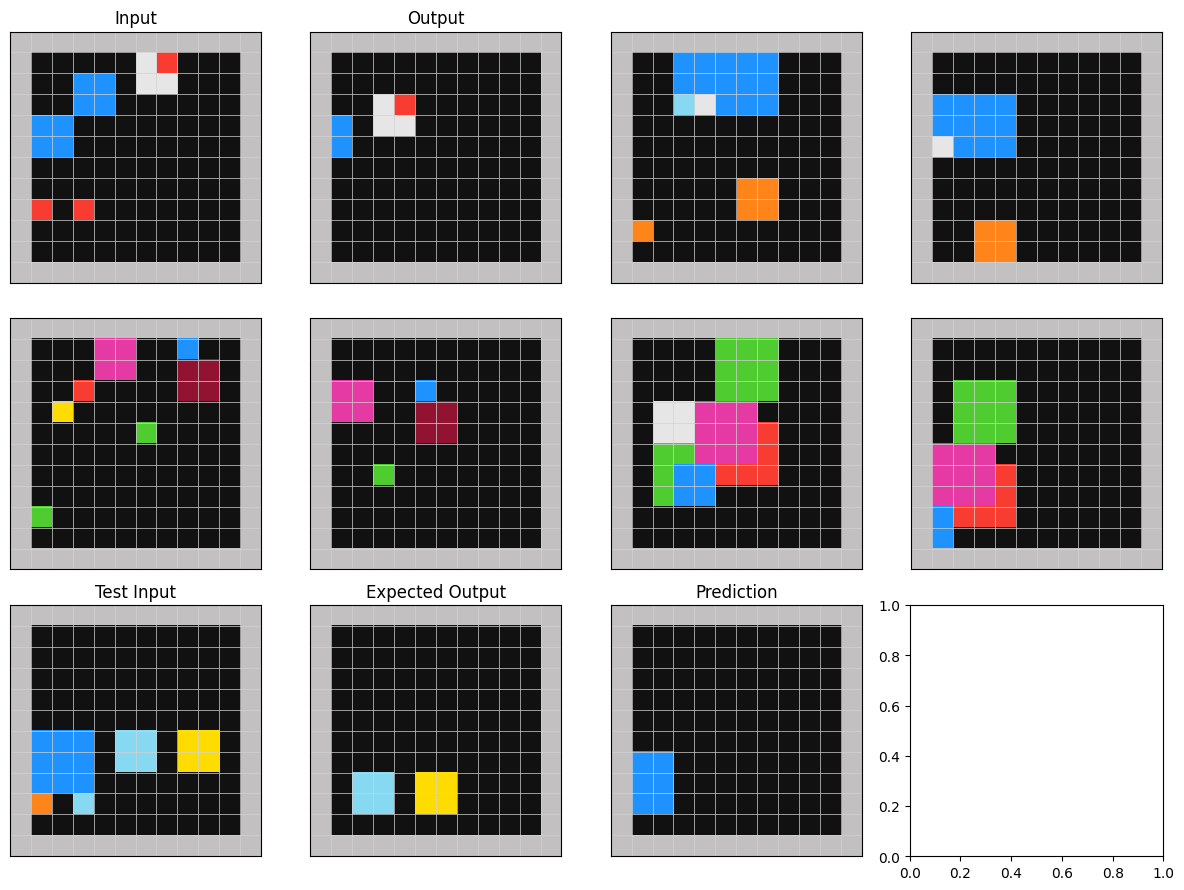

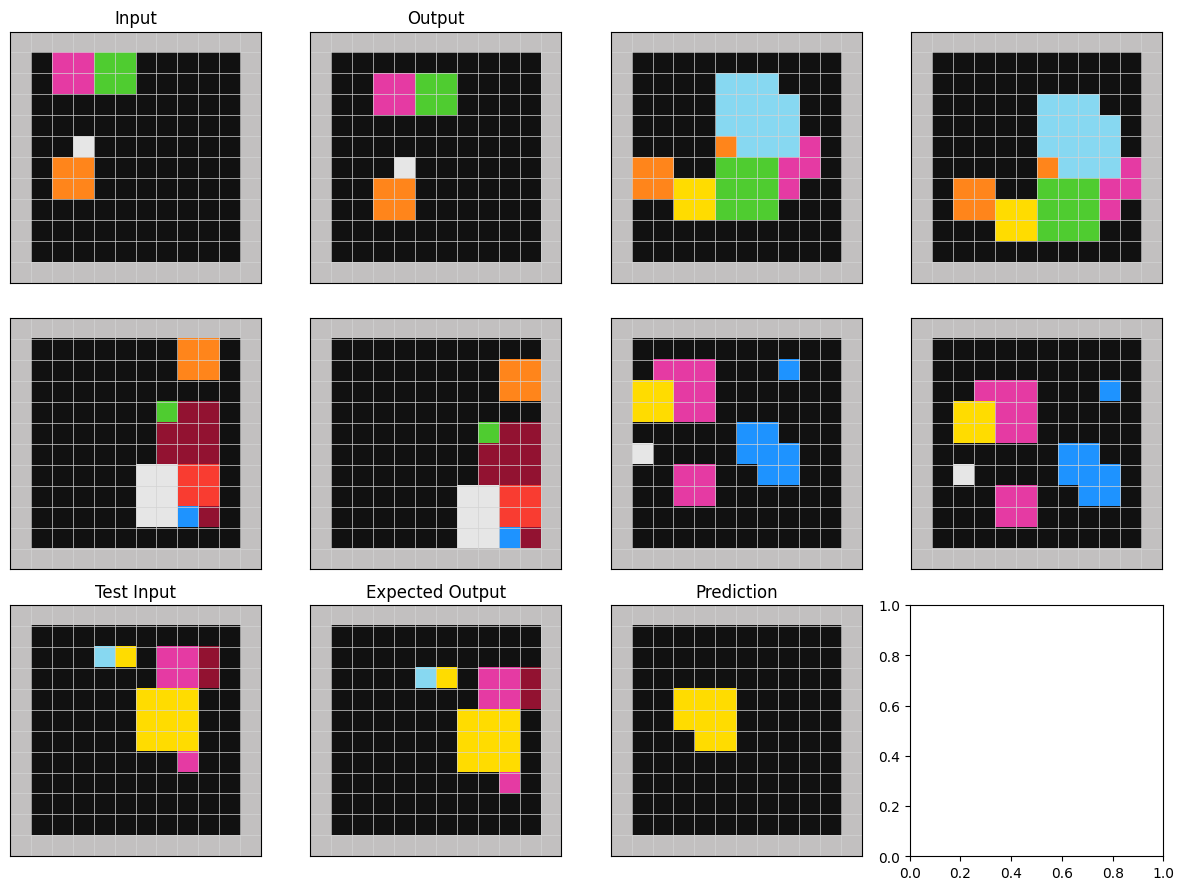

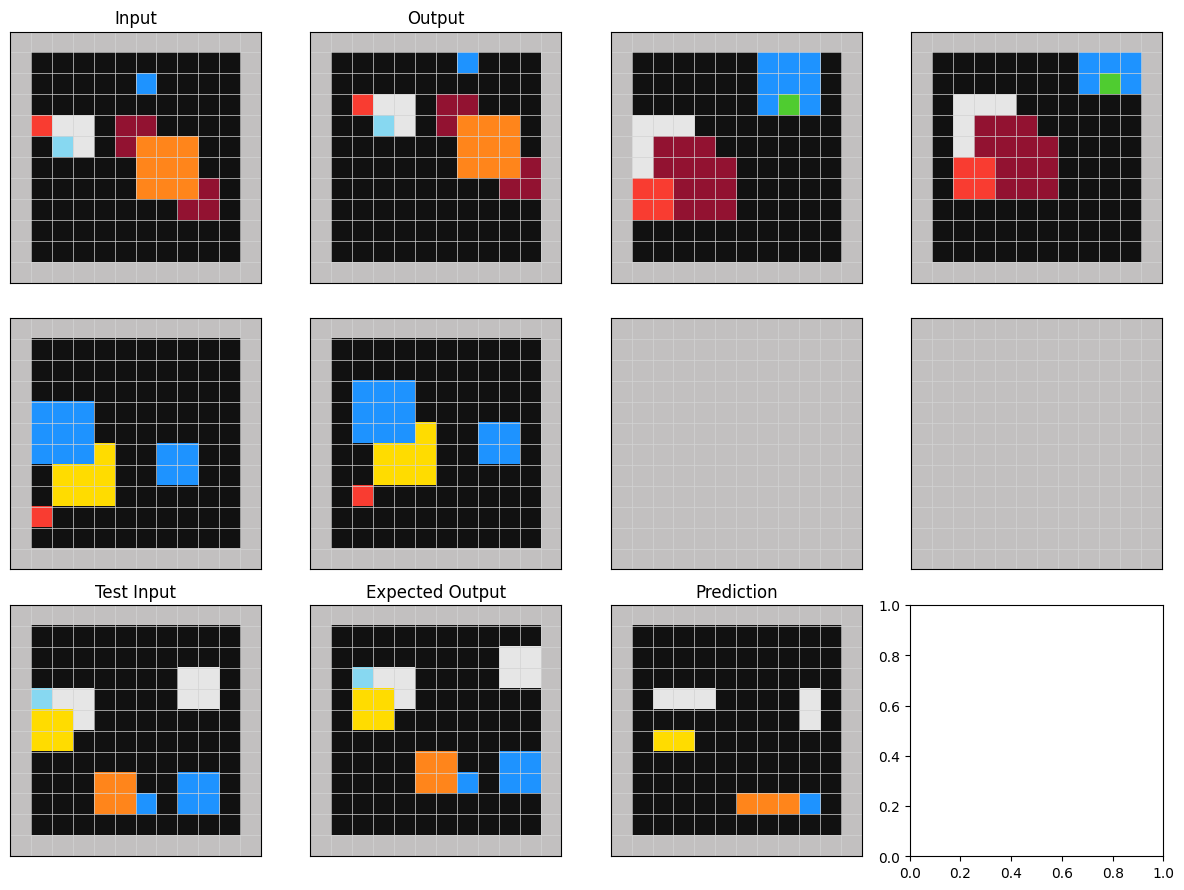

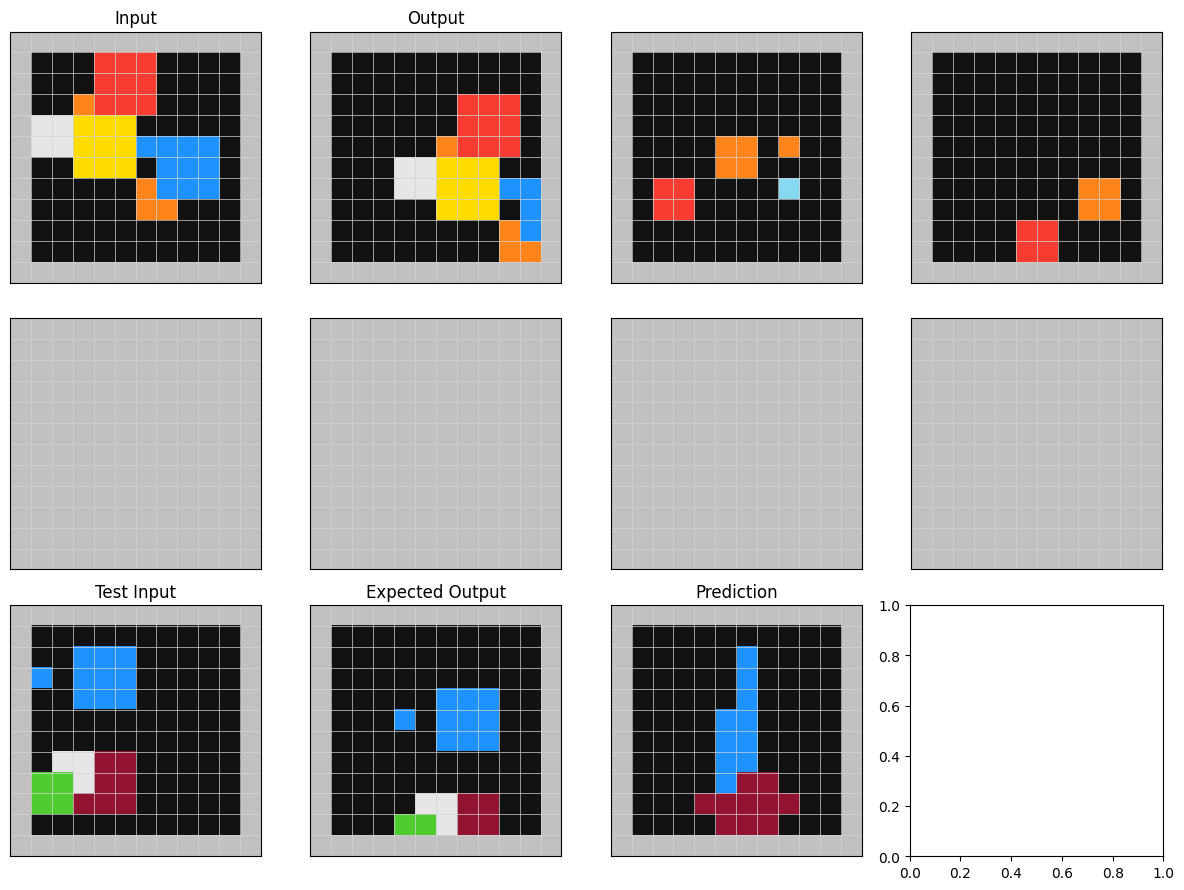

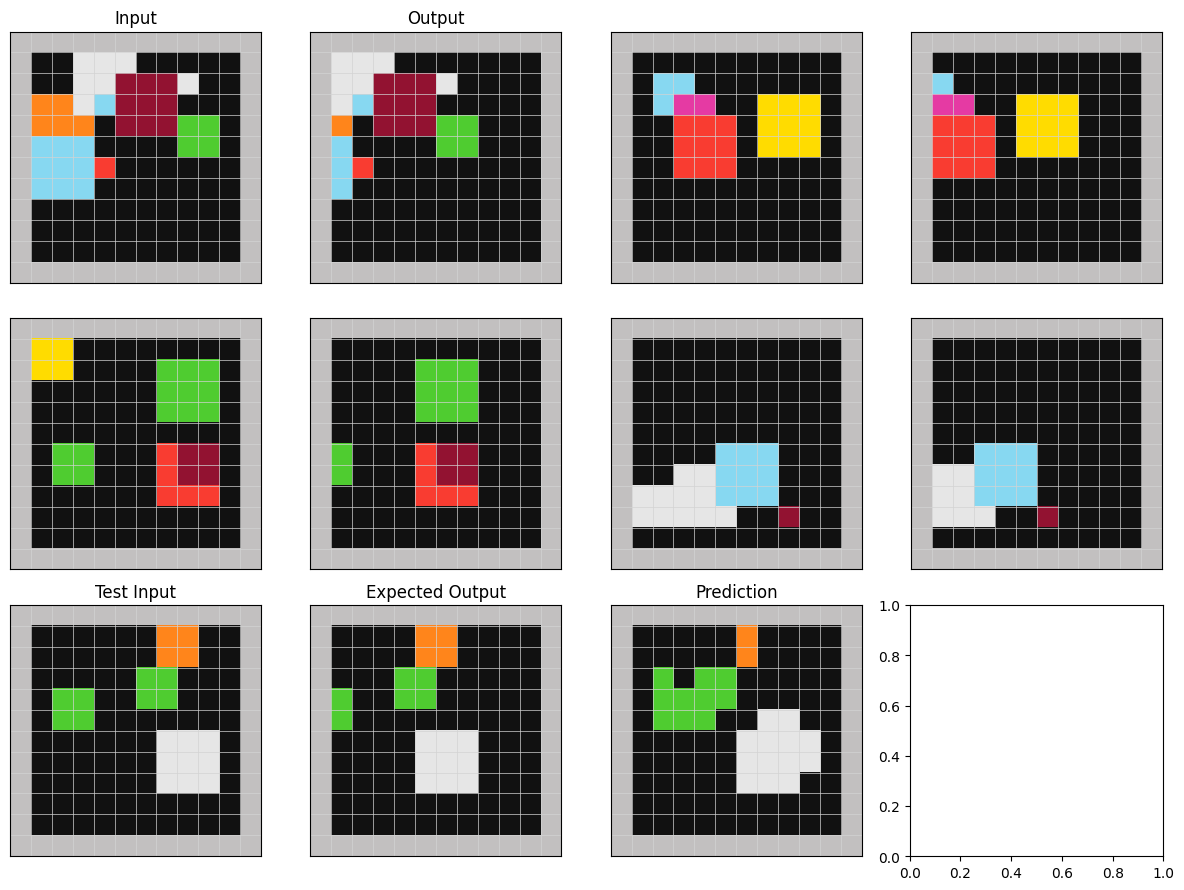

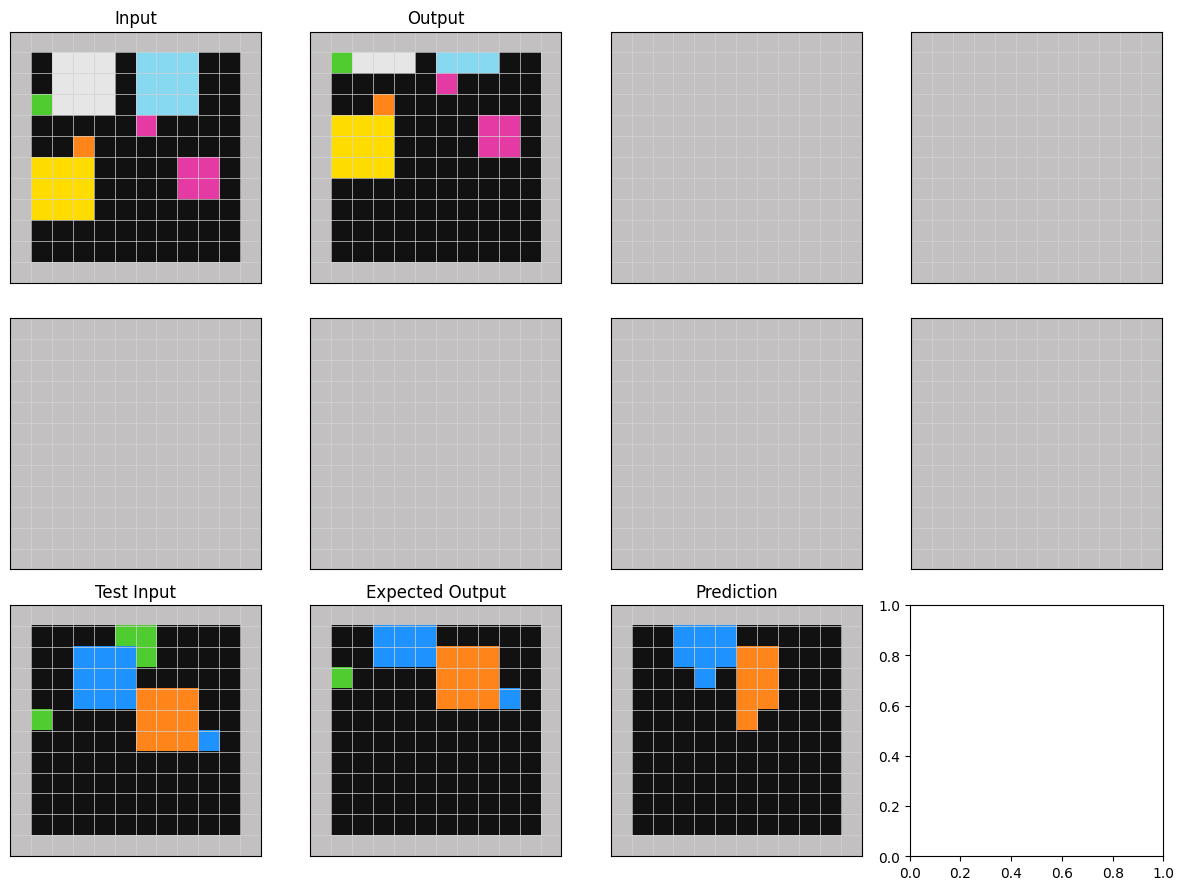

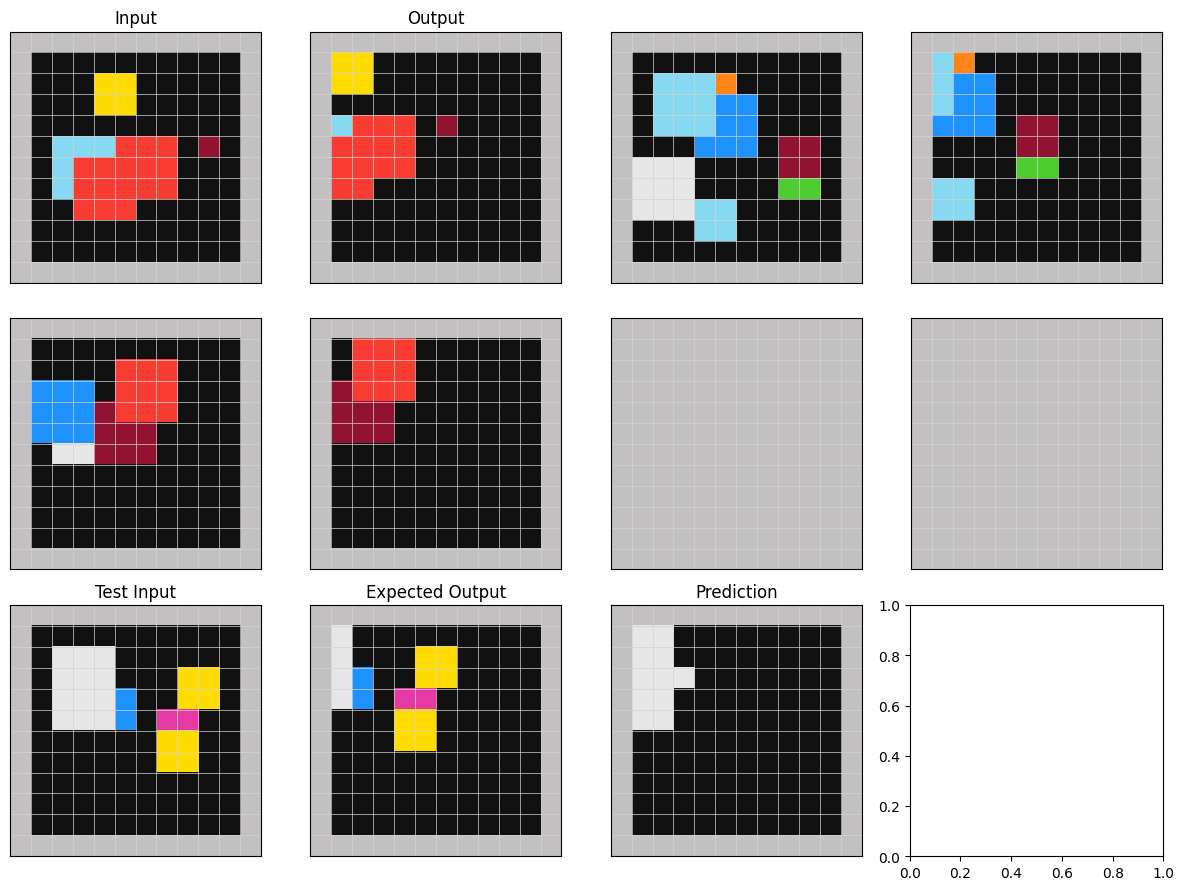

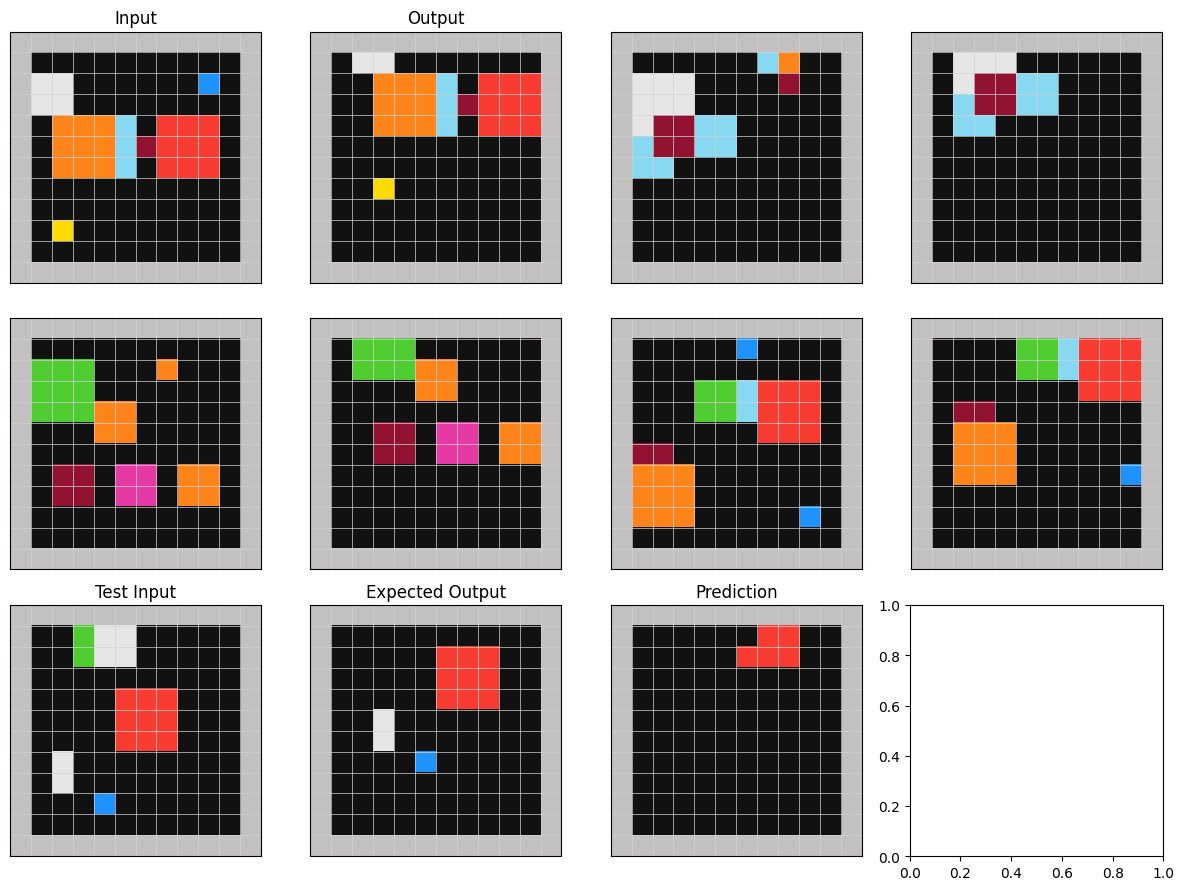

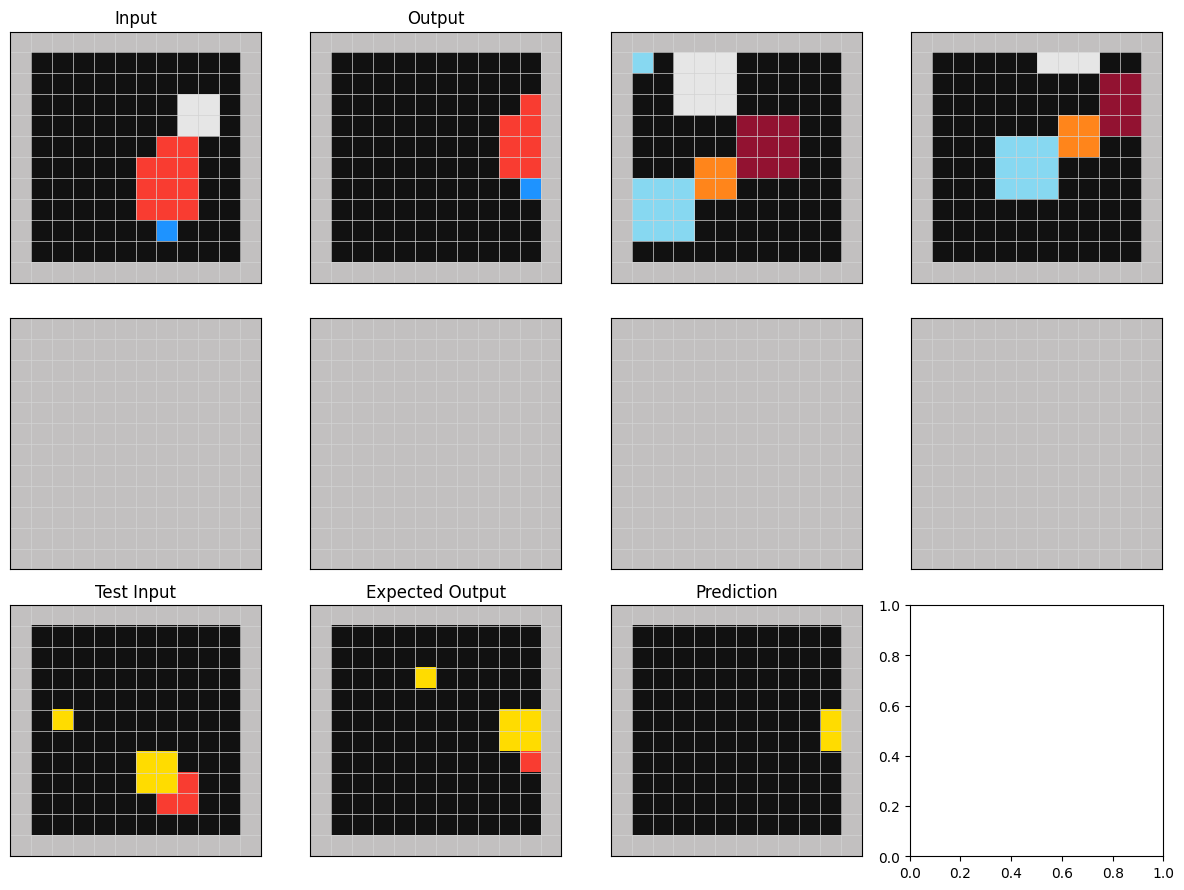

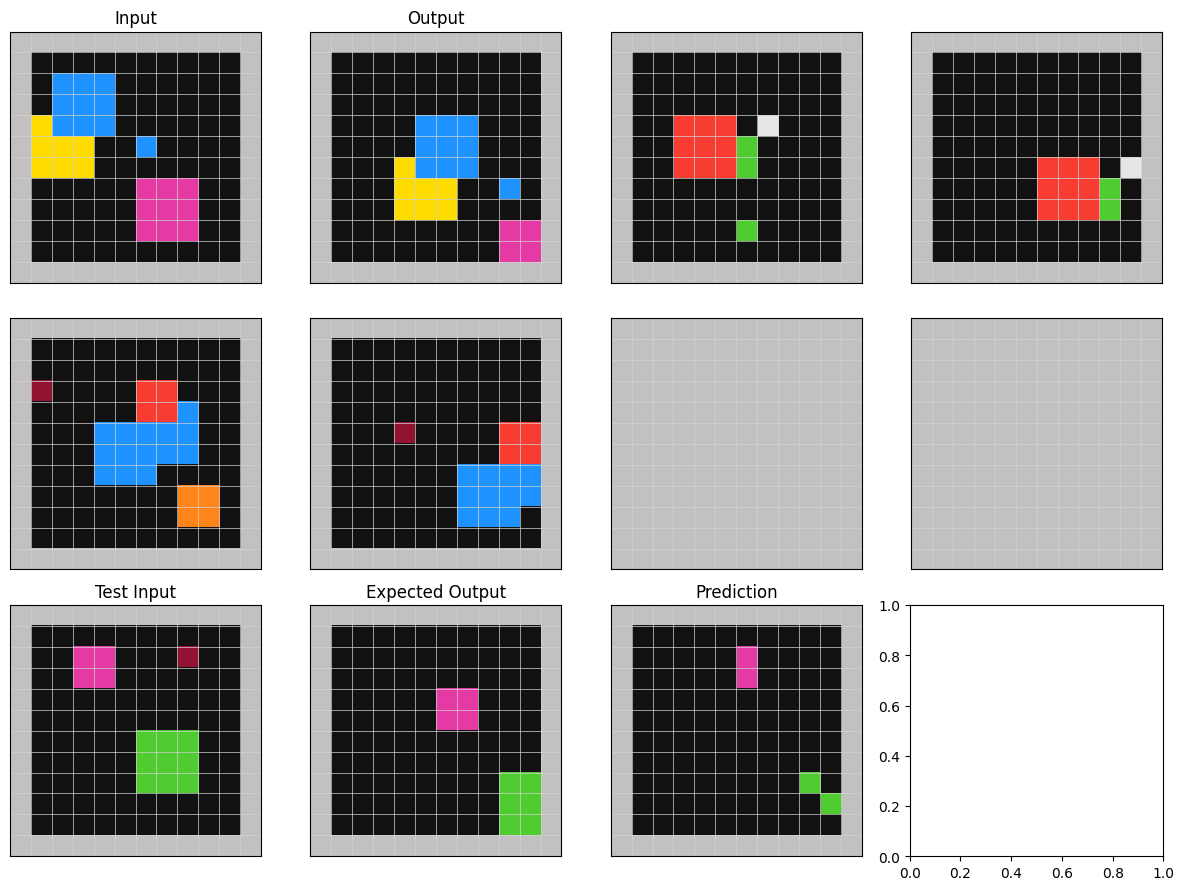

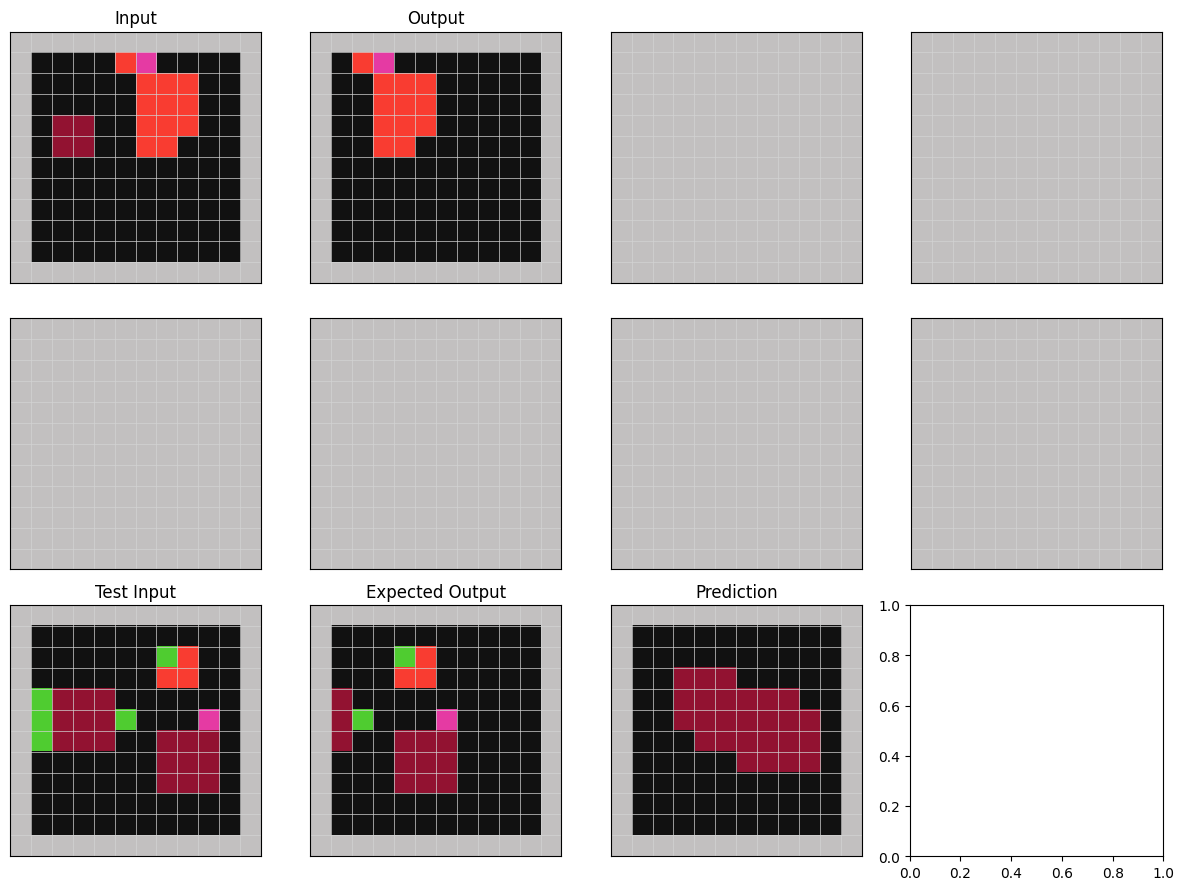

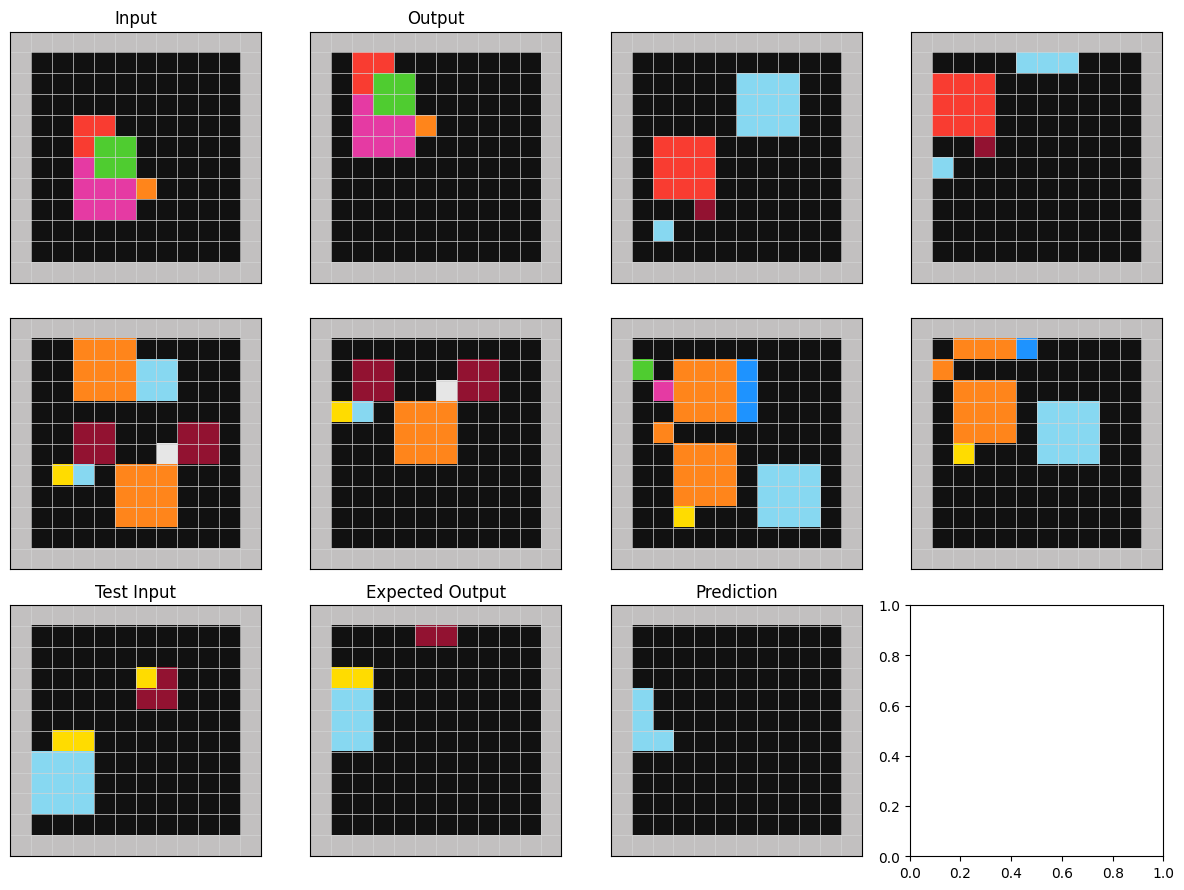

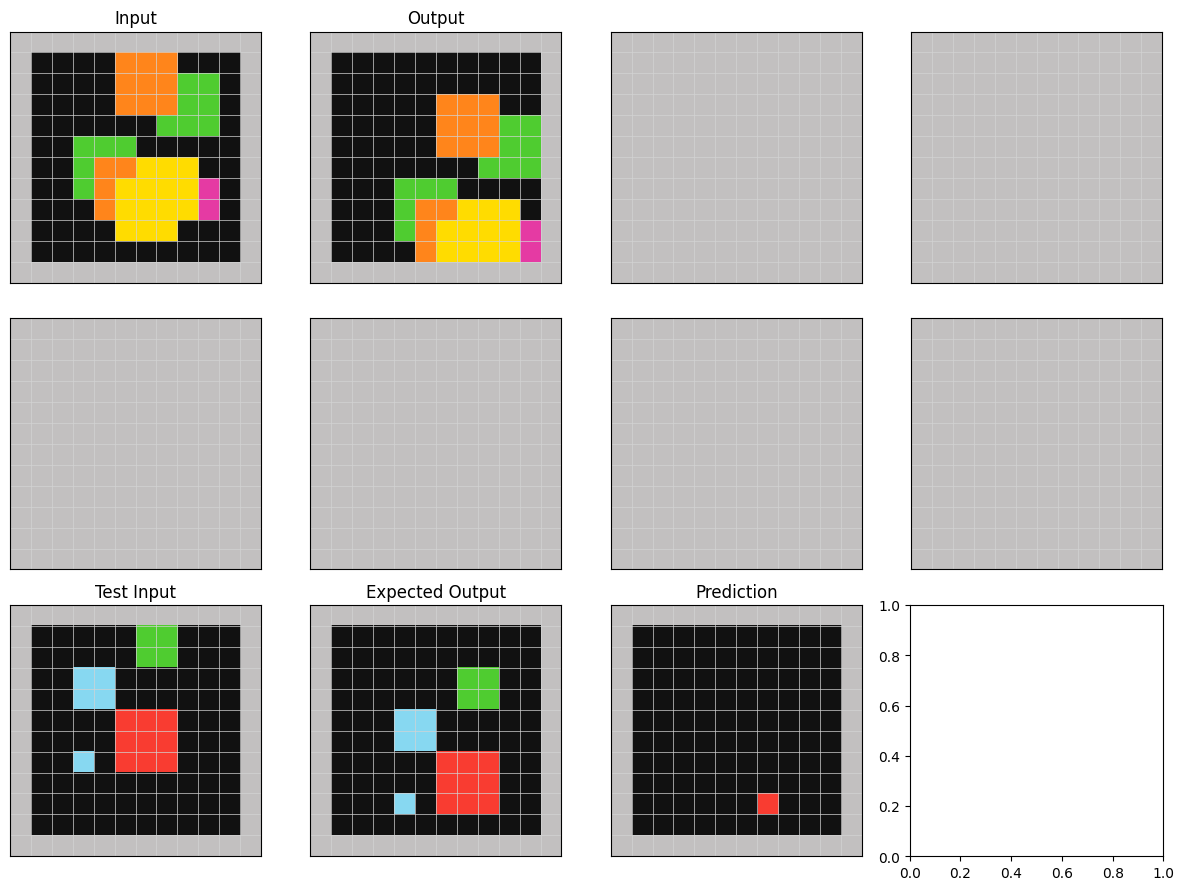

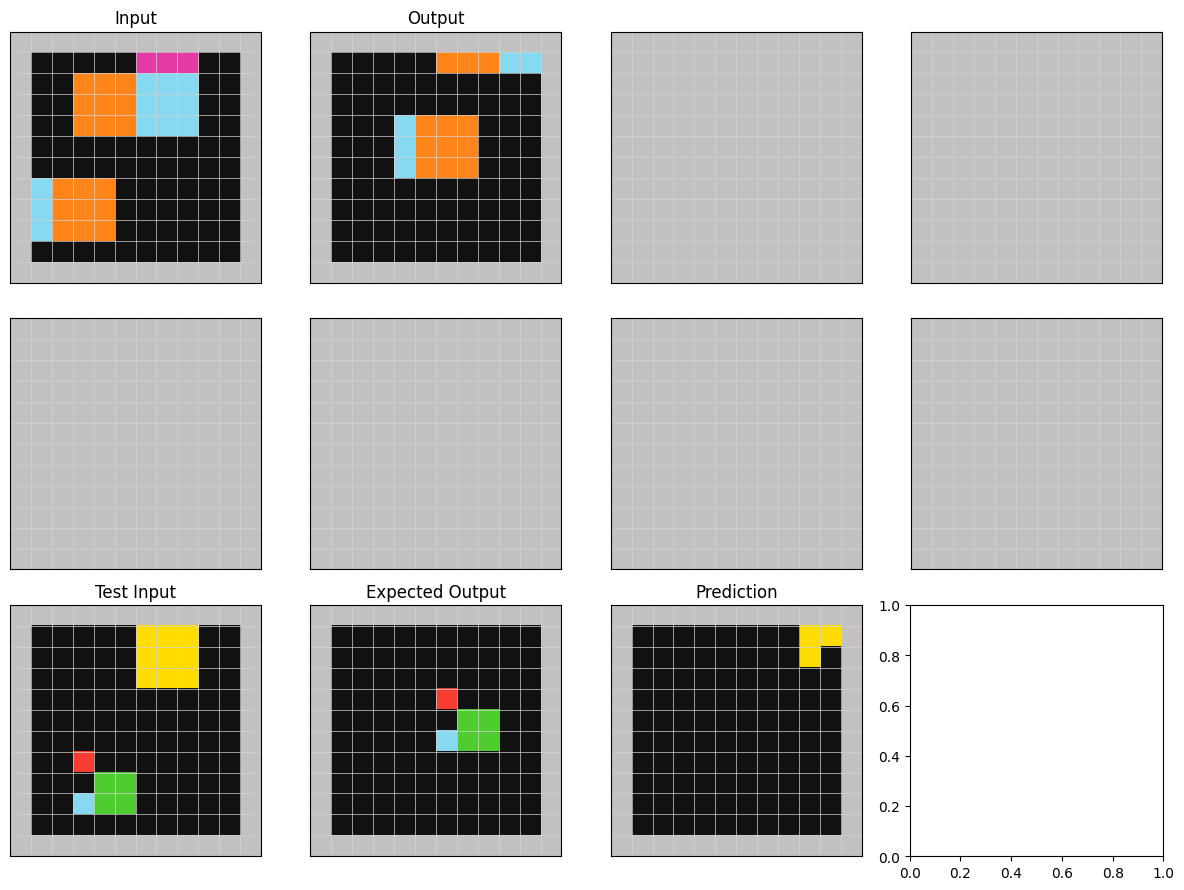

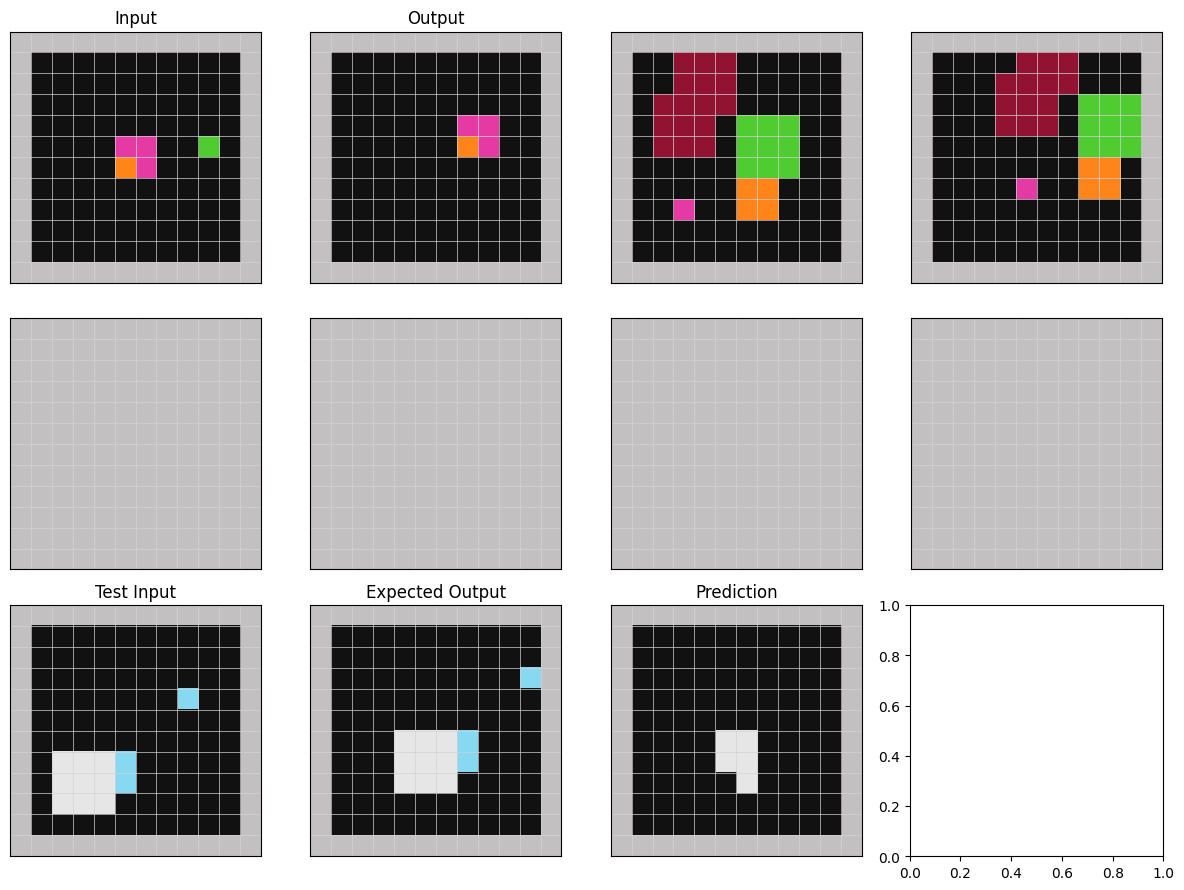

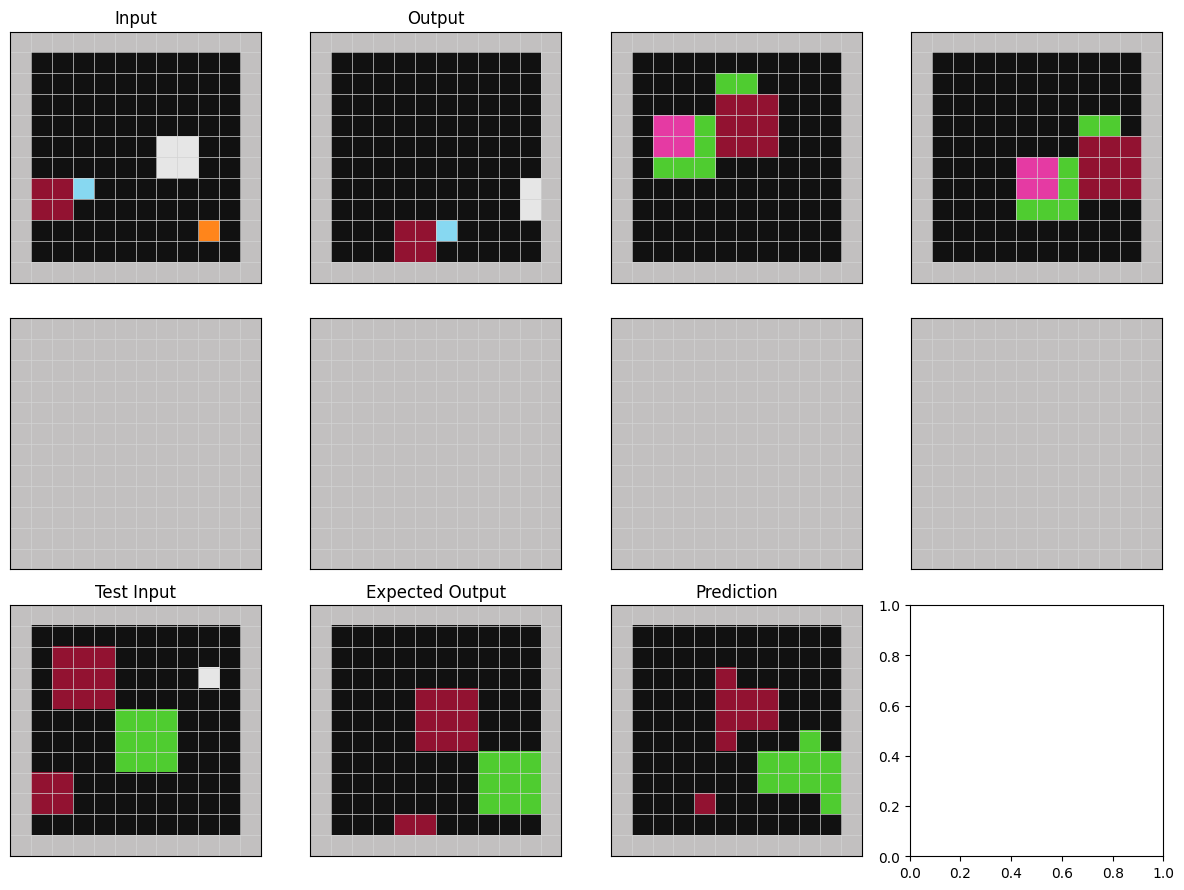

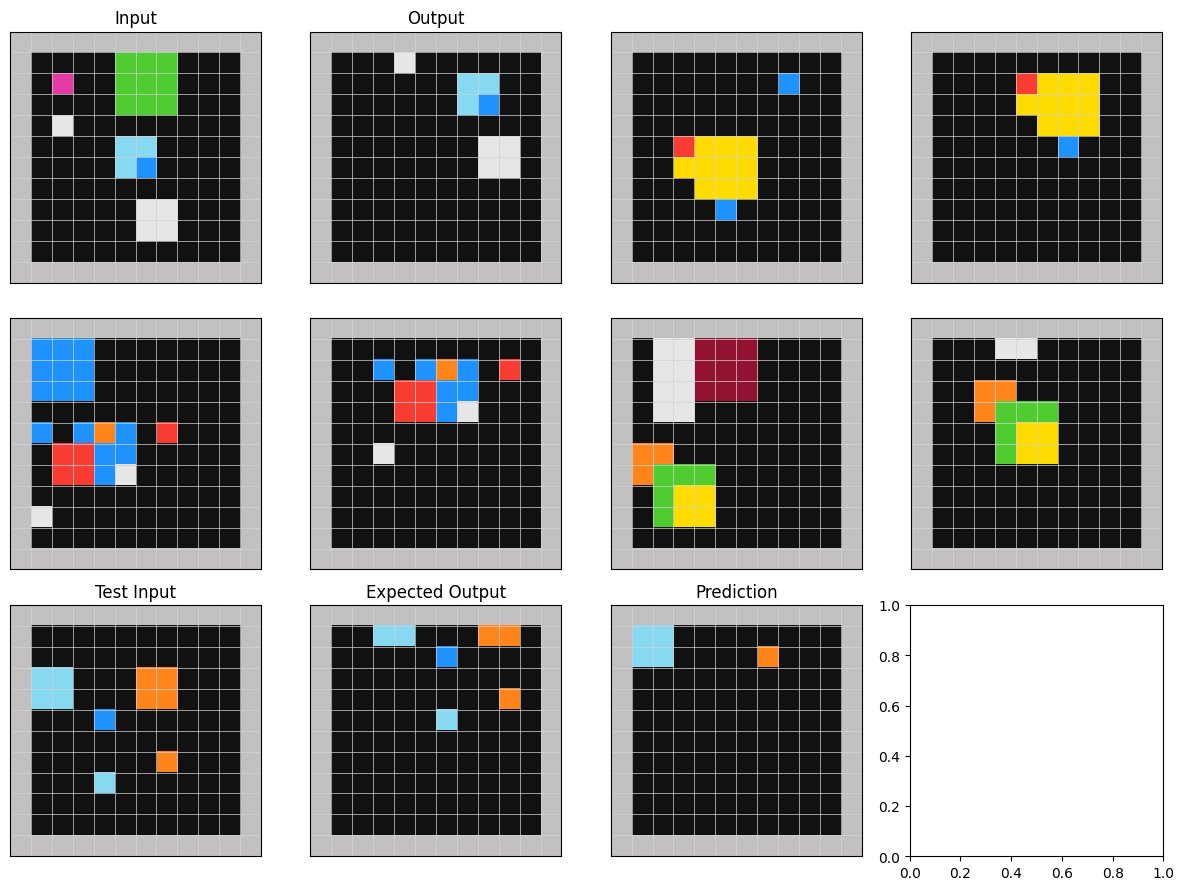

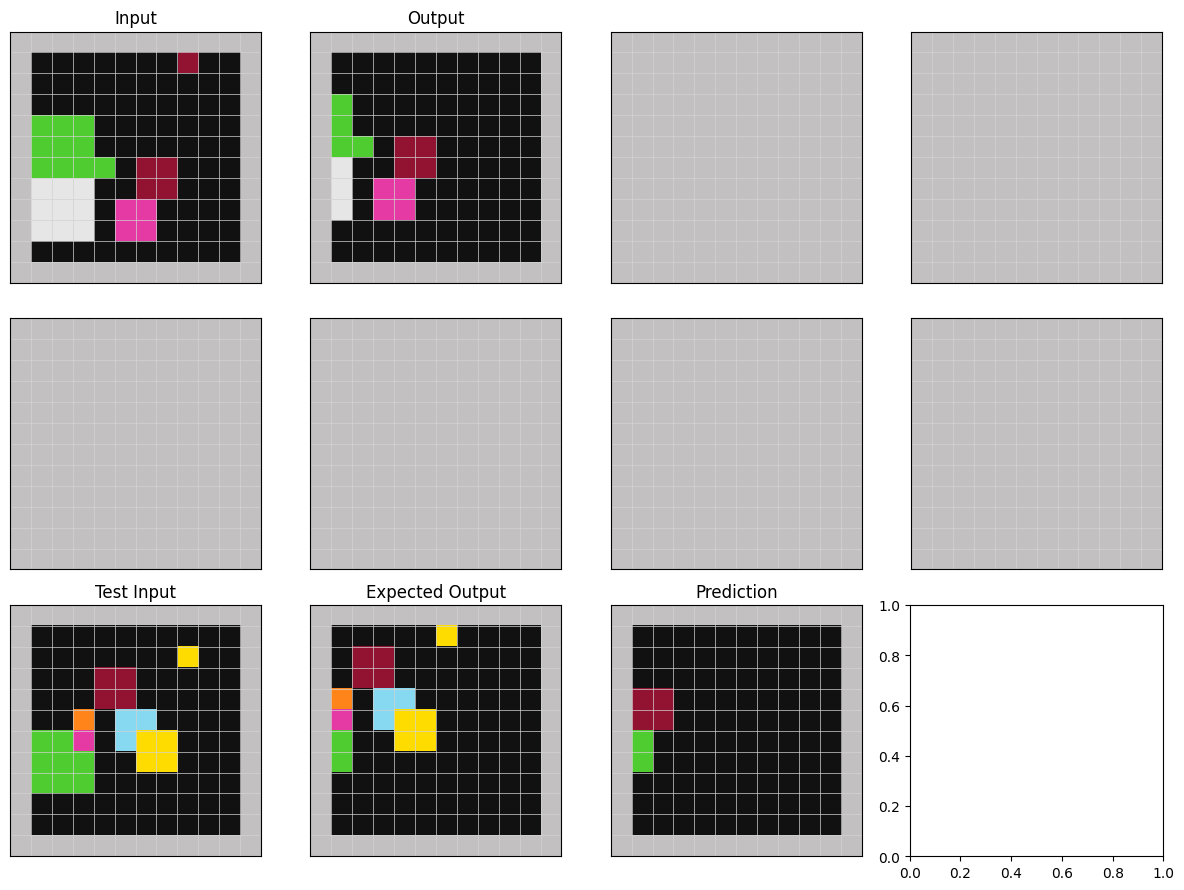

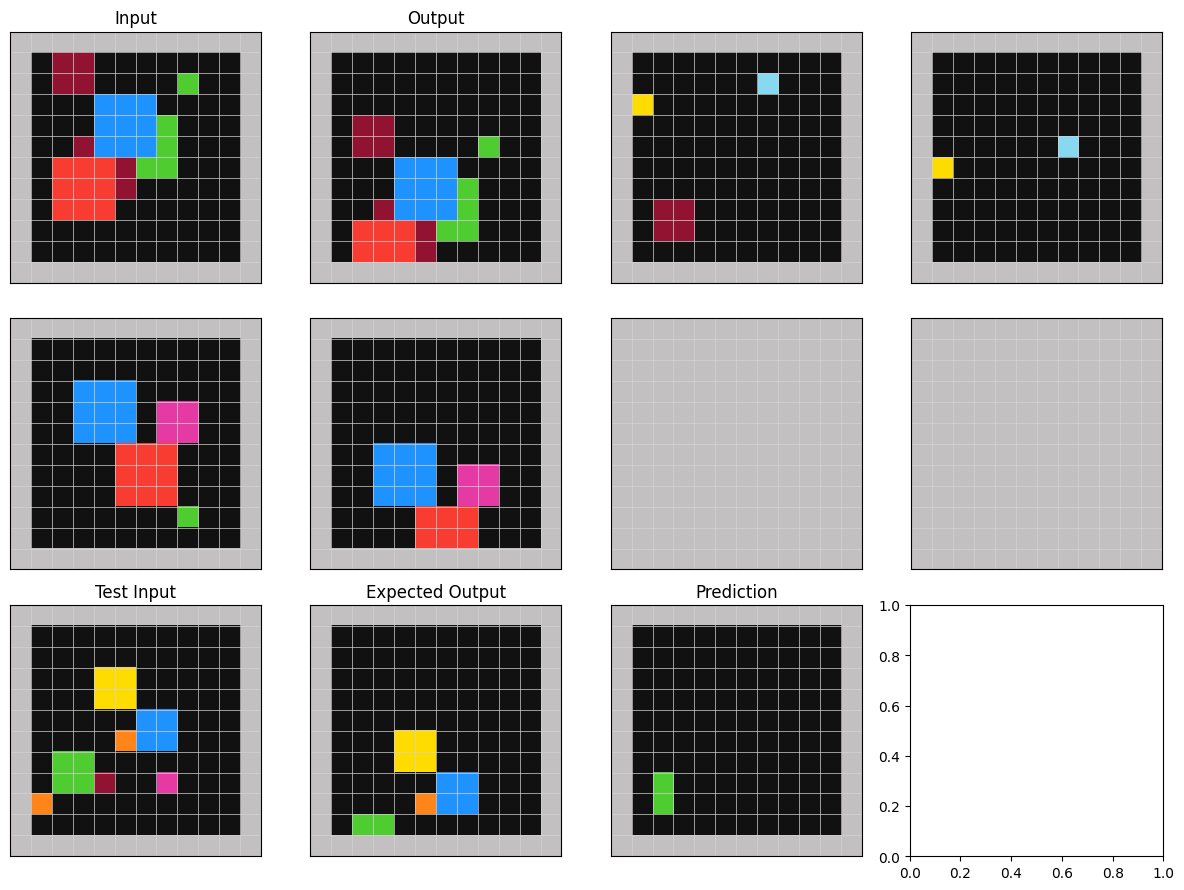

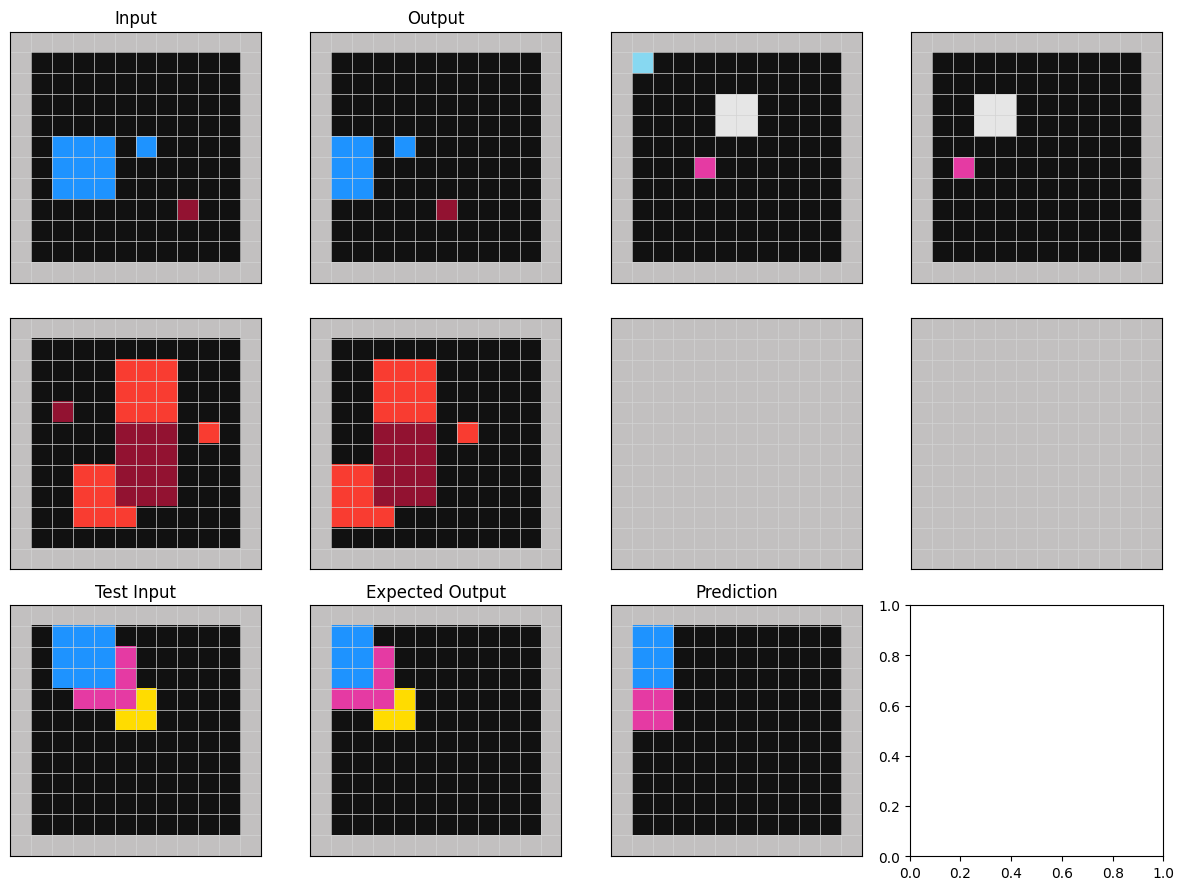

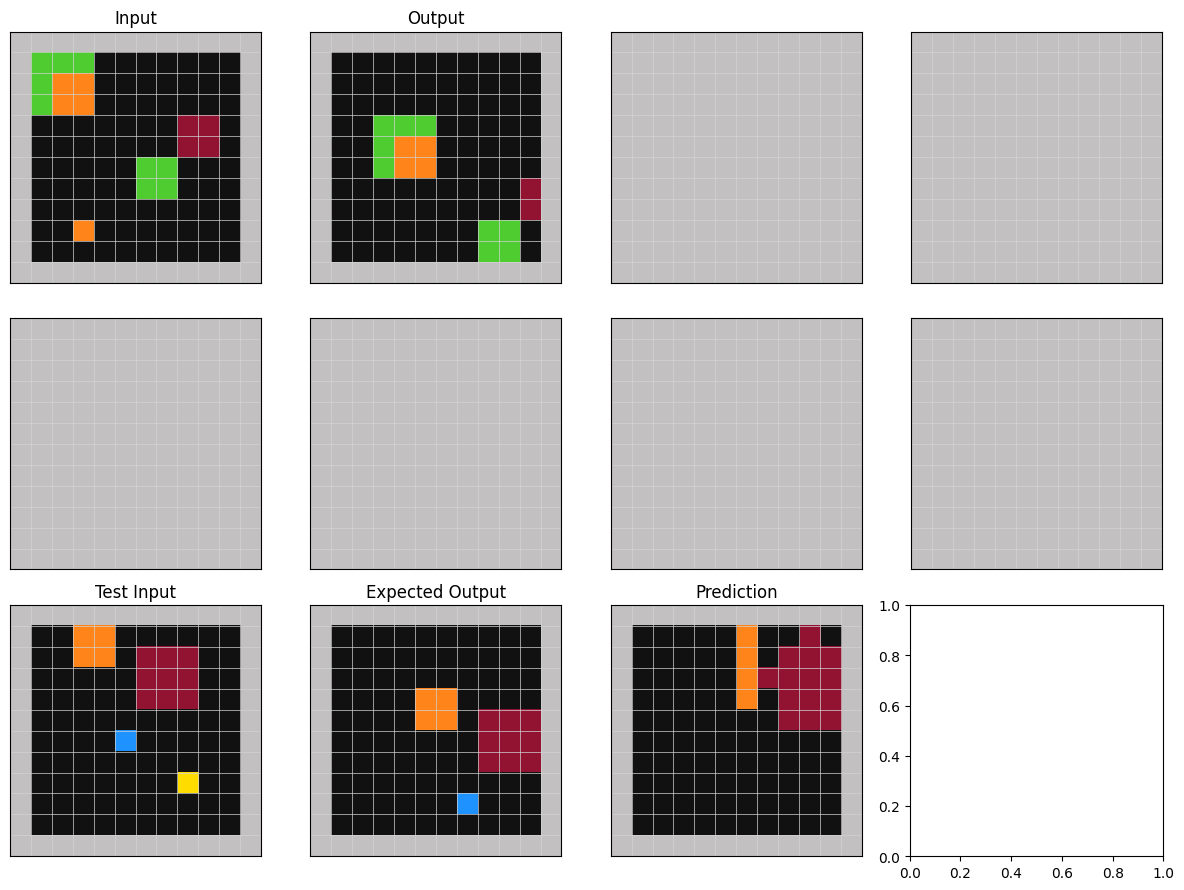

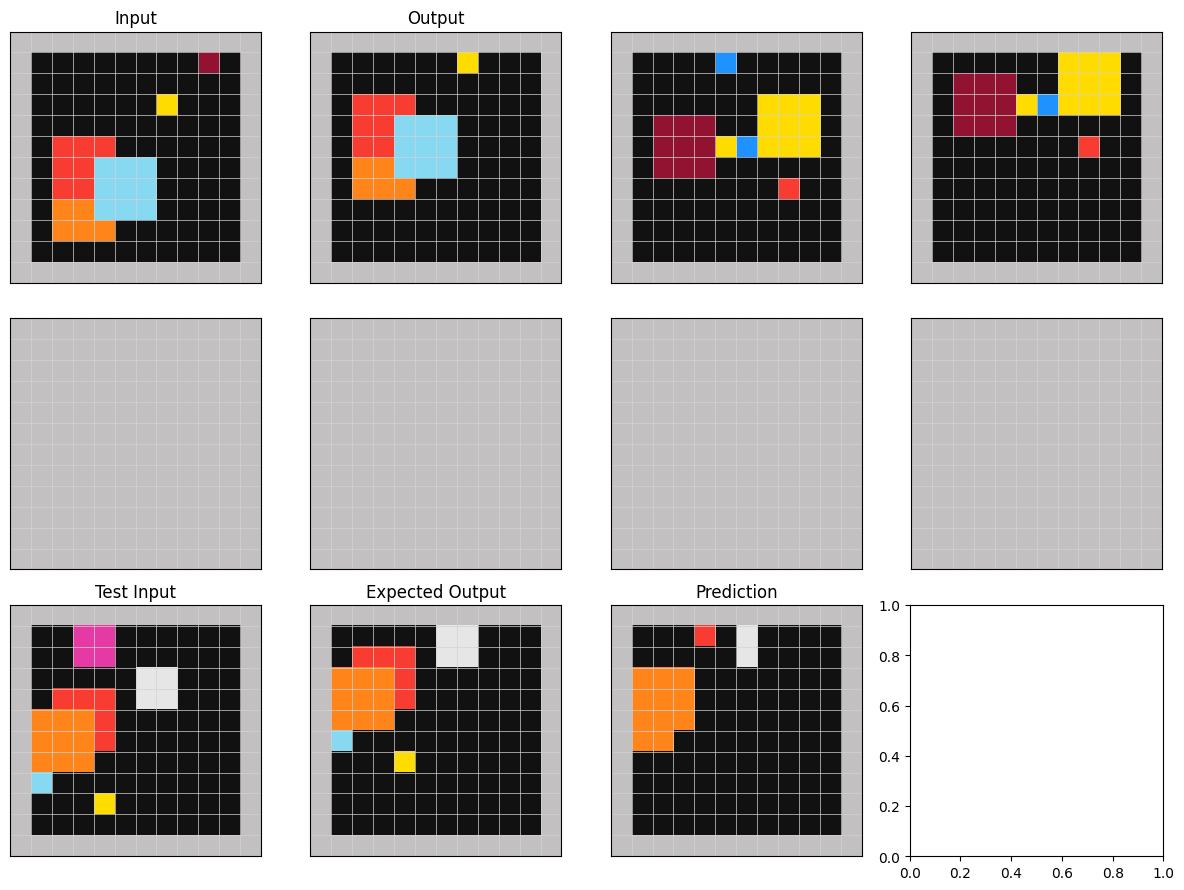

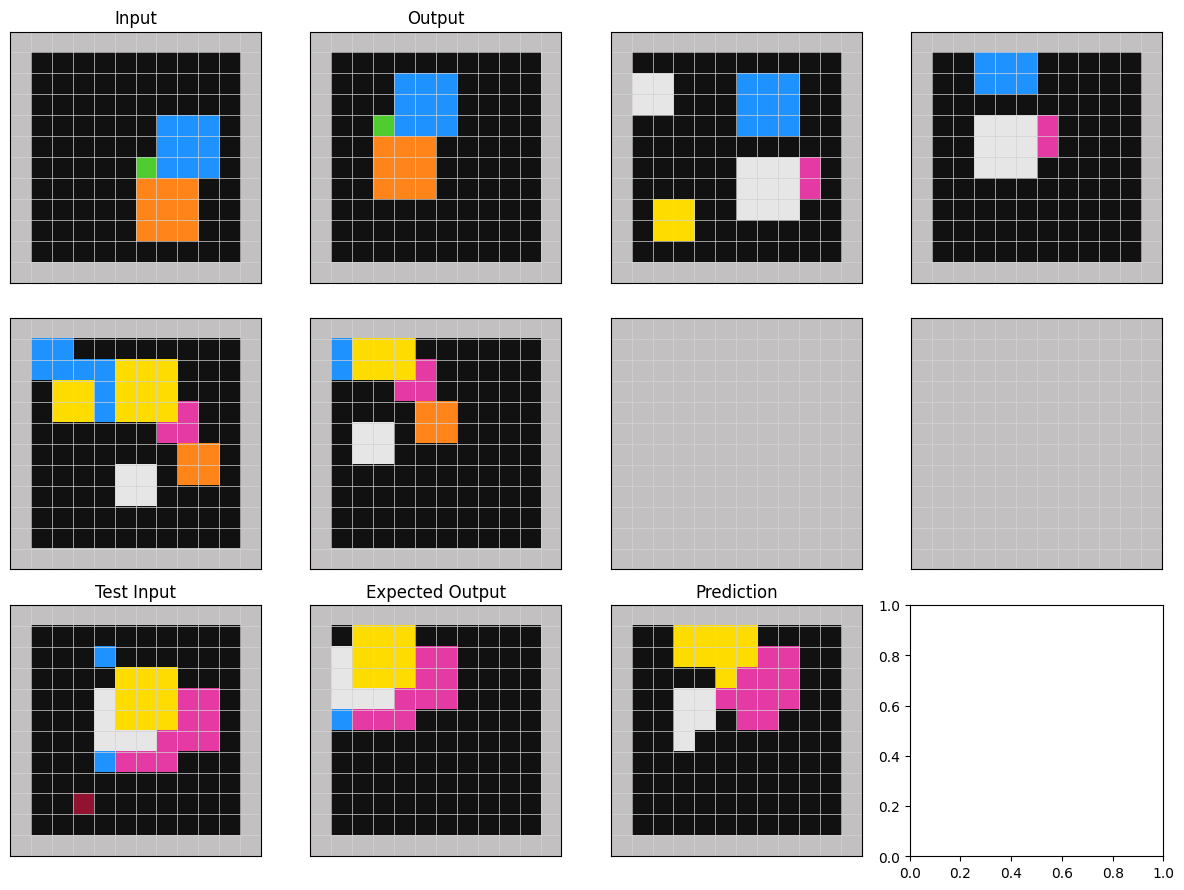

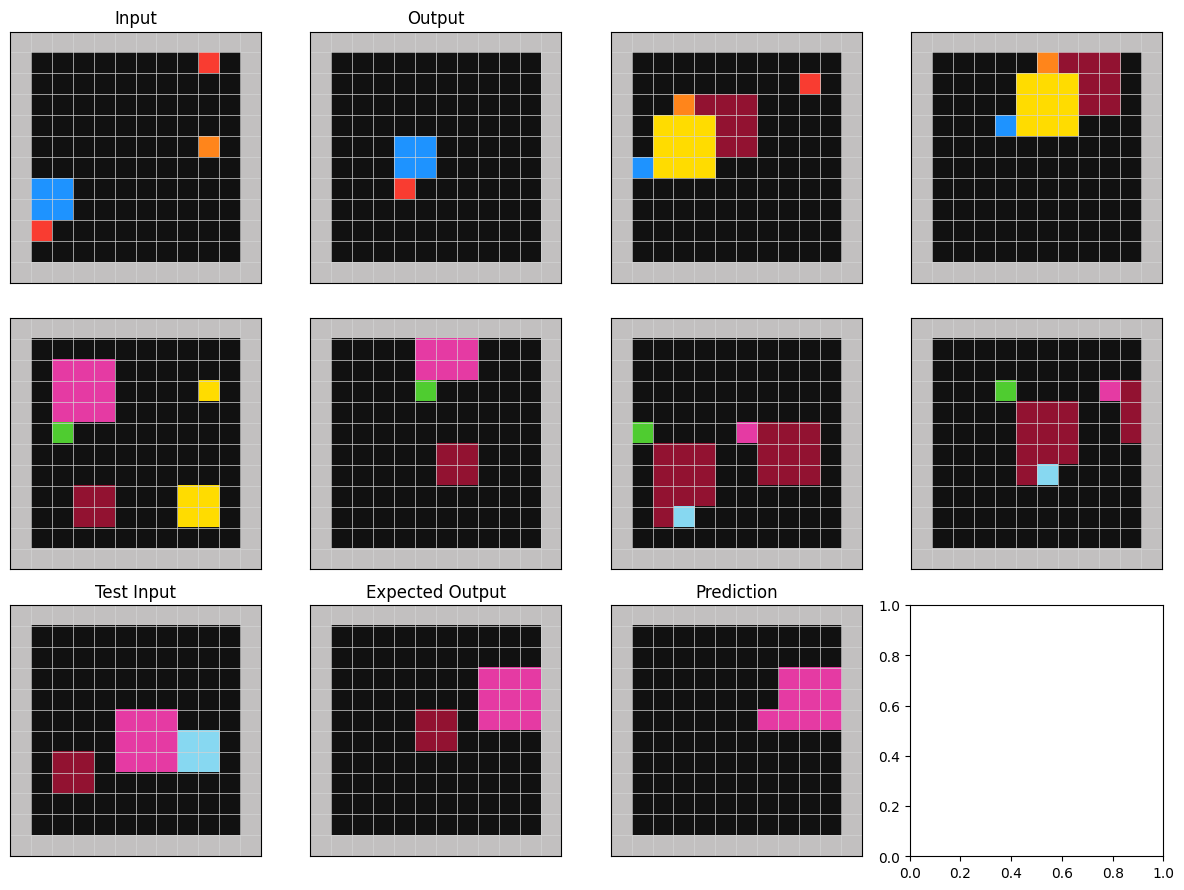

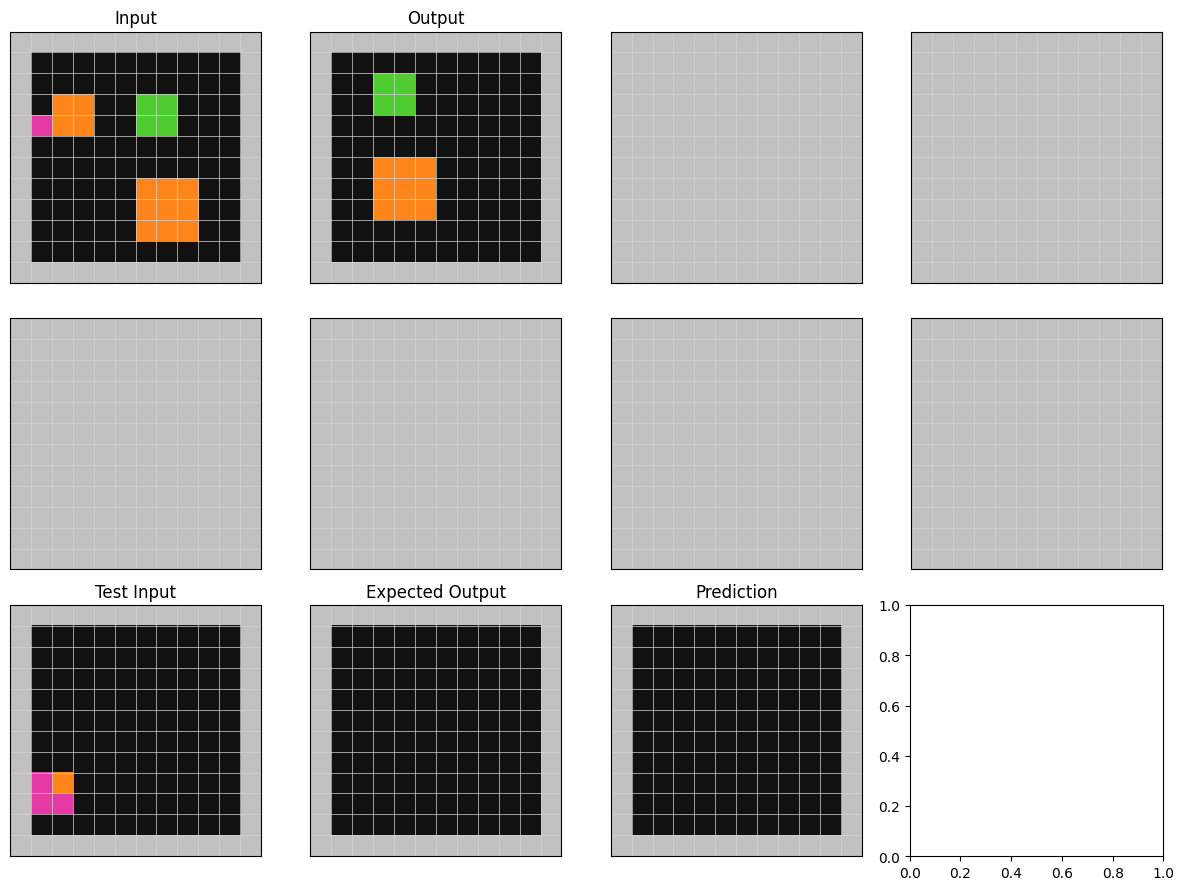

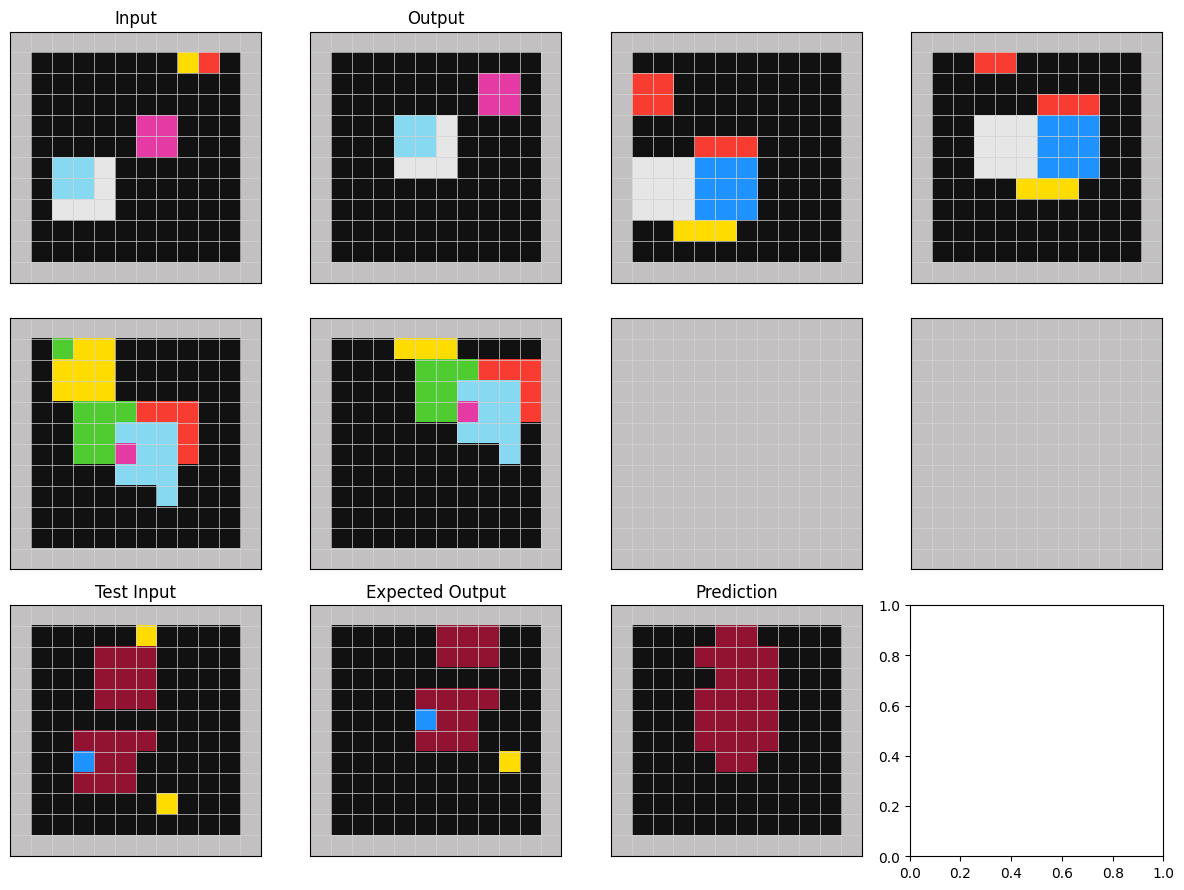

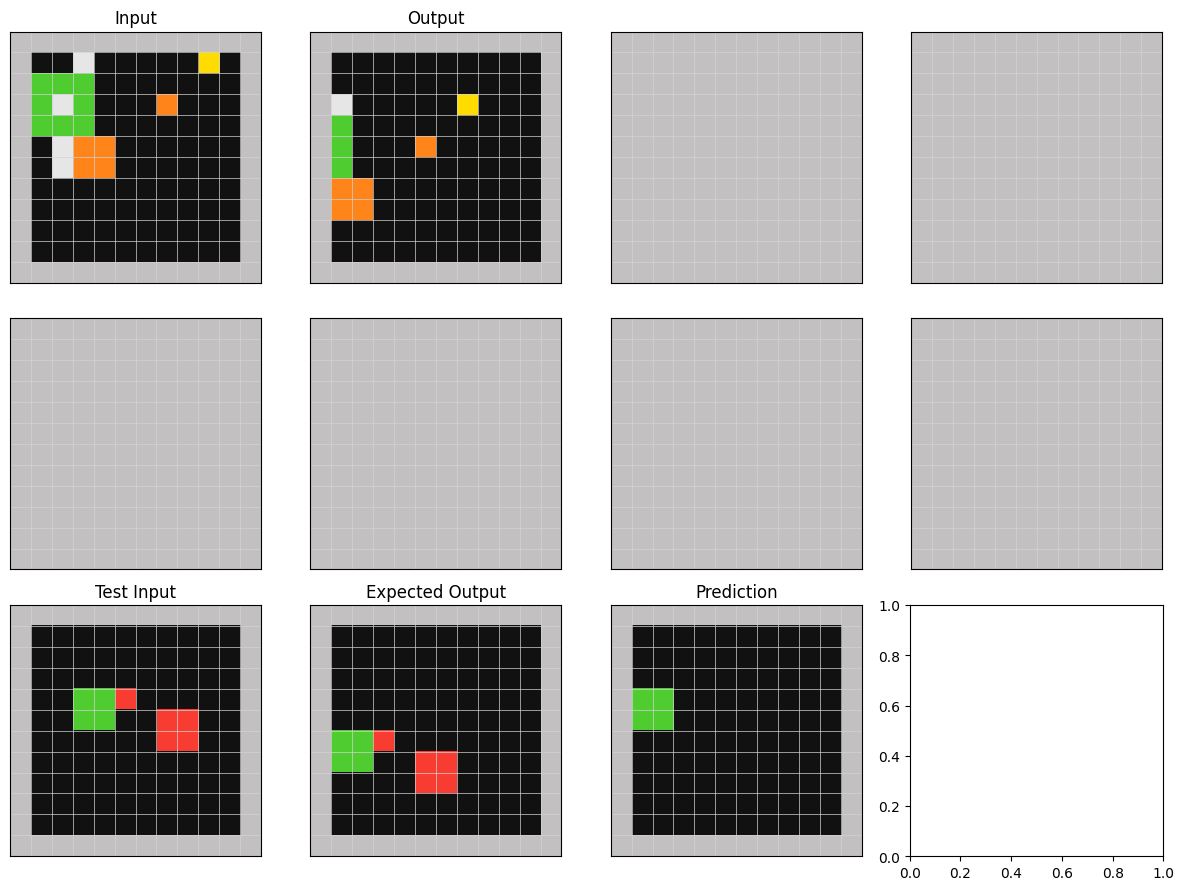

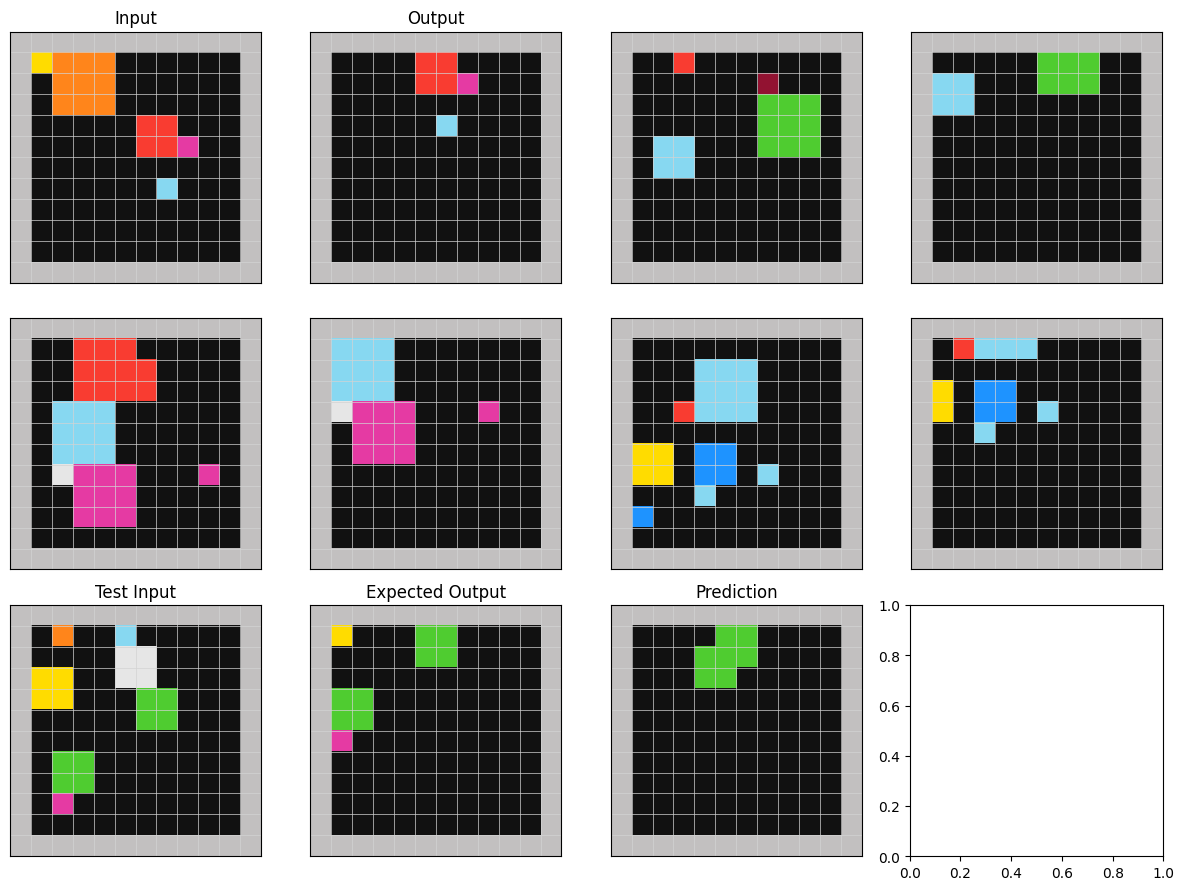

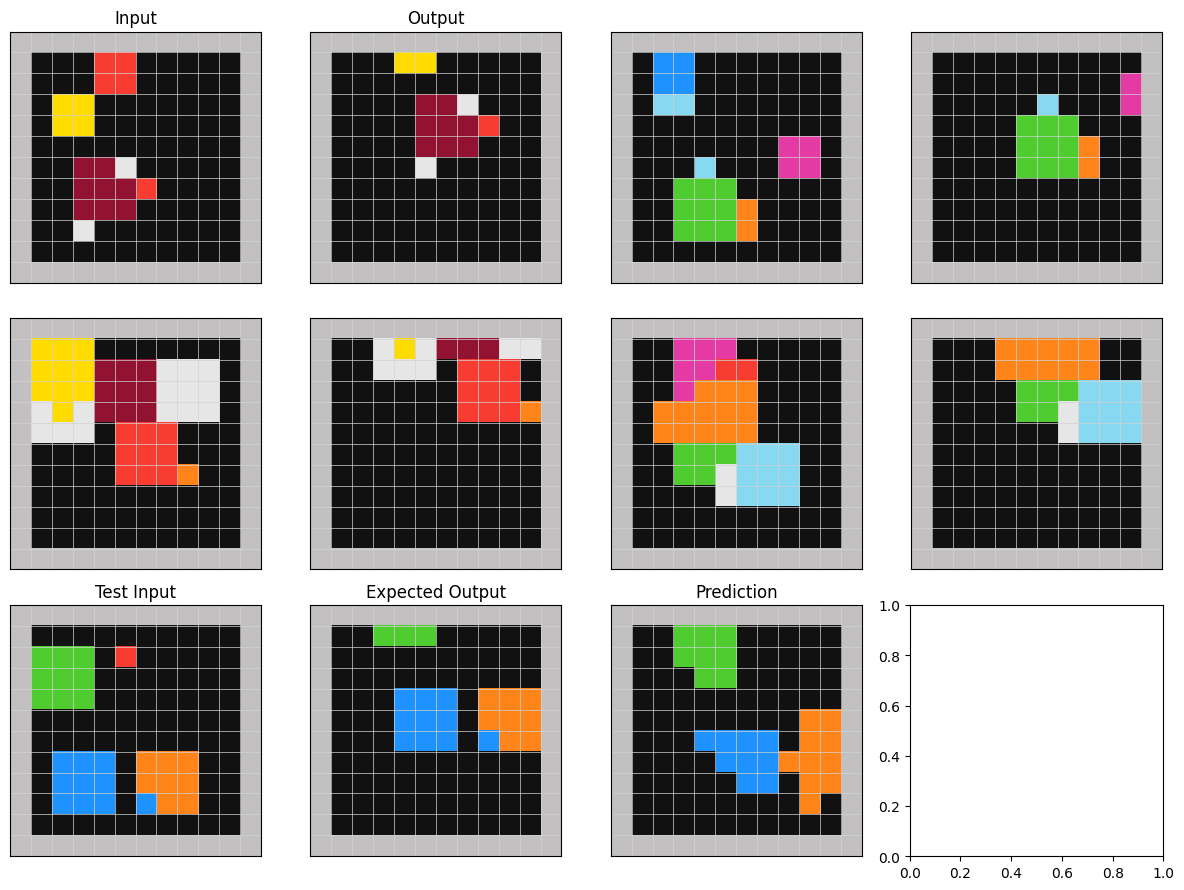

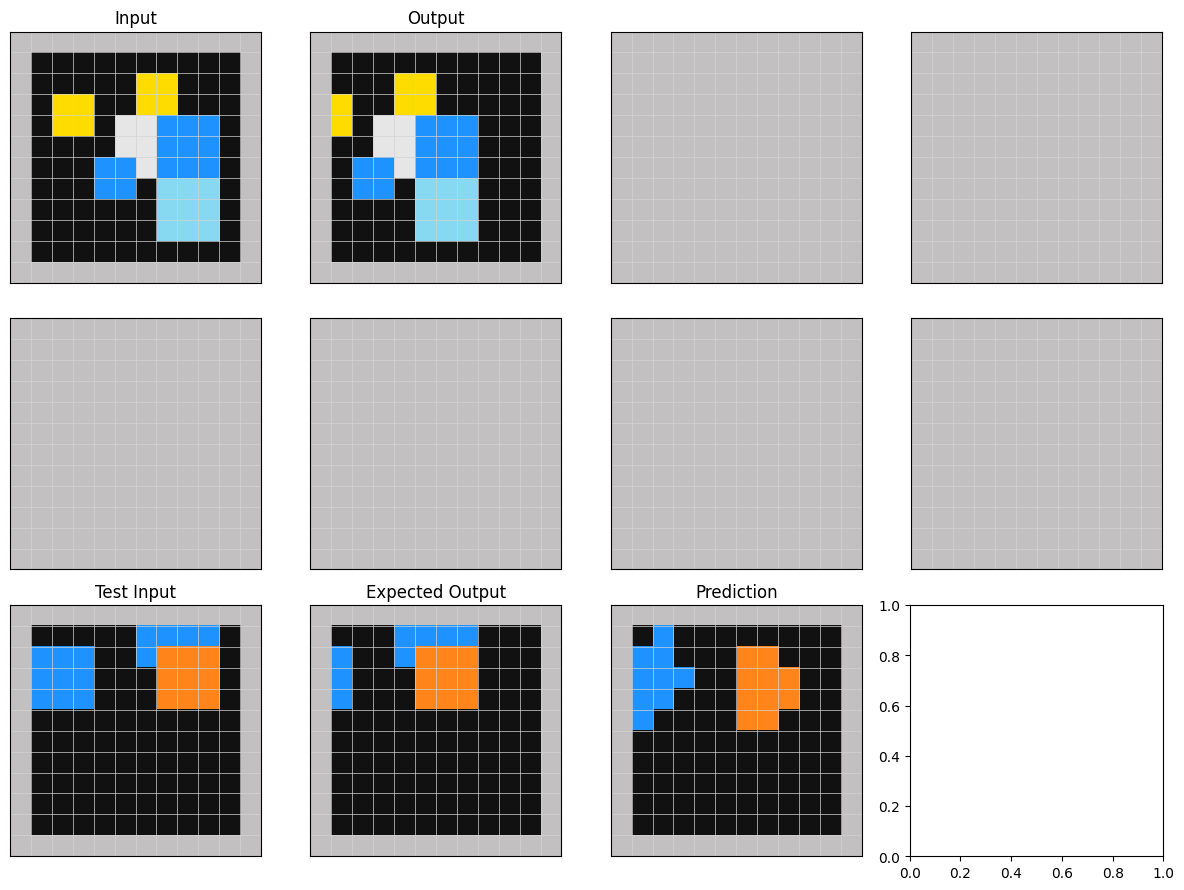

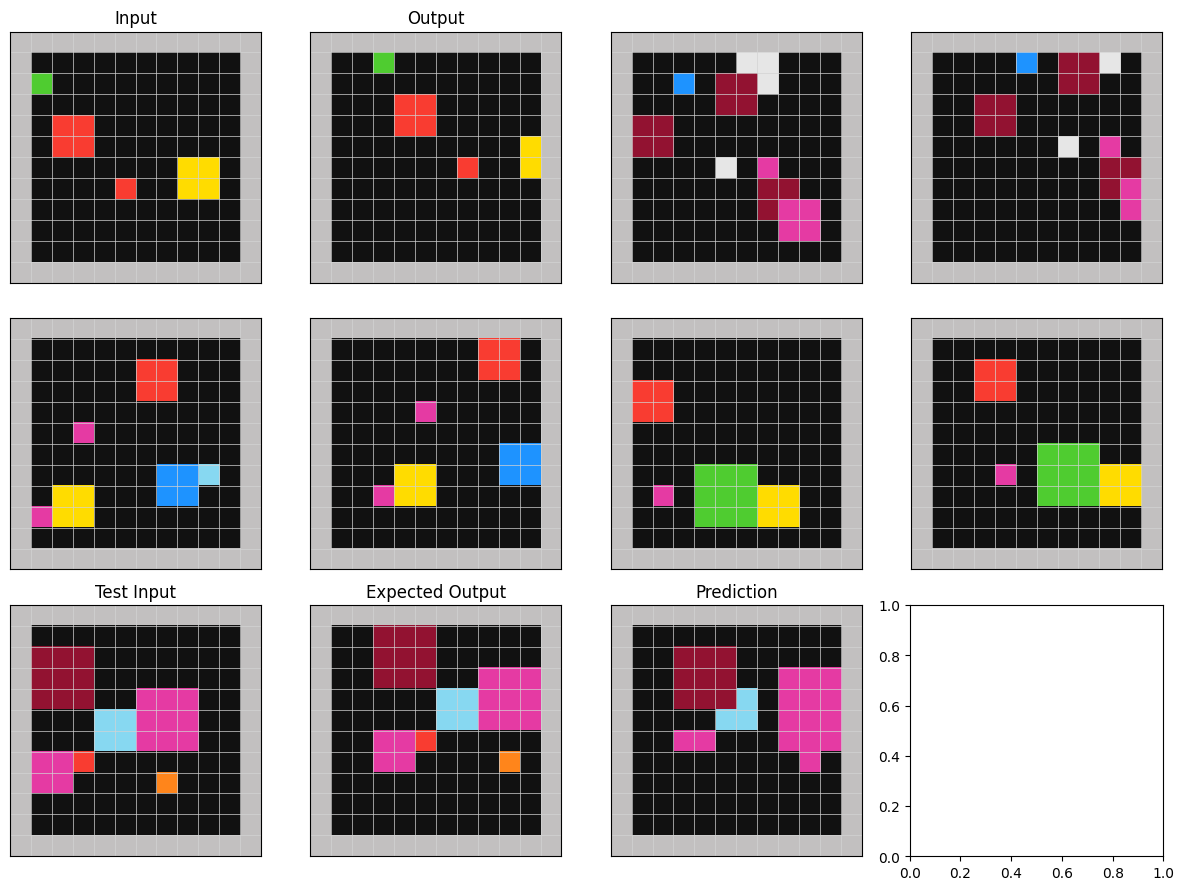

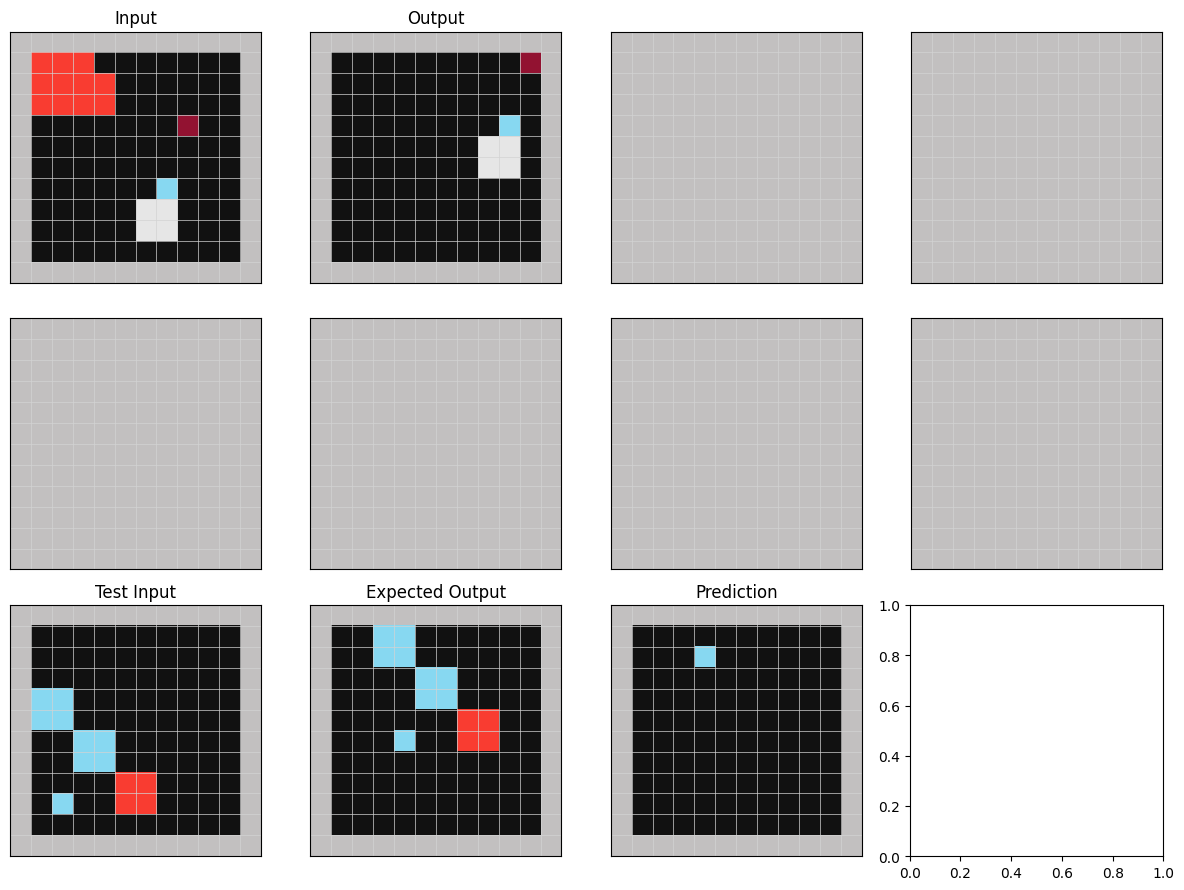

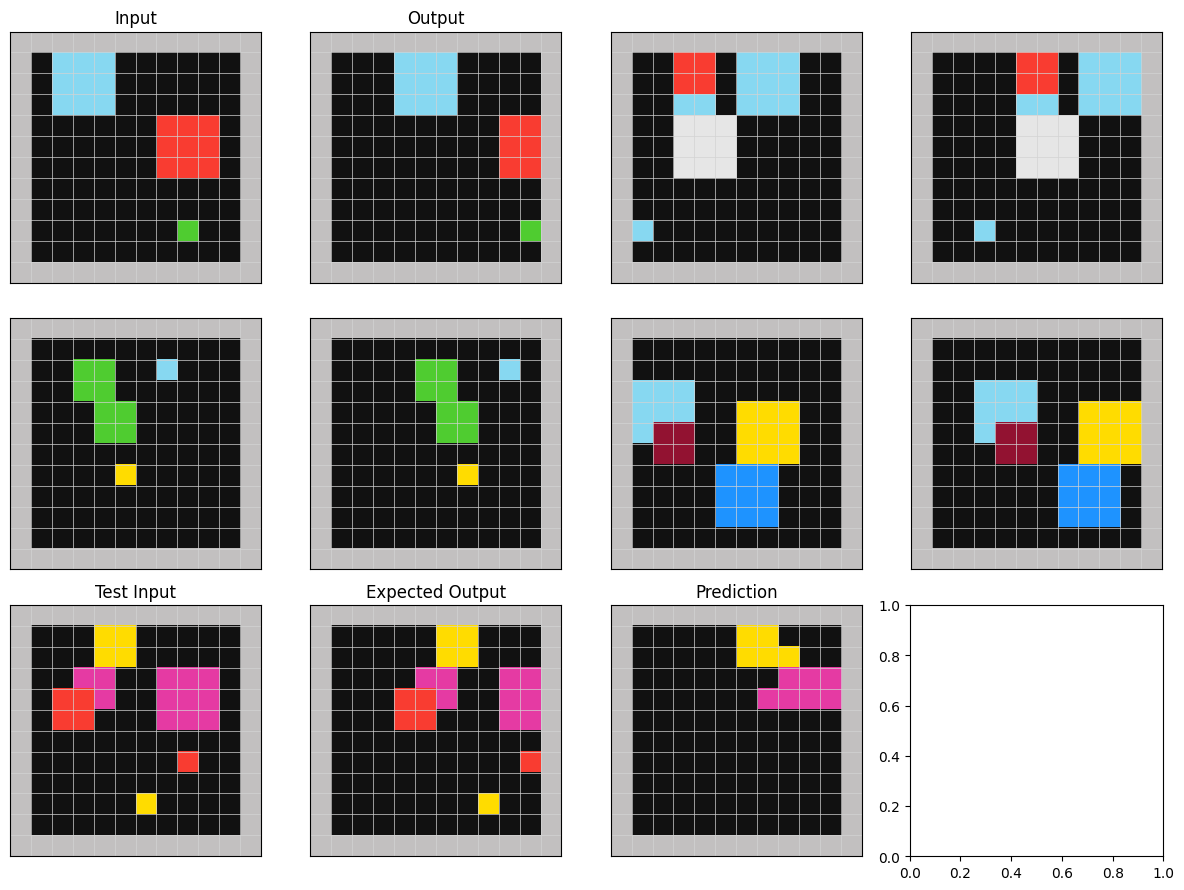

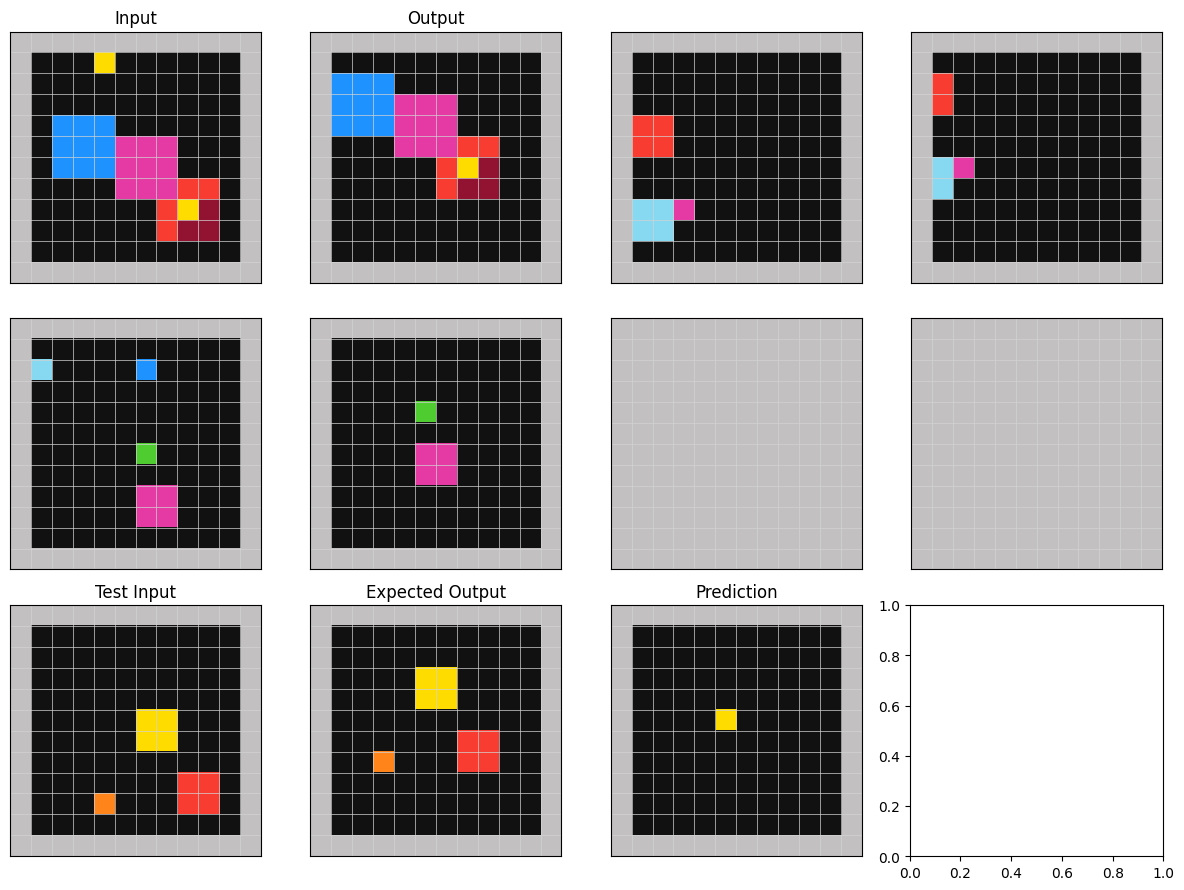

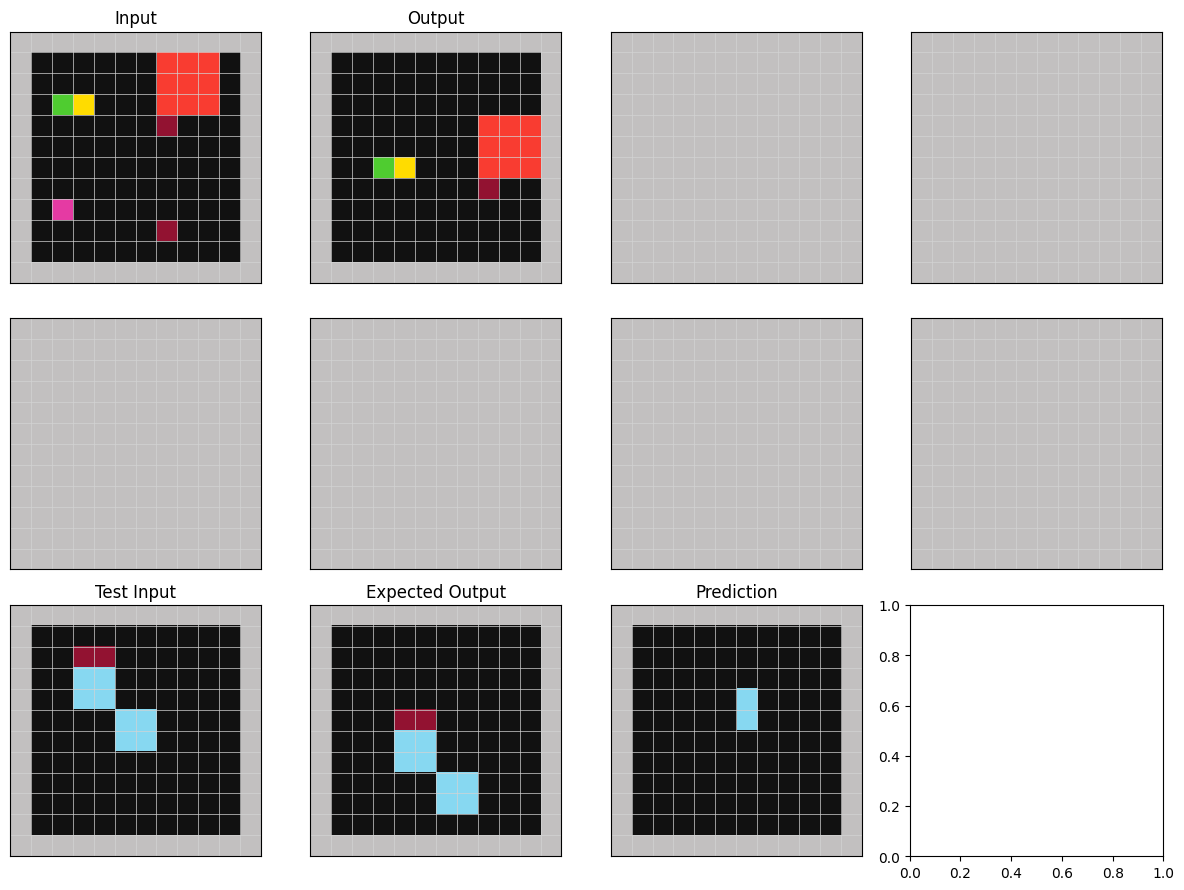

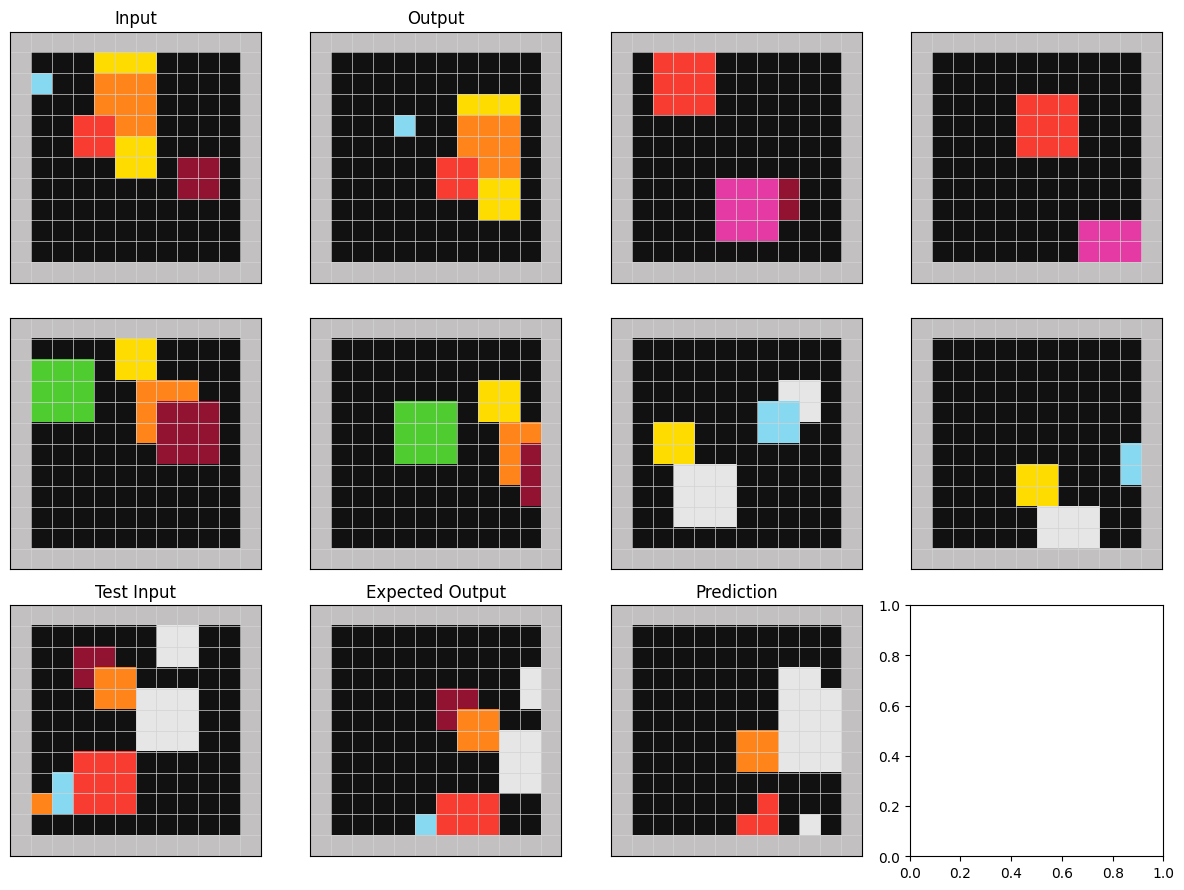

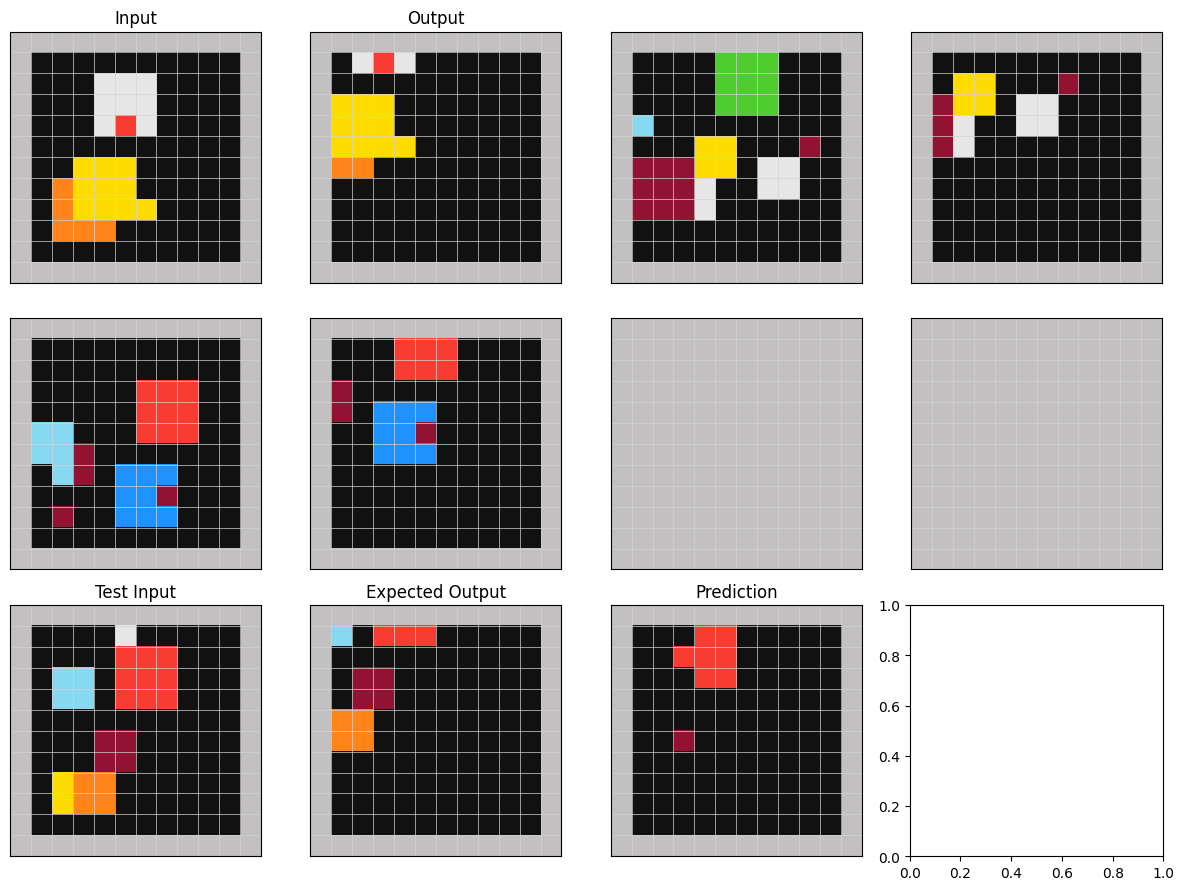

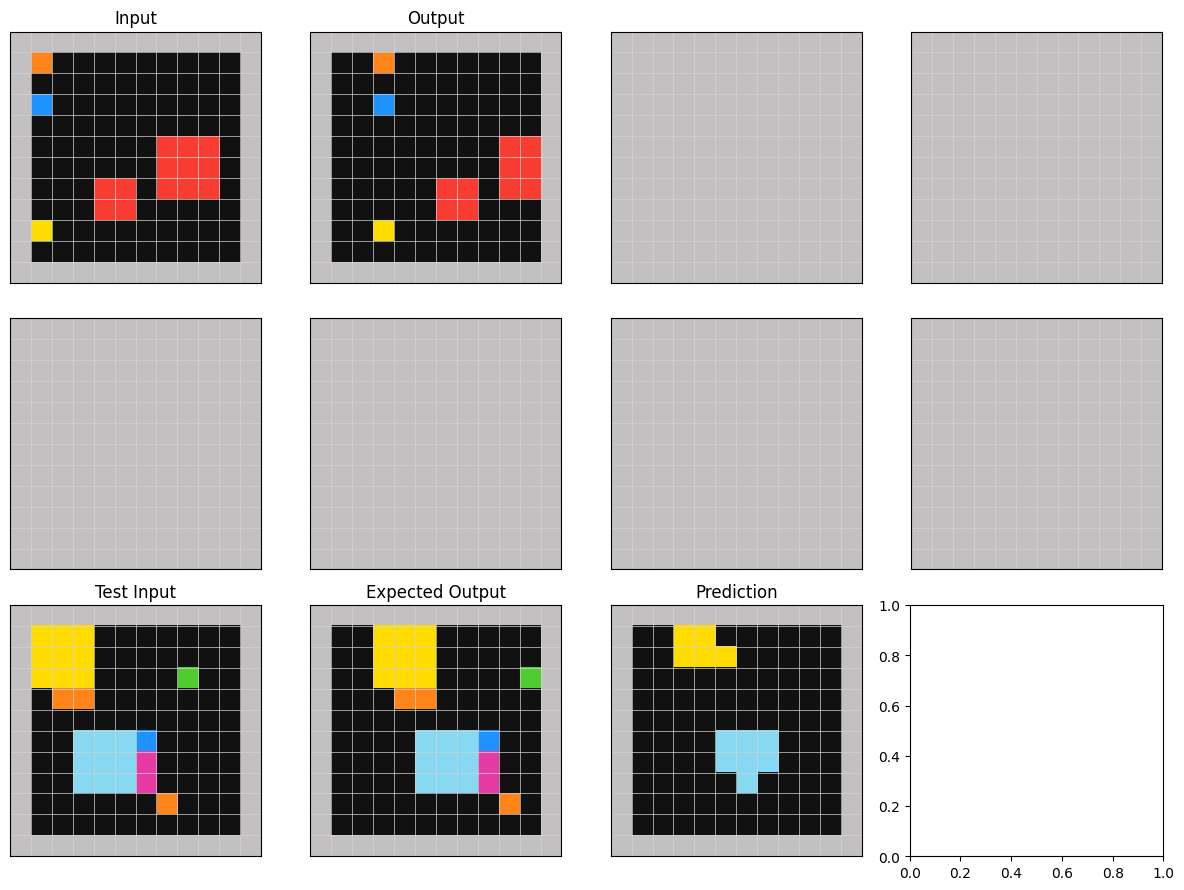

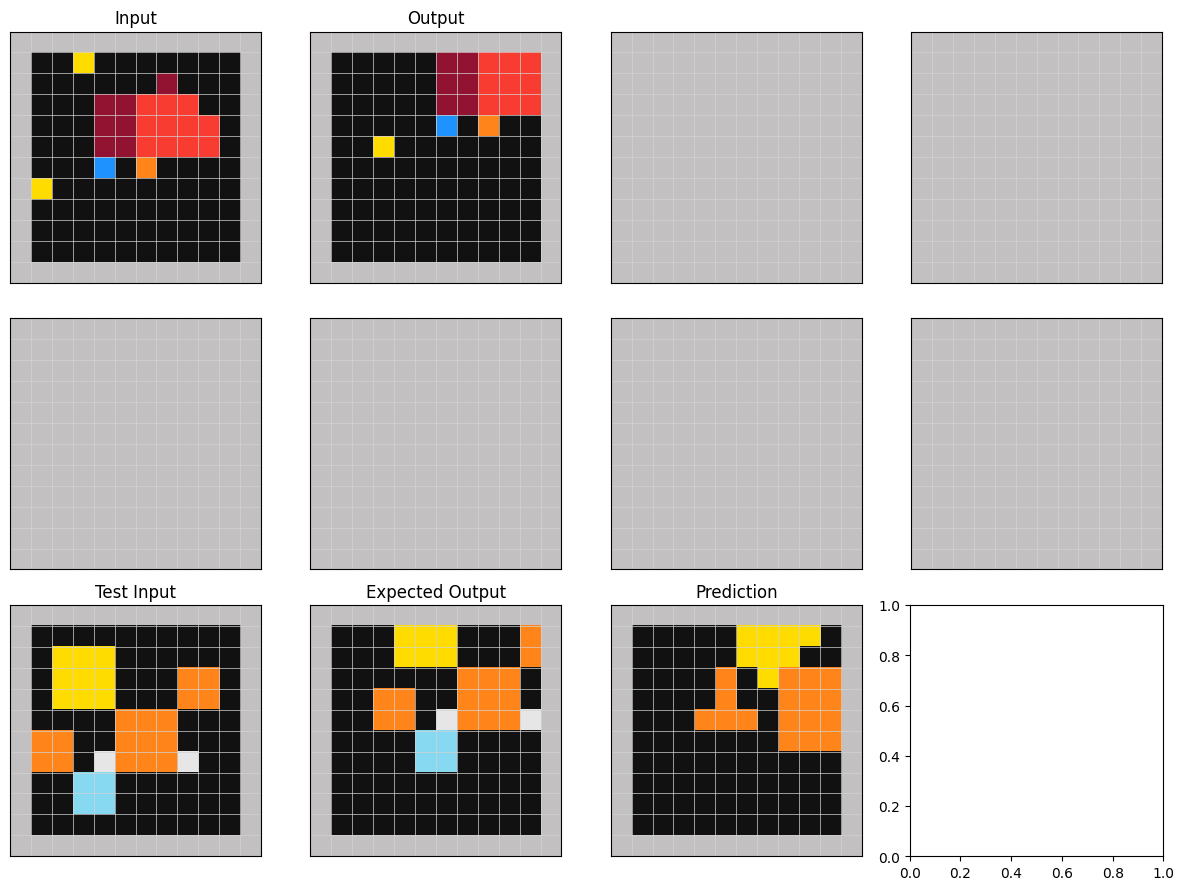

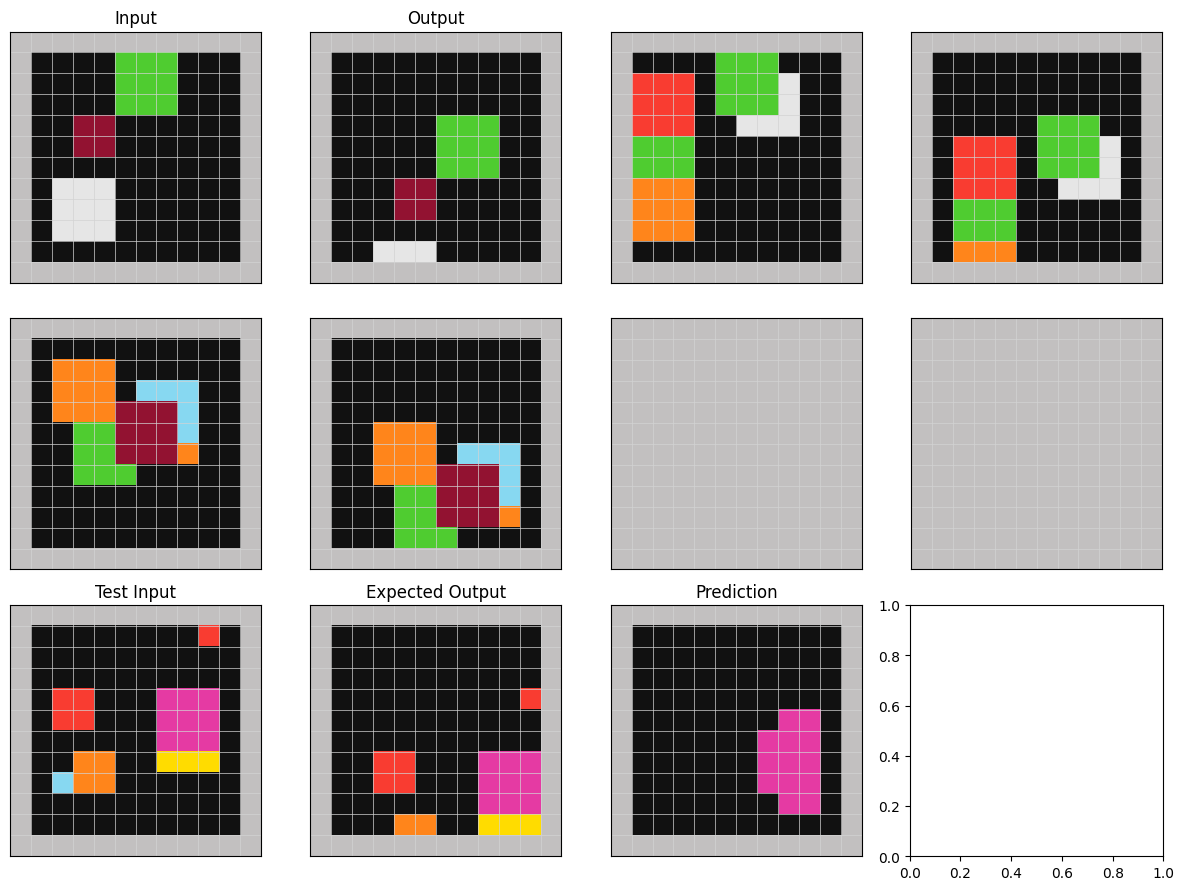

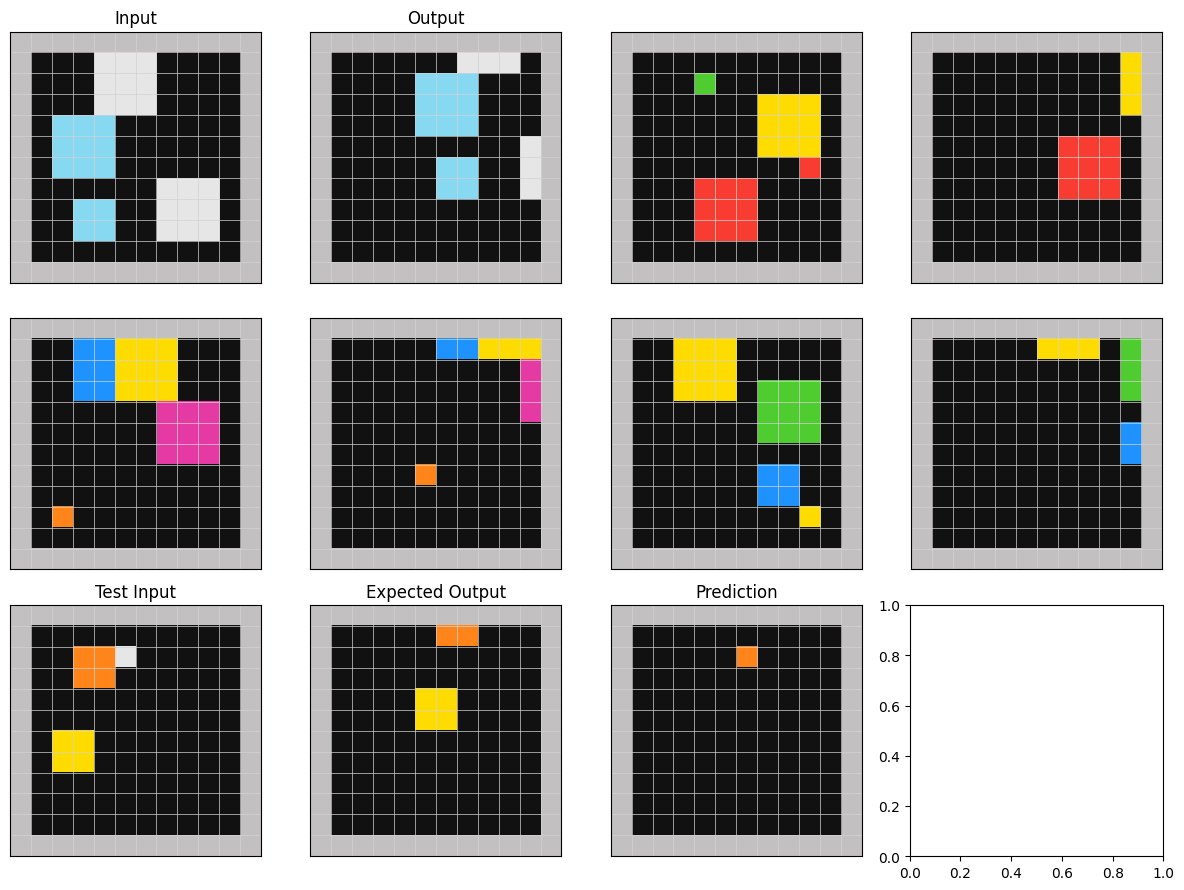

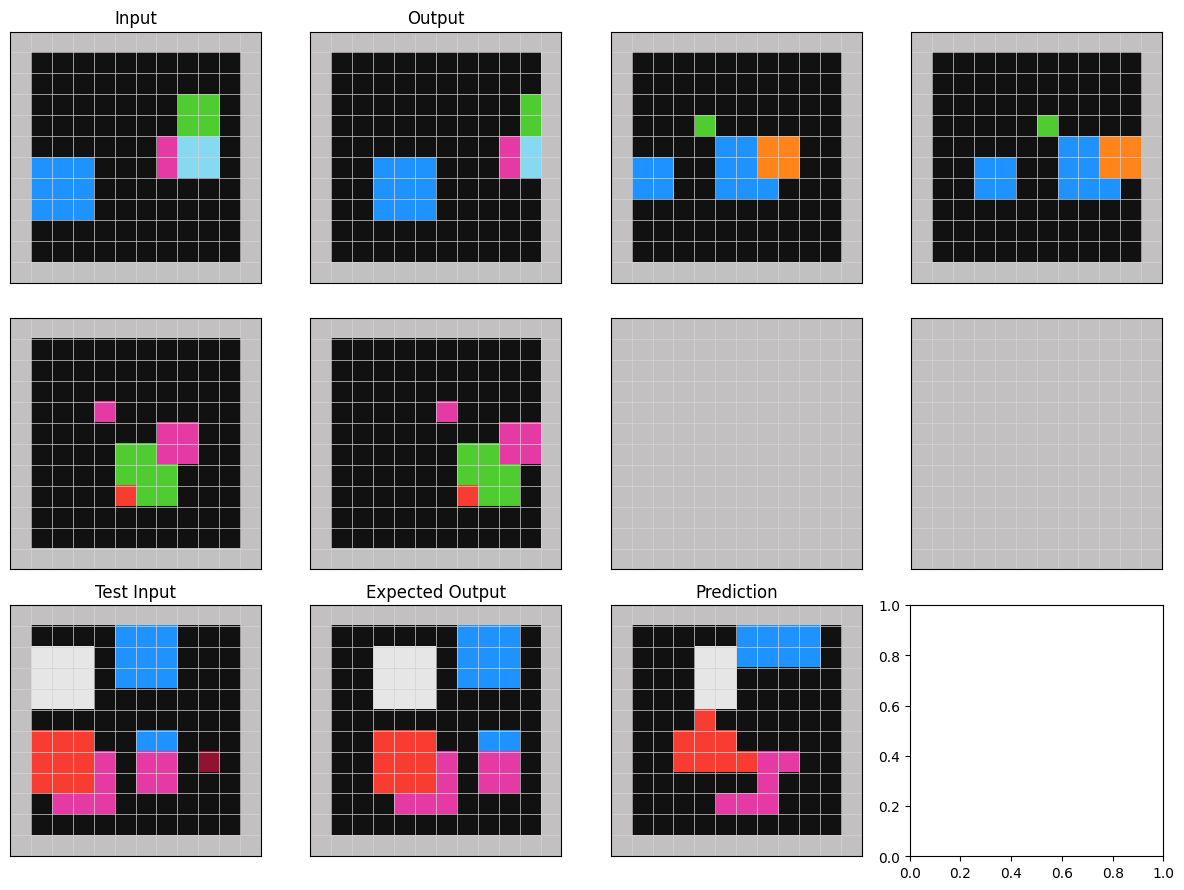

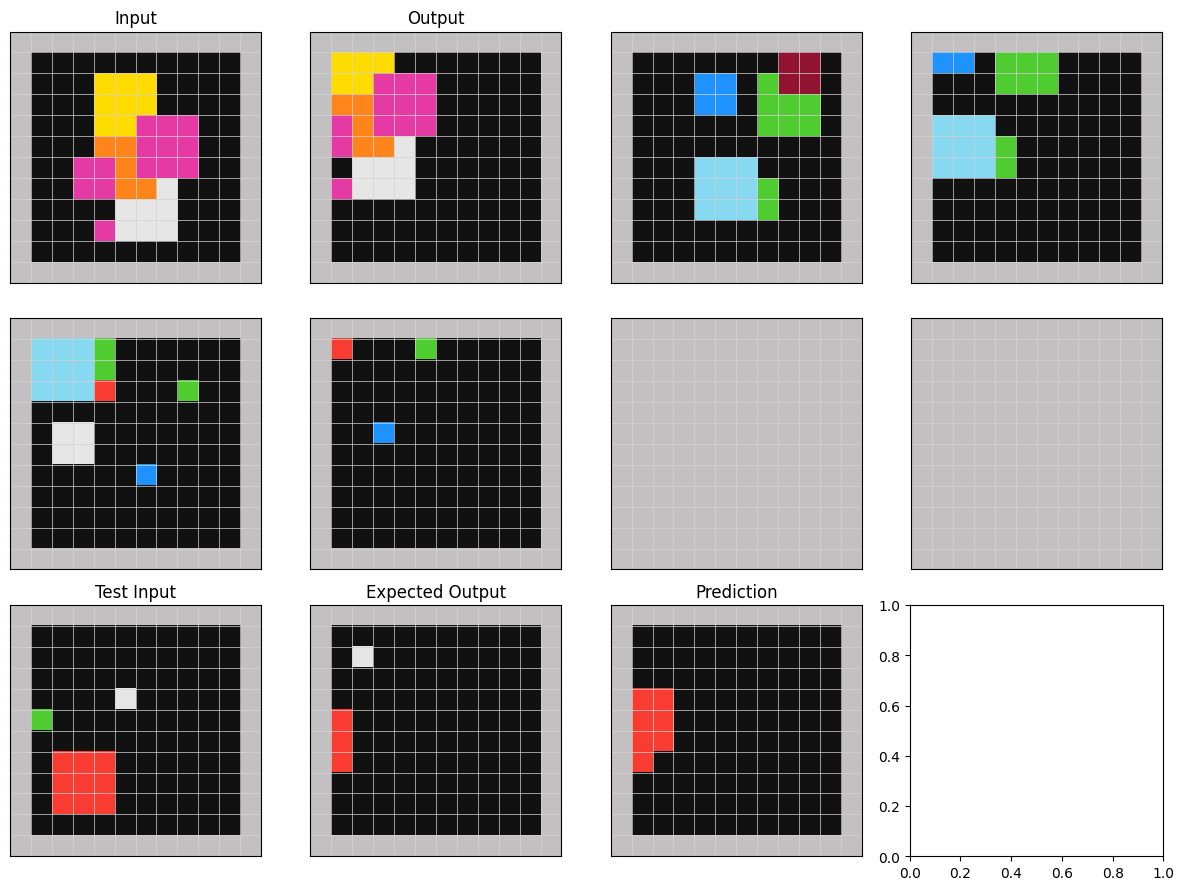

In [6]:

import matplotlib.pyplot as plt
from arc_prize.vis import visualize_mean_mha_attention


def visualize_mean_attention(attention_weights: torch.Tensor, num_grids: int, grid_size: int):
    # Reshape the attention weights
    # From [4, 100, 900] to [4, 100, 9, 10, 10]
    num_heads = attention_weights.shape[0]
    reshaped_attention = attention_weights.view(
        num_heads, num_grids, grid_size, grid_size
    )

    # Calculate mean attention across the target sequence (dim=1)
    # mean_attention = reshaped_attention.mean(dim=1)  # Shape: [4, 9, 10, 10]
    mean_attention = reshaped_attention

    # Create a figure with subplots for each head
    fig, axes = plt.subplots(num_heads, num_grids, figsize=(20, 10))

    for head in range(num_heads):
        # Create a 3x3 grid of heatmaps
        for i in range(num_grids):
            grid_attention = mean_attention[head, i]

            # Add subplot within the head's subplot
            # sub_ax = ax.inset_axes([1/9])
            ax = axes[head, i]
            im = ax.imshow(grid_attention, cmap="viridis", interpolation="nearest")
            # ax.axis("off")

            if i == 0:
                ax.set_ylabel(f"Head {head + 1}", rotation=0, ha="right", va="center")

            # Add colorbar for each grid
            # plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        # Remove ticks from the main subplot
        ax.set_xticks([])
        ax.set_yticks([])

    
    plt.tight_layout()
    plt.show()

for item in output:
  visualize_tensors(torch.Tensor(item["grids"]).squeeze(0), torch.Tensor(item["output_grid"]).squeeze(0), torch.Tensor(item["predictions"]).squeeze(0))
# print(torch.Tensor(item["decoder_sa_attn_weights"]).shape)
  # for i, layer in enumerate(torch.Tensor(item["decoder_mha_attn_weights"]).squeeze(0)):
  #   print(layer.shape)
  #   visualize_mean_attention(layer, 9, 30)
    

  # visualize_all_heads(layer, title=f"Layer {i}")
# for i, layer in enumerate(torch.Tensor(item["decoder_sa_attn_weights"]).squeeze(0)):
#     visualize_mean_sa_attention(layer)
    


In [ ]:
from arc_prize.vis import visualize_output_query, visualize_tensors


# model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_layers=num_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)

model_file_name = "models/model_75i3sirg.pth"
if model_file_name is not None:
    state_dict = torch.load(model_file_name, map_location=device)
    model.load_state_dict(state_dict)

model.eval()
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)
# batch = next(iter(eval_loader))

# visualize_output_query(model.output_query)


for i, batch in enumerate(eval_loader):
    grids, grid_masks, output_grid = [item.to(device) for item in batch]

    predictions = model.generate(grids, grid_masks)
    print(predictions.shape)

    visualize_tensors(grids.squeeze(0), output_grid.squeeze(0), predictions.squeeze(0))

